# Reviews pasajeros

In [ ]:
!pip install fuzzywuzzy

In [ ]:
import pandas as pd
import numpy as np
import datetime
import re

### Importacion el archivo

In [ ]:
df_airports = pd.read_csv('/content/airports2.csv', keep_default_na=False)

In [ ]:
df = pd.read_excel('/content/airline_reviews_skytrax.xlsx')

In [ ]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Entre cada fila con valores, se encuentra una fila sin ningún valor.

In [ ]:
df = df.dropna(how='all')

Duplicados

In [ ]:
print(f"Hay {df.duplicated().sum()} duplicados")

Hay 4765 duplicados


In [ ]:
aerolineas= df['airline'].unique()
print(f"Hay {len(aerolineas)} aerolíneas diferentes: \n {aerolineas}.")

Hay 81 aerolíneas diferentes: 
 ['Turkish Airlines' 'Qatar Airways' 'Emirates' 'Lufthansa'
 'KLM Royal Dutch Airlines' 'Virgin America' 'American Airlines'
 'Delta Air Lines' 'Southwest Airlines' 'United Airlines'
 'Jetblue Airways' 'Aegean Airlines' 'Aeroflot Russian Airlines'
 'Aeromexico' 'Air Canada' 'Air New Zealand' 'Alitalia' 'AirAsia'
 'Asiana Airlines' 'Avianca' 'Austrian Airlines' 'British Airways'
 'Brussels Airlines' 'China Eastern Airlines' 'China Southern Airlines'
 'Copa Airlines' 'Ethiopian Airlines' 'Egyptair' 'Finnair' 'Iberia'
 'ANA All Nippon Airways' 'easyJet' 'Korean Air' 'LATAM Airlines'
 'LOT Polish Airlines' 'Qantas Airways' 'Air France' 'Etihad Airways'
 'Pegasus Airlines' 'Royal Jordanian Airlines' 'Ryanair'
 'South African Airways' 'Saudi Arabian Airlines' 'TAP Portugal'
 'Eurowings' 'EVA Air' 'Royal Air Maroc' 'Singapore Airlines'
 'SAS Scandinavian' 'Swiss Intl Air Lines' 'Thai Airways' 'Air India'
 'Air Europa' 'Air Canada rouge' 'airBaltic' 'Air China'
 

El trabajo estará enfocado en United Airlines y su competencia en Estados Unidos. Por lo tanto, se filtrarán las aerolíneas adecuadas.

Las aerolineas son las siguientes: 'United Airlines', 'American Airlines', 'Southwest Airlines', 'Delta Air Lines', 'Jetblue Airways', 'Virgin America', 'Alaska Airlines', 'Spirit Airlines', 'Frontier Airlines'

## Selección de aerolineas

In [ ]:
nacional = ['United Airlines','American Airlines', 'Southwest Airlines', 'Delta Air Lines', 'Jetblue Airways', 'Virgin America', 'Alaska Airlines','Spirit Airlines','Frontier Airlines']
df = df[df['airline'].isin(nacional)]

In [ ]:
print(f"Hay {df.duplicated().sum()} duplicados")

Hay 163 duplicados


In [ ]:
df = df.drop_duplicates()

In [ ]:
print(f"El DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El DataFrame tiene 14091 filas y 17 columnas.


In [ ]:
print(f"Fecha inicial: {df['review_date'].min()}")
print(f"Fecha final: {df['review_date'].max()}")

Fecha inicial: 10th April 2012
Fecha final: 9th September 2018


In [ ]:
'''for column in df.columns:
  unique_values = df[column].unique()
  print(f"Valores únicos para la columna '{column}':")
  print(unique_values)
  print("-" * 70)'''

'for column in df.columns:\n  unique_values = df[column].unique()\n  print(f"Valores únicos para la columna \'{column}\':")\n  print(unique_values)\n  print("-" * 70)'

Se puede observar que la columna customer_review no presenta información útil para el análisis. Esto se debe a que las reseñas son demasiado cortas y carecen de contenido significativo.



In [ ]:
df[df['customer_review'].str.len() <= 100][["customer_review"]]

,customer_review
14935,Not Verified | Raleigh/Durham to London. One o...
15013,Not Verified | American Airlines states theyâ€...
15359,Not Verified | Philadelphia to San Juan. Ameri...
16287,âœ… Trip Verified | Corpus Christie to Harrisb...
16423,â
...,...
125814,â
125816,â
125826,â
125834,â


In [ ]:
df.drop(df[df['customer_review'].str.len() <= 100].index, inplace=True)

<ipython-input-16-9229fa979224>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['customer_review'].str.len() <= 100].index, inplace=True)


In [ ]:
df['customer_review'] = df['customer_review'].str.replace('  ', '', regex=False)

<ipython-input-17-ddbfe6e2b668>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_review'] = df['customer_review'].str.replace('  ', '', regex=False)


## Tratamiento de nulos

In [ ]:
nulos = pd.DataFrame({
    'Valores Nulos': df.isnull().sum(),
    'Porcentaje de Nulos': ((df.isnull().mean() * 100).round(2)).astype(str) + '%'})
print(f"{nulos}")

                 Valores Nulos Porcentaje de Nulos
airline                      0                0.0%
overall                    402               2.89%
author                       0                0.0%
review_date                  0                0.0%
customer_review              0                0.0%
aircraft                 11582               83.3%
traveller_type            3939              28.33%
cabin                     1193               8.58%
route                     3958              28.47%
date_flown                3995              28.73%
seat_comfort               946                6.8%
cabin_service              909               6.54%
food_bev                  4186              30.11%
entertainment             5783              41.59%
ground_service            4054              29.16%
value_for_money            360               2.59%
recommended                304               2.19%


In [ ]:
#df.groupby(['airline', 'cabin']).size().reset_index(name='count')

Al contar con un 83,52% de valores nulos en la columna aircraft, se procederá a eliminar dicha columna.

In [ ]:
df.drop('aircraft', axis=1, inplace=True)

Se observa que hay numerosas filas con varios datos faltantes en distintas columnas, lo que indica que en una misma fila hay múltiples valores ausentes.

In [ ]:
faltantes = df[df[['route', 'date_flown', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service']].isnull().all(axis=1)]
faltantes

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
14245,Virgin America,8.0,H Vordan,18th April 2018,âœ… Trip Verified | San Francisco to Indianopo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14299,Virgin America,6.0,M Gould,22nd August 2017,âœ… Verified Review | Austin to San Francisco....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14327,Virgin America,5.0,Mary Roper,9th January 2017,âœ… Verified Review | First time flight on Vir...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14409,Virgin America,9.0,Austin Jones,20th September 2015,I flew Virgin America 3 times within three wee...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14435,Virgin America,NaN,Kathleen Daley,24th February 2015,I was sending 3 people out to Los Angeles for ...,Business,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126474,Alaska Airlines,4.0,E Mabley,17th November 2010,LAX-BLI one way combination of Alaska and Hori...,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no
126476,Alaska Airlines,9.0,R Tinker,27th October 2010,DFW-SEA-YVR. DFW-SEA sector in first class. Cr...,NaN,First Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,yes
126478,Alaska Airlines,5.0,M Auerbach,17th September 2010,Vancouver to Portland on Horizon (Alaska Air's...,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,yes
126480,Alaska Airlines,6.0,Roy Brown,15th August 2010,Due to booking a flight with Delta which sold ...,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no


Se ha detectado que numerosas filas presentan la ausencia simultánea de datos en varias columnas. Esta situación indica una falta de información significativa que puede afectar el análisis del dataset y requiere un enfoque cuidadoso para su tratamiento.


Por esta razón, se procederá a eliminar las filas que contienen más de seis columnas con datos nulos. Esta acción busca mejorar la calidad del dataset y asegurar que el análisis posterior se realice con información más completa y relevante.

In [ ]:
df = df.drop(faltantes.index)

In [ ]:
nulos = pd.DataFrame({
    'Valores Nulos': df.isnull().sum(),
    'Porcentaje de Nulos': ((df.isnull().mean() * 100).round(2)).astype(str) + '%'})
print(f"{nulos}")

                 Valores Nulos Porcentaje de Nulos
airline                      0                0.0%
overall                    370               2.77%
author                       0                0.0%
review_date                  0                0.0%
customer_review              0                0.0%
traveller_type            3398              25.43%
cabin                      843               6.31%
route                     3416              25.57%
date_flown                3453              25.84%
seat_comfort               404               3.02%
cabin_service              367               2.75%
food_bev                  3644              27.27%
entertainment             5241              39.22%
ground_service            3512              26.28%
value_for_money             30               0.22%
recommended                  0                0.0%


### Nulos en route

In [ ]:
df = df[df['airline'].isin(nacional)]

Se extraerá la ruta de la columna customer_review, limpiando previamente el inicio de algunas filas para asegurar la precisión del análisis.

In [ ]:
# borrar "âœ… Trip Verified |",  "Verified Review ", "Not Verified" de ruta
df['customer_review'] = df['customer_review'].str.replace('âœ… Trip Verified |', '', regex=False)
df['customer_review'] = df['customer_review'].str.replace('Verified Review ', '', regex=False)
df['customer_review'] = df['customer_review'].str.replace('Not Verified |', '', regex=False)
df['customer_review'] = df['customer_review'].str.replace('âœ… |', '', regex=False)

In [ ]:
df['customer_review'] = df['customer_review'].str.replace('Puerto Rico', 'SJU', regex=False)
df['customer_review'] = df['customer_review'].str.replace('San Juan', 'SJU', regex=False)

In [ ]:
df['customer_review'] = df['customer_review'].str.replace('Ft.', 'Ft', regex=False)
df['customer_review'] = df['customer_review'].str.replace('St.', 'St', regex=False)

In [ ]:
def extract_route(text):
    pattern = r'([A-Z]{3}|[A-Z][a-z]+(?:\s[A-Z][a-z]+)*)\s*(to|-)\s*([A-Z]{3}|[A-Z][a-z]+(?:\s[A-Z][a-z]+)*)'

    match = re.search(pattern, text)

    if match:
        # Devolver la ruta completa, con el formato correcto
        return f"{match.group(1)} {match.group(2)} {match.group(3)}"

    return None

df['viaje'] = df['customer_review'].apply(extract_route)

In [ ]:
df[df['route'].isnull()][['customer_review',"route", "viaje"]]

,customer_review,route,viaje
14419,I had a wonderful experience flying with Virgi...,NaN,None
14421,Flew on 9 May BOS-LAX on VX 365 and return 21 ...,NaN,BOS - LAX
14423,My first time with Virgin Air SeaTac to LAX. C...,NaN,Tac to LAX
14425,VX 927 LAX-SFO. Uneventful on-time flight good...,NaN,LAX - SFO
14427,Flew FLL to LAX earlier this month. We were fl...,NaN,FLL to LAX
...,...,...,...
126366,We flew to Mexico in coach. Both ways they ran...,NaN,None
126368,First Class is an expensive joke. An ageing fl...,NaN,None
126370,YEG-SEA-LAX both flights were considerably dis...,NaN,YEG - SEA
126372,I filled out everything from seat number to me...,NaN,None


In [ ]:

import re

# Función para extraer rutas en formato "at X from Y" o "to Z from W"
def extract_route_alt(text):
    # Patrón para buscar "at [aeropuerto] from [aeropuerto]" o "to [destino] from [origen]"
    pattern = r'(?:at|to)\s+([A-Z]{3})\s+from\s+([A-Z]{3})'
    matches = re.findall(pattern, text)

    # Si se encuentran coincidencias, formatear y devolver
    if matches:
        routes = []
        for match in matches:
            route = f"{match[0]} from {match[1]}"
            routes.append(route)
        return ', '.join(routes)

    return None


df['viaje2'] = df['customer_review'].apply(extract_route_alt)

In [ ]:
df['viaje2'] = df['viaje2'].str.replace(r'(\w+) from (\w+)', r'\2 - \1', regex=True)

In [ ]:
df.loc[df['viaje2'].str.contains(r'PVR from EWR, EWR from PVR', na=False), 'viaje2'] = 'PVR from EWR'

In [ ]:
# Asignar valores a la columna 'viaje' basados en las condiciones
df.loc[df['customer_review'].str.contains('LA') & df['customer_review'].str.contains('Seattle'), 'viaje'] = 'LAX - SEA'
df.loc[df['customer_review'].str.contains('SFO') & df['customer_review'].str.contains('LAX'), 'viaje'] = 'SFO - LAX'
df.loc[df['customer_review'].str.contains('DC') & df['customer_review'].str.contains('Dallas'), 'viaje'] = 'IAD - DAL'
df.loc[df['customer_review'].str.contains('SEA') & df['customer_review'].str.contains('SMF'), 'viaje'] = 'SEA - SMF'
df.loc[df['customer_review'].str.contains('Newark NJ') & df['customer_review'].str.contains('Lauderdale FL'), 'viaje'] = 'EWR - FLL'
df.loc[df['customer_review'].str.contains('Detroit') & df['customer_review'].str.contains('Tampa'), 'viaje'] = 'DTW - TPA'
df.loc[df['customer_review'].str.contains('San Francisco') & df['customer_review'].str.contains('Newark'), 'viaje'] = 'SFO - EWR'

In [ ]:
df[df['route'].isnull()][['customer_review',"route", "viaje","viaje2"]]

,customer_review,route,viaje,viaje2
14419,I had a wonderful experience flying with Virgi...,NaN,None,None
14421,Flew on 9 May BOS-LAX on VX 365 and return 21 ...,NaN,BOS - LAX,None
14423,My first time with Virgin Air SeaTac to LAX. C...,NaN,Tac to LAX,None
14425,VX 927 LAX-SFO. Uneventful on-time flight good...,NaN,SFO - LAX,None
14427,Flew FLL to LAX earlier this month. We were fl...,NaN,FLL to LAX,None
...,...,...,...,...
126366,We flew to Mexico in coach. Both ways they ran...,NaN,None,None
126368,First Class is an expensive joke. An ageing fl...,NaN,None,None
126370,YEG-SEA-LAX both flights were considerably dis...,NaN,YEG - SEA,None
126372,I filled out everything from seat number to me...,NaN,None,None


In [ ]:
# Asignar valores a la columna 'viaje' basados en las condiciones
df.loc[df['viaje'].str.contains('Tac to LAX', na=False), 'viaje'] = 'SEA - LAX'

In [ ]:
df['viaje'] = df['viaje'].fillna(df['viaje2'])
df[["route", "viaje"]]

,route,viaje
14243,San Francisco to Indianapolis,San Francisco to Indianapolis
14247,Austin to Kahului via San Francisco,Austin to Kahului
14249,San Francisco to Nashville,San Francisco to Nashville
14251,Newark to San Francisco,SFO - EWR
14253,Chicago to Portland,Chicago to Portland
...,...,...
126366,NaN,None
126368,NaN,None
126370,NaN,YEG - SEA
126372,NaN,None


In [ ]:
# Filtro las columnas con la palabra "Flew"
df_filtered = df[df['viaje'].str.contains('Flew', na=False)][["customer_review","route", "viaje","viaje2"]]
df_filtered

,customer_review,route,viaje,viaje2
14271,Flew Los Angeles to Fort Lauderdale with Virg...,Los Angeles to Fort Lauderdale,Flew Los Angeles to Fort Lauderdale,None
14287,Flew Las Vegas to Austin via San Francisco in...,Las Vegas to Austin via San Francisco,Flew Las Vegas to Austin,None
15241,Flew Savannah to Minneapolis via Charlotte. O...,Savannah to Minneapolis via Charlotte,Flew Savannah to Minneapolis,None
15397,This is the first and last time Iâ€™d conside...,San Diego to New York JFK,Flew San Diego to New York,None
15703,Flew Fort Lauderdale to Charlotte via Tenness...,Fort Lauderdale to Charlotte via Tennessee,Flew Fort Lauderdale to Charlotte,None
...,...,...,...,...
125696,Flew Phoenix to San Francisco with Alaska Air...,Phoenix to San Francisco,Flew Phoenix to San Francisco,None
125752,Flew Seattle to Sacramento. First they bumped...,Seattle to Sacramento,Flew Seattle to Sacramento,None
125918,Flew San Jose to Kahului. Great flight. Everyo...,SJC to OGG,Flew San Jose to Kahului,None
125922,Flew Anchorage to Las Vegas. This was an over...,ANC to LAS,Flew Anchorage to Las Vegas,None


In [ ]:
df['viaje'] = df['viaje'].fillna(df['viaje2'])

In [ ]:
df['route'] = df['route'].fillna(df['viaje'])

In [ ]:
df[df['route'].isnull()][["customer_review"]]

,customer_review
14419,I had a wonderful experience flying with Virgi...
14439,Overall I like Virgin however the beverage and...
14467,Flight 805 and 136 on August 16 2014. My first...
14487,Flight from LAX flight number 781 6/21/14-6/25...
14513,Seat rows are jammed together cramped and seat...
...,...
126354,I am a 75K elite status on this Airline and fl...
126364,Terrible Airline cheap with bad service. My pl...
126366,We flew to Mexico in coach. Both ways they ran...
126368,First Class is an expensive joke. An ageing fl...


In [ ]:
df['route'].isnull().sum()

1177

Eliminamos la columans que ya no necesitamos.

In [ ]:
df.drop('viaje', axis=1, inplace=True)
df.drop('viaje2', axis=1, inplace=True)

Voy a eliminar los nulos de route.

In [ ]:
df = df.dropna(subset=['route'])

In [ ]:
df['route']

,route
14243,San Francisco to Indianapolis
14247,Austin to Kahului via San Francisco
14249,San Francisco to Nashville
14251,Newark to San Francisco
14253,Chicago to Portland
...,...
126358,ATL - SEA
126360,Bellingham to Honolulu
126362,Anchorage to Seattle
126370,YEG - SEA


In [ ]:
df['route'] = df['route'].str.replace(r'New York JFK|New York-Jfk|Jfk New York|NYC|New York City', 'JFK', regex=True)
df['route'] = df['route'].str.replace(r'Bradley|Bradley International', 'BDL', regex=True)
df['route'] = df['route'].str.replace(r'Love Field|Dallas Love Field', 'DAL', regex=True)
df['route'] = df['route'].str.replace(r'La Guardia|Guardia|LaGuardia|New York LaGuardia|Laguardia|New York LGA|New York LaGaurdia', 'LGA', regex=True)
df['route'] = df['route'].str.replace(r'Newark Airport|Newark NJ', 'EWR', regex=True)
df['route'] = df['route'].str.replace(r'Orange County CA|Orange County', 'QLA', regex=True)
df['route'] = df['route'].str.replace(r'Dallas[\s/-]?Ft[.\s-]?Worth|Dallas[\s/-]?Fort[\s/-]?Worth|Ft[\s/-]?Worth', 'DFW', regex=True)
df['route'] = df['route'].str.replace(r'ZÃ¼rich|Zurich', 'ZRH', regex=True)
df['route'] = df['route'].str.replace(r'London|London Heathrow|Heathrow', 'LHR', regex=True)

<ipython-input-45-de8c247f59f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['route'] = df['route'].str.replace(r'New York JFK|New York-Jfk|Jfk New York|NYC|New York City', 'JFK', regex=True)
<ipython-input-45-de8c247f59f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['route'] = df['route'].str.replace(r'Bradley|Bradley International', 'BDL', regex=True)
<ipython-input-45-de8c247f59f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [ ]:
df_prueba = df.copy()
df_prueba['route'] = df_prueba['route'].str.replace(' yo ', ' to ', regex=False)
df_prueba['route'] = df_prueba['route'].str.replace('LGAto', 'LGA to', regex=False)
df_prueba['route'] = df_prueba['route'].str.replace('SANto ', 'SAN to', regex=False)
df_prueba['route'] = df_prueba['route'].str.replace('toLHR ', 'to LHR', regex=False)
df_prueba['route'] = df_prueba['route'].str.replace('toLAX ', 'to LAX', regex=False)
df_prueba['route'] = df_prueba['route'].str.replace('Port-au-Prince', 'Port au Prince', regex=False)

In [ ]:
df_prueba[['route']]

,route
14243,San Francisco to Indianapolis
14247,Austin to Kahului via San Francisco
14249,San Francisco to Nashville
14251,Newark to San Francisco
14253,Chicago to Portland
...,...
126358,ATL - SEA
126360,Bellingham to Honolulu
126362,Anchorage to Seattle
126370,YEG - SEA


In [ ]:
meses = [
    'January', 'February', 'March', 'April', 'May',
    'June', 'July', 'August', 'September', 'October', 'November', 'December', 'Sept']
dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
palabras_adicionales = ['Economy', 'Business', 'Frequent Flyer', 'Airlines','Flew','American Airlines','Frontier', 'United',
                        "Flying", "Flight", "From","Took", "Traveled", 'Travelled', 'Flights', 'First Class', 'Upgraded to',
                        'Vacation', 'Round Trip', 'Roundtrip', 'Return' , "Returning", "Wi - Fi", "Airport", "Airline", "Back",
                        'return', 'Welcome', 'Went', 'Virgin Atlantic', 'Trip'
]


patron = r'\b(?:' + '|'.join(meses + dias + palabras_adicionales) + r')\b'

# Eliminar los nombres de los meses, días y palabras adicionales
df_prueba['route'] = df_prueba['route'].replace(patron, '', regex=True)
# Reemplazar múltiples espacios por un solo espacio y eliminar espacios en blanco al inicio y al final
df_prueba['route'] = df_prueba['route'].str.replace(r'\s+', ' ', regex=True).str.strip()

replacements = {
    'Cancun': 'CUN',
    'Florida': 'JAX',  # Jacksonville
    'Kansas': 'ICT',  # Wichita
    'Hawaii': 'HNL',  # Honolulu
    'Kona': 'KOA',
    'Maui': 'OGG',
    'Orlando': 'MCO',
    'Disneyland': 'MCO',
    'Hare': "ORD"}

for key, value in replacements.items():
    df_prueba['route'] = df_prueba['route'].str.replace(key, value, regex=False)

In [ ]:
df_prueba['route'] = df_prueba['route'].str.replace('Seattle', 'SEA', regex=True)
df_prueba['route'] = df_prueba['route'].str.replace('Philadelphia', 'PHL', regex=True)
df_prueba['route'] = df_prueba['route'].str.replace('Oakland', 'OAK', regex=True)
df_prueba['route'] = df_prueba['route'].str.replace('SeaTac', 'SEA', regex=True)


In [ ]:
# Reemplazar " to " por " - " en la columna 'route'
df_prueba['route'] = df_prueba['route'].str.replace('MCO toLAX', 'MCO to LAX')
df_prueba['route'] = df_prueba['route'].str.replace(' to ', ' - ')
df_prueba['route'] = df_prueba['route'].str.replace(' and ', ' - ')
df_prueba['route'] = df_prueba['route'].str.replace(' top ', ' - ')

In [ ]:
df_prueba['route'] = df_prueba['route'].str.replace('SAN - LHRvia JFK', 'SAN - LHR via JFK')
df_prueba['route'] = df_prueba['route'].str.replace(' Via ', ' via ')
#df_prueba['route'] = df_prueba['route'].str.replace(r' via .*', '', regex=True)

In [ ]:
df_prueba['route'] = df_prueba['route'].str.replace('to LHR', 'LAX - JFK')

In [ ]:
df_prueba.loc[df_prueba['customer_review'].str.contains('Vacation to Cabo 3/1/14 with connections in Denver', case=False, na=False), 'route'] = 'MKE - SJD'
df_prueba.loc[df_prueba['customer_review'].str.contains('SF to Kona', case=False, na=False), 'route'] = 'SFO - KOA'
df_prueba.loc[df_prueba['customer_review'].str.contains('United has always let me down whenever I have flown with them.', case=False, na=False), 'route'] = 'DEN - TUL'
df_prueba.loc[df_prueba['customer_review'].str.contains('Denver to Dallas', case=False, na=False), 'route'] = 'DEN - DFW'

In [ ]:
df_prueba[~df_prueba['route'].str.contains('-', na=False)][["author", "route", "customer_review"]]

,author,route,customer_review
19541,L Barron,to DFW,I flew from IAH Airport to DFW as a layover an...
19981,John Brewer,to,This is my first and last time to fly AA. Book...
20233,Kathleen Donaldson,to Denver,Toledo OH to Denver CO via one stop in Chicago...
24211,Paul Fritz,St Louis Dallas,St Louis Dallas. The airline itself is not to...
24867,F Dole,to MHT,My wife and I experienced Southwest at it's wo...
25049,Dolby John,to Cabo San Lucas Mexico,Vacation to Cabo San Lucas Mexico scheduled 3/...
30441,Filsone Tony,,United Airlines business or first class to Aru...
30833,S Richard,to Chicago,Flew to Chicago on Friday flight was delayed 6...
31033,Scott Houff,to Michigan,Returning to Michigan from Waikiki we got to C...
31057,Naomi Riley,,I used to like flying United but the last coup...


In [ ]:
df_prueba[df_prueba['route'].str.contains('-', na=False)]

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
14243,Virgin America,2.0,Gary D Springer,25th April 2018,San Francisco to Indianapolis. I was on my la...,Solo Leisure,Economy Class,San Francisco - Indianapolis,April 2018,1.0,1.0,3.0,1.0,4.0,2.0,yes
14247,Virgin America,1.0,Stacey Kaleh,24th March 2018,Austin to Kahului via San Francisco. Virgin A...,Couple Leisure,Economy Class,Austin - Kahului via San Francisco,March 2018,NaN,NaN,NaN,NaN,1.0,1.0,no
14249,Virgin America,1.0,Darby Childress,23rd March 2018,San Francisco to Nashville. Horrible customer...,Family Leisure,Economy Class,San Francisco - Nashville,March 2018,1.0,1.0,1.0,NaN,1.0,1.0,no
14251,Virgin America,6.0,L Neale,22nd March 2018,Newark to San Francisco. I am trying to retur...,Solo Leisure,First Class,Newark - San Francisco,March 2018,3.0,4.0,5.0,NaN,2.0,3.0,no
14253,Virgin America,1.0,G Heal,19th March 2018,Chicago to Portland . Terrible customer servi...,Solo Leisure,Premium Economy,Chicago - Portland,March 2018,1.0,1.0,NaN,NaN,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126358,Alaska Airlines,10.0,C Cleven,24th April 2012,ATL-SEA in First Class. Lamb dinner was very g...,NaN,First Class,ATL - SEA,NaN,5.0,5.0,5.0,5.0,NaN,5.0,yes
126360,Alaska Airlines,3.0,D Allen,11th April 2012,We flew from Bellingham to Honolulu HI and bac...,NaN,Economy Class,Bellingham - Honolulu,NaN,3.0,2.0,3.0,2.0,NaN,3.0,no
126362,Alaska Airlines,6.0,R Crawford,15th March 2012,Cost-cutting measures are showing more and mor...,NaN,First Class,Anchorage - SEA,NaN,3.0,3.0,3.0,4.0,NaN,2.0,yes
126370,Alaska Airlines,4.0,A Singh,9th January 2012,YEG-SEA-LAX both flights were considerably dis...,NaN,Economy Class,YEG - SEA,NaN,2.0,3.0,2.0,1.0,NaN,3.0,no


In [ ]:
df_prueba['route'] = df_prueba['route'].str.strip()

In [ ]:
df_prueba[["route"]]

,route
14243,San Francisco - Indianapolis
14247,Austin - Kahului via San Francisco
14249,San Francisco - Nashville
14251,Newark - San Francisco
14253,Chicago - Portland
...,...
126358,ATL - SEA
126360,Bellingham - Honolulu
126362,Anchorage - SEA
126370,YEG - SEA


In [ ]:
def extract_route_info(route):
    if ' to ' in route:
        return route.split(' to ')[0], route.split(' to ')[1]  # Separar origen y destino
    elif ' - ' in route:
        return route.split('-')[0], route.split('-')[1]  # Separar cuando se usa "-"
    elif '-' in route:
        return route.split('-')[0], route.split('-')[1]  # Separar cuando se usa "-"
    elif ' -' in route:
        return route.split('-')[0], route.split('-')[1]  # Separar cuando se usa "-"
    elif '- ' in route:
        return route.split('-')[0], route.split('-')[1]  # Separar cuando se usa "-"

    else:
        return route, route  # Si no cumple con el formato
df_prueba[['origin', 'destination']] = df_prueba['route'].apply(lambda x: pd.Series(extract_route_info(x)))

In [ ]:
# Eliminar los espacios innecesarios en 'origin' y 'destination'
df_prueba['origin'] = df_prueba['origin'].str.strip()
df_prueba['destination'] = df_prueba['destination'].str.strip()

In [ ]:

df_prueba['destination'] = df_prueba['destination'].str.replace(r' via .*', '', regex=True)

In [ ]:
df_prueba[["route","origin", "destination"]]

,route,origin,destination
14243,San Francisco - Indianapolis,San Francisco,Indianapolis
14247,Austin - Kahului via San Francisco,Austin,Kahului
14249,San Francisco - Nashville,San Francisco,Nashville
14251,Newark - San Francisco,Newark,San Francisco
14253,Chicago - Portland,Chicago,Portland
...,...,...,...
126358,ATL - SEA,ATL,SEA
126360,Bellingham - Honolulu,Bellingham,Honolulu
126362,Anchorage - SEA,Anchorage,SEA
126370,YEG - SEA,YEG,SEA


In [ ]:
df_prueba[df_prueba['origin'].str.contains(',', na=False)][["origin"]]
df_prueba['origin'] = df_prueba['origin'].str.split(',').str[0]

In [ ]:
df_prueba[df_prueba['destination'].str.contains(',', na=False)][["destination"]]

,destination
15373,"Tallahassee, FL"
17049,"Lynchburg, VA"
17085,"Washington, D.C."
17279,"Fort Lauderdale, FL"
17337,"Montego Bay, Jamaica"
...,...
120300,"MCO, JAX"
120382,"San Diego, CA"
120480,"MCO, JAX"
121124,"Tampa, FL"


In [ ]:
df_prueba['destination'].str.replace('New York, Newark', 'Newark', regex=False)
df_prueba['destination'].str.replace('Santiago, Dom Republic', 'STI', regex=False)
df_prueba['destination'] = df_prueba['destination'].str.split(',').str[0]

In [ ]:
def remove_special_characters(text):
    # Mantener solo letras, números y espacios
    return re.sub(r'[^A-Za-z0-9\s]', '', text)

# Aplicar la función a una columna en un DataFrame
df_prueba['destination'] = df_prueba['destination'].apply(remove_special_characters)
df_prueba['origin'] = df_prueba['origin'].apply(remove_special_characters)

In [ ]:
df_prueba[['origin','destination']]

,origin,destination
14243,San Francisco,Indianapolis
14247,Austin,Kahului
14249,San Francisco,Nashville
14251,Newark,San Francisco
14253,Chicago,Portland
...,...,...
126358,ATL,SEA
126360,Bellingham,Honolulu
126362,Anchorage,SEA
126370,YEG,SEA


In [ ]:
df_airports.head()

,ident,type,name_airport,continent,Country,Code,municipality,iata_code,coordinates,airport_classification
0,OAIX,medium_airport,Bagram Air Base,Asia,Afghanistan,AF,Bagram,OAI,"(34.9460983276, 69.26499938959999)",International
1,OAKB,medium_airport,Hamid Karzai International Airport,Asia,Afghanistan,AF,Kabul,KBL,"(34.565899, 69.212303)",International
2,OABN,small_airport,Bamiyan Airport,Asia,Afghanistan,AF,Bamiyan,BIN,"(34.81700134277344, 67.81700134277344)",International
3,OABT,small_airport,Bost Airport,Asia,Afghanistan,AF,Bost,BST,"(31.55970001220703, 64.36499786376953)",International
4,DWR,small_airport,Dywer Airbase,Asia,Afghanistan,AF,Camp Dwyer,DWR,"(31.0, 64.0)",International


In [ ]:
df_eeuu = df_airports[df_airports['Country'] == 'United States']
cities_eeuu = df_eeuu['municipality'].unique().tolist()

In [ ]:
'''def corregir_rutas(texto):
    if 'San Fran' in texto and 'San Francisco' not in texto:
        return texto.replace('San Fran', 'San Francisco')
    elif 'RaleighDurham' in texto or 'Raleigh' in texto:
        return texto.replace('RaleighDurham', 'Raleigh Durham').replace('Raleigh', 'Raleigh Durham')
    elif 'Salt Lake' in texto and 'Salt Lake City' not in texto:
        return texto.replace('Salt Lake', 'Salt Lake City')
    return texto


df_prueba['origin'] = df_prueba['origin'].apply(corregir_rutas)'''



"def corregir_rutas(texto):\n    if 'San Fran' in texto and 'San Francisco' not in texto:\n        return texto.replace('San Fran', 'San Francisco')\n    elif 'RaleighDurham' in texto or 'Raleigh' in texto:\n        return texto.replace('RaleighDurham', 'Raleigh Durham').replace('Raleigh', 'Raleigh Durham')\n    elif 'Salt Lake' in texto and 'Salt Lake City' not in texto:\n        return texto.replace('Salt Lake', 'Salt Lake City')\n    return texto\n\n\ndf_prueba['origin'] = df_prueba['origin'].apply(corregir_rutas)"

In [ ]:
df_prueba[['origin']]

,origin
14243,San Francisco
14247,Austin
14249,San Francisco
14251,Newark
14253,Chicago
...,...
126358,ATL
126360,Bellingham
126362,Anchorage
126370,YEG


In [ ]:
pattern = f"({'|'.join(cities_eeuu)})"
df_prueba_filtrado = df_prueba[df_prueba['origin'].str.contains(pattern, case=False, na=False)]
df_prueba_filtrado['cities_usa'] = df_prueba_filtrado['origin'].str.extract(pattern, flags=re.IGNORECASE)[0]
df_prueba_filtrado[['origin', 'cities_usa']]

<ipython-input-71-6103551b5484>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_prueba_filtrado = df_prueba[df_prueba['origin'].str.contains(pattern, case=False, na=False)]
<ipython-input-71-6103551b5484>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prueba_filtrado['cities_usa'] = df_prueba_filtrado['origin'].str.extract(pattern, flags=re.IGNORECASE)[0]


,origin,cities_usa
14243,San Francisco,San Francisco
14247,Austin,Austin
14249,San Francisco,San Francisco
14251,Newark,Newark
14253,Chicago,Chicago
...,...,...
126306,Anchorage,Anchorage
126308,Newark,Newark
126316,San Diego,San Diego
126360,Bellingham,Bellingham


In [ ]:
df_prueba['origin'] = df_prueba['origin'].str.strip()

In [ ]:
import re
def clean_text(text):
    if not isinstance(text, str):
        return text
    return re.sub(r'(Tampa|Sacramento|Rochester|Pittsburgh|Akron|Fort Myers|Atlanta).*', r'\1', text)

df_prueba['origin'] = df_prueba['origin'].apply(clean_text)

In [ ]:
df_eeuu

,ident,type,name_airport,continent,Country,Code,municipality,iata_code,coordinates,airport_classification
5709,KDYS,large_airport,Dyess Air Force Base,North America,United States,US,Abilene,DYS,"(32.4207992554, -99.854598999)",National
5710,KHMN,large_airport,Holloman Air Force Base,North America,United States,US,Alamogordo,HMN,"(32.8525009155, -106.107002258)",National
5711,KABQ,large_airport,Albuquerque International Sunport,North America,United States,US,Albuquerque,ABQ,"(35.040199, -106.609001)",National
5712,KLTS,large_airport,Altus Air Force Base,North America,United States,US,Altus,LTS,"(34.667098999, -99.2667007446)",National
5713,KAMA,large_airport,Rick Husband Amarillo International Airport,North America,United States,US,Amarillo,AMA,"(35.219398, -101.706001)",National
...,...,...,...,...,...,...,...,...,...,...
7585,PACY,small_airport,Yakataga Airport,North America,United States,US,Yakataga,CYT,"(60.080974, -142.494541)",National
7586,KO43,small_airport,Yerington Municipal Airport,North America,United States,US,Yerington,EYR,"(39.0041007996, -119.157997131)",National
7587,KTHV,small_airport,York Airport,North America,United States,US,York,THV,"(39.91699982, -76.8730011)",National
7588,KLGF,small_airport,Laguna Army Airfield,North America,United States,US,Yuma Proving GroundYuma,LGF,"(32.86000061, -114.3970032)",National


In [ ]:
df_eeuu_unique = df_eeuu.groupby('municipality', as_index=False).first()
df_eeuu_unique

,municipality,ident,type,name_airport,continent,Country,Code,iata_code,coordinates,airport_classification
0,Aberdeen,KABR,medium_airport,Aberdeen Regional Airport,North America,United States,US,ABR,"(45.449100494384766, -98.42179870605469)",National
1,Aberdeen Proving GroundsAberdeen,KAPG,medium_airport,Phillips Army Air Field,North America,United States,US,APG,"(39.466202, -76.1688)",National
2,Abilene,KDYS,large_airport,Dyess Air Force Base,North America,United States,US,DYS,"(32.4207992554, -99.854598999)",National
3,Abingdon,KVJI,small_airport,Virginia Highlands Airport,North America,United States,US,VJI,"(36.687099456787, -82.033302307129)",National
4,Ada,KADH,small_airport,Ada Regional Airport,North America,United States,US,ADT,"(34.804298, -96.671303)",National
...,...,...,...,...,...,...,...,...,...,...
1572,YoungstownWarren,KYNG,medium_airport,Youngstown Warren Regional Airport,North America,United States,US,YNG,"(41.26070023, -80.67910004)",National
1573,Yuma,KNYL,medium_airport,Yuma MCAS/Yuma International Airport,North America,United States,US,YUM,"(32.65660095, -114.6060028)",National
1574,Yuma Proving GroundYuma,KLGF,small_airport,Laguna Army Airfield,North America,United States,US,LGF,"(32.86000061, -114.3970032)",National
1575,Zanesville,KZZV,medium_airport,Zanesville Municipal Airport,North America,United States,US,ZZV,"(39.9444007874, -81.89209747310001)",National


In [ ]:
df_resultado = df_prueba.merge(df_eeuu_unique[['municipality', 'iata_code']],
                                left_on='origin',
                                right_on='municipality',
                                how='left')

In [ ]:
df_resultado['origin'] = df_resultado['origin'].apply(lambda x: x.upper() if isinstance(x, str) and len(x) == 3 else x)
df_resultado['origin'] = df_resultado['origin'].replace('Santiago Dominican Republic', 'STI')

iata_map = {
    'Washington Reagan': 'DCA',
    'Washington National': 'DCA',
    'Washington Dulles': 'IAD',
    'WashingtonDC Regan': 'DCA',
    'WashingtonReagan': 'DCA',
    'WashingtonDulles': 'IAD',
    'Reagan National Washington DC': 'DCA',
    'Washington DC Regan': 'DCA'
}

# Reemplazar los nombres de los aeropuertos por sus códigos IATA
df_resultado['origin'] = df_resultado['origin'].replace(iata_map)

df_resultado['origin'] = np.where(df_resultado['origin'].str.contains('Narita', case=False, na=False), 'NRT', df_resultado['origin'])
df_resultado['origin'] = np.where(df_resultado['origin'].str.contains('Haneda', case=False, na=False), 'HND', df_resultado['origin'])

In [ ]:
df_resultado

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,origin,destination,municipality,iata_code
0,Virgin America,2.0,Gary D Springer,25th April 2018,San Francisco to Indianapolis. I was on my la...,Solo Leisure,Economy Class,San Francisco - Indianapolis,April 2018,1.0,1.0,3.0,1.0,4.0,2.0,yes,San Francisco,Indianapolis,San Francisco,SFO
1,Virgin America,1.0,Stacey Kaleh,24th March 2018,Austin to Kahului via San Francisco. Virgin A...,Couple Leisure,Economy Class,Austin - Kahului via San Francisco,March 2018,NaN,NaN,NaN,NaN,1.0,1.0,no,Austin,Kahului,Austin,AUS
2,Virgin America,1.0,Darby Childress,23rd March 2018,San Francisco to Nashville. Horrible customer...,Family Leisure,Economy Class,San Francisco - Nashville,March 2018,1.0,1.0,1.0,NaN,1.0,1.0,no,San Francisco,Nashville,San Francisco,SFO
3,Virgin America,6.0,L Neale,22nd March 2018,Newark to San Francisco. I am trying to retur...,Solo Leisure,First Class,Newark - San Francisco,March 2018,3.0,4.0,5.0,NaN,2.0,3.0,no,Newark,San Francisco,Newark,EWR
4,Virgin America,1.0,G Heal,19th March 2018,Chicago to Portland . Terrible customer servi...,Solo Leisure,Premium Economy,Chicago - Portland,March 2018,1.0,1.0,NaN,NaN,1.0,1.0,no,Chicago,Portland,Chicago,ORD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12180,Alaska Airlines,10.0,C Cleven,24th April 2012,ATL-SEA in First Class. Lamb dinner was very g...,NaN,First Class,ATL - SEA,NaN,5.0,5.0,5.0,5.0,NaN,5.0,yes,ATL,SEA,NaN,NaN
12181,Alaska Airlines,3.0,D Allen,11th April 2012,We flew from Bellingham to Honolulu HI and bac...,NaN,Economy Class,Bellingham - Honolulu,NaN,3.0,2.0,3.0,2.0,NaN,3.0,no,Bellingham,Honolulu,Bellingham,BLI
12182,Alaska Airlines,6.0,R Crawford,15th March 2012,Cost-cutting measures are showing more and mor...,NaN,First Class,Anchorage - SEA,NaN,3.0,3.0,3.0,4.0,NaN,2.0,yes,Anchorage,SEA,Anchorage,ANC
12183,Alaska Airlines,4.0,A Singh,9th January 2012,YEG-SEA-LAX both flights were considerably dis...,NaN,Economy Class,YEG - SEA,NaN,2.0,3.0,2.0,1.0,NaN,3.0,no,YEG,SEA,NaN,NaN


In [ ]:
df_resultado.loc[df_resultado['origin'] == df_resultado['municipality'], 'origin'] = None

In [ ]:
df_resultado[["origin",	"municipality",'iata_code']]

,origin,municipality,iata_code
0,None,San Francisco,SFO
1,None,Austin,AUS
2,None,San Francisco,SFO
3,None,Newark,EWR
4,None,Chicago,ORD
...,...,...,...
12180,ATL,NaN,NaN
12181,None,Bellingham,BLI
12182,None,Anchorage,ANC
12183,YEG,NaN,NaN


In [ ]:
# Actualizar iata_code con valores de route_origin si son de 3 letras en mayúsculas
df_resultado['iata_code'] = df_resultado.apply(
    lambda row: row['origin'] if isinstance(row['origin'], str) and len(row['origin']) == 3 and row['origin'].isupper() else row['iata_code'],
    axis=1)

# Borrar los datos en route_origin que fueron pasados a iata_code
df_resultado['origin'] = df_resultado.apply(
    lambda row: np.nan if isinstance(row['origin'], str) and len(row['origin']) == 3 and row['origin'].isupper() else row['origin'],
    axis=1)

In [ ]:
df_resultado[["origin",	"municipality",'iata_code']]

,origin,municipality,iata_code
0,None,San Francisco,SFO
1,None,Austin,AUS
2,None,San Francisco,SFO
3,None,Newark,EWR
4,None,Chicago,ORD
...,...,...,...
12180,NaN,NaN,ATL
12181,None,Bellingham,BLI
12182,None,Anchorage,ANC
12183,NaN,NaN,YEG


In [ ]:
df_resultado[['origin']]

,origin
0,None
1,None
2,None
3,None
4,None
...,...
12180,NaN
12181,None
12182,None
12183,NaN


In [ ]:
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z0-9\s]', '', text)

df_cities_international = df_airports[~df_airports['Country'].isin(df_airports[(df_airports['Country'] == 'United States') | (df_airports['continent'] == 'AF')]['Country'])]
# Extraer las ciudades únicas de la columna 'route_origin'
ciudades_international = df_cities_international['municipality'].unique().tolist()
# Asegurarte de que todos los elementos sean cadenas
ciudades_sin_eeuu_africa = [str(ciudad) for ciudad in ciudades_international]

df_prueba['origin'] = df_prueba['origin'].apply(remove_special_characters)

In [ ]:
dd = df_resultado[df_resultado['origin'].isin(ciudades_international)]
dd['cities_international'] = dd['origin']

dd[['origin', 'cities_international']]

<ipython-input-85-f4687a183a7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['cities_international'] = dd['origin']


,origin,cities_international
232,Buenos Aires,Buenos Aires
235,Frankfurt,Frankfurt
237,Toronto,Toronto
320,Milan,Milan
323,Auckland,Auckland
...,...,...
11918,Edmonton,Edmonton
11951,Kelowna,Kelowna
12025,Vancouver,Vancouver
12096,Edmonton,Edmonton


In [ ]:
df_international_unique = df_cities_international.groupby('municipality', as_index=False).first()

In [ ]:
df_international_unique

,municipality,ident,type,name_airport,continent,Country,Code,iata_code,coordinates,airport_classification
0,108 Mile,CZML,small_airport,South Cariboo Region / 108 Mile Airport,North America,Canada,CA,ZMH,"(51.736099243199995, -121.333000183)",International
1,Aachen,EDKA,small_airport,Aachen-MerzbrÃ¼ck Airport,Europe,Germany,DE,AAH,"(50.823055267333984, 6.186388969421387)",International
2,Aalborg,EKYT,large_airport,Aalborg Airport,Europe,Denmark,DK,AAL,"(57.0927589138, 9.84924316406)",International
3,Aarhus,EKAH,medium_airport,Aarhus Airport,Europe,Denmark,DK,AAR,"(56.2999992371, 10.619000434899998)",International
4,Aasiaat,BGAA,medium_airport,Aasiaat Airport,North America,Greenland,GL,JEG,"(68.7218017578, -52.7846984863)",International
...,...,...,...,...,...,...,...,...,...,...
5691,zmir,LTBJ,large_airport,Adnan Menderes International Airport,Asia,Turkey,TR,ADB,"(38.2924003601, 27.156999588)",International
5692,zora,RJCM,medium_airport,Memanbetsu Airport,Asia,Japan,JP,MMB,"(43.8805999756, 144.164001465)",International
5693,lesund,ENAL,medium_airport,Ã lesund Airport,Europe,Norway,NO,AES,"(62.5625, 6.119699954986572)",International
5694,r,ENML,medium_airport,Molde Airport,Europe,Norway,NO,MOL,"(62.744701385498, 7.2624998092651)",International


In [ ]:
df_resultado = df_resultado.drop(columns=['municipality'])

In [ ]:
df_resultado = df_resultado.merge(df_international_unique[['municipality', 'iata_code']],
                                left_on='origin',
                                right_on='municipality',
                                how='left')

In [ ]:
df_resultado[['iata_code_x',"origin",	"municipality",'iata_code_y']]

,iata_code_x,origin,municipality,iata_code_y
0,SFO,None,NaN,NaN
1,AUS,None,NaN,NaN
2,SFO,None,NaN,NaN
3,EWR,None,NaN,NaN
4,ORD,None,NaN,NaN
...,...,...,...,...
12180,ATL,NaN,NaN,NaN
12181,BLI,None,NaN,NaN
12182,ANC,None,NaN,NaN
12183,YEG,NaN,NaN,NaN


In [ ]:
# se borran los datos en route_origin si hay datos en iata_code_y
df_resultado['origin'] = np.where(df_resultado['iata_code_y'].notna(), np.nan, df_resultado['origin'])

In [ ]:
df_resultado[["origin",	"municipality",'iata_code_y']]

,origin,municipality,iata_code_y
0,None,NaN,NaN
1,None,NaN,NaN
2,None,NaN,NaN
3,None,NaN,NaN
4,None,NaN,NaN
...,...,...,...
12180,NaN,NaN,NaN
12181,None,NaN,NaN
12182,None,NaN,NaN
12183,NaN,NaN,NaN


In [ ]:
df_resultado.drop('municipality', axis=1, inplace=True)

In [ ]:
# prompt: unificar datos de iata_code_x y iata_code_y en una sola columna
df_resultado['iata_code'] = df_resultado['iata_code_x'].fillna(df_resultado['iata_code_y'])

df_resultado.drop(['iata_code_x', 'iata_code_y'], axis=1, inplace=True)

In [ ]:
df_resultado[["origin"]]

,origin
0,None
1,None
2,None
3,None
4,None
...,...
12180,NaN
12181,None
12182,None
12183,NaN


In [ ]:
df_iata = df_airports['iata_code'].unique().tolist()

In [ ]:
# Crear una nueva columna 'iata_code' en 'df_resultado' si el valor de 'route_origin' contiene un código IATA
df_resultado['iata_code_process'] = df_resultado['origin'].apply(
    lambda x: next((iata for iata in df_iata if isinstance(x, str) and iata in x), None)
)
# Mostrar los resultados
df_resultado[['origin', 'iata_code_process']]

,origin,iata_code_process
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None
...,...,...
12180,NaN,None
12181,None,None
12182,None,None
12183,NaN,None


In [ ]:
# Borrar los datos de 'route_origin' si ya se pasaron a 'iata_code_process'
df_resultado['origin'] = df_resultado.apply(
    lambda row: np.nan if pd.notna(row['iata_code_process']) else row['origin'], axis=1)

df_resultado[['origin', 'iata_code_process',"iata_code"]]

,origin,iata_code_process,iata_code
0,None,None,SFO
1,None,None,AUS
2,None,None,SFO
3,None,None,EWR
4,None,None,ORD
...,...,...,...
12180,NaN,None,ATL
12181,None,None,BLI
12182,None,None,ANC
12183,NaN,None,YEG


In [ ]:
df_resultado['iata_code'] = np.where(df_resultado['iata_code'].isna(), df_resultado['iata_code_process'], df_resultado['iata_code'])

In [ ]:
df_resultado.drop('iata_code_process', axis=1, inplace=True)

In [ ]:
df_resultado[["origin"]]

,origin
0,None
1,None
2,None
3,None
4,None
...,...
12180,NaN
12181,None
12182,None
12183,NaN


In [ ]:
from fuzzywuzzy import fuzz, process

def limpiar_origen(origen):
    # Verificamos si el origen es un string, si no, lo retornamos tal cual (esto manejará los nulos)
    if isinstance(origen, str):
        # Convertimos a minúsculas y eliminamos caracteres especiales
        origen = ''.join(e for e in origen if e.isalnum() or e.isspace())
        return origen
    return origen  # Retorna los valores no string (como NaN) sin modificarlos

def identificar_similitud(origen, comparaciones):
    # Limpiamos el valor de origen solo si es válido
    origen_limpio = limpiar_origen(origen)

    # Si origen_limpio no es un string (puede ser NaN), lo retornamos sin hacer más nada
    if not isinstance(origen_limpio, str):
        return None

    # Imprimimos para depurar
    print(f"Procesando origen: {origen_limpio}")

    # Buscamos la coincidencia más cercana en la lista de países
    comparacion, score = process.extractOne(origen_limpio, comparaciones, scorer=fuzz.token_sort_ratio)

    # Imprimimos para depurar
    print(f"Mejor coincidencia: {comparacion}, Score: {score}")

    # Si la coincidencia es razonablemente cercana (por ejemplo, 85% de similitud), lo tomamos como país
    if score > 86:
        return comparacion
    else:
        return None

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
df_resultado['aa'] = df_resultado['origin'].apply(lambda x: identificar_similitud(x, cities_eeuu))

Procesando origen: San Fransisco
Mejor coincidencia: San Francisco, Score: 92
Procesando origen: Dallas Love
Mejor coincidencia: Dallas, Score: 71
Procesando origen: Sydney Australia
Mejor coincidencia: Austin, Score: 55
Procesando origen: Vegas
Mejor coincidencia: Las Vegas, Score: 71
Procesando origen: Portland Or
Mejor coincidencia: Portland, Score: 84
Procesando origen: Ft Lauderdale
Mejor coincidencia: Fort Lauderdale, Score: 93
Procesando origen: Madison WI
Mejor coincidencia: Madison, Score: 82
Procesando origen: Mexico
Mejor coincidencia: Calexico, Score: 71
Procesando origen: Grand Cayman
Mejor coincidencia: Grand Canyon, Score: 83
Procesando origen: Vail
Mejor coincidencia: Hailey, Score: 60
Procesando origen: Alabama
Mejor coincidencia: Alma, Score: 73
Procesando origen: Raleigh
Mejor coincidencia: Raleigh Durham, Score: 67
Procesando origen: Jackson hole
Mejor coincidencia: Jackson, Score: 74
Procesando origen: Fort Walton Beach
Mejor coincidencia: Daytona Beach, Score: 67


Mejor coincidencia: Houston, Score: 70
Procesando origen: Dulles
Mejor coincidencia: Dallas, Score: 67
Procesando origen: 
Mejor coincidencia: Abilene, Score: 0
Procesando origen: Germany
Mejor coincidencia: Grants, Score: 62
Procesando origen: Berlin Germany
Mejor coincidencia: Harlingen, Score: 61
Procesando origen: Dulles
Mejor coincidencia: Dallas, Score: 67
Procesando origen: San Fran
Mejor coincidencia: San Francisco, Score: 76
Procesando origen: Dulles
Mejor coincidencia: Dallas, Score: 67
Procesando origen: Quito Ecuador
Mejor coincidencia: Caon City, Score: 55
Procesando origen: Quebec City


Mejor coincidencia: Reed City, Score: 70
Procesando origen: 
Mejor coincidencia: Abilene, Score: 0
Procesando origen: to Chicago
Mejor coincidencia: Chicago, Score: 82
Procesando origen: Columbus Ohio
Mejor coincidencia: Columbus, Score: 76
Procesando origen: Denver Co
Mejor coincidencia: Denver, Score: 80
Procesando origen: to Michigan


Mejor coincidencia: Michigan City, Score: 67
Procesando origen: 
Mejor coincidencia: Abilene, Score: 0
Procesando origen: Montreal
Mejor coincidencia: Monterey, Score: 75
Procesando origen: My Charlotte
Mejor coincidencia: Charlotte, Score: 86
Procesando origen: Aruba
Mejor coincidencia: Ruby, Score: 67
Procesando origen: Ft Myers
Mejor coincidencia: Fort Myers, Score: 89
Procesando origen: Westchester
Mejor coincidencia: Winchester, Score: 76
Procesando origen: Ft Lauderdale
Mejor coincidencia: Fort Lauderdale, Score: 93
Procesando origen: Ft Lauderdale
Mejor coincidencia: Fort Lauderdale, Score: 93
Procesando origen: Rhode Island
Mejor coincidencia: Marco Island, Score: 75
Procesando origen: Santiago de los Caballeros
Mejor coincidencia: San Carlos, Score: 56
Procesando origen: Ft Lauderdale
Mejor coincidencia: Fort Lauderdale, Score: 93
Procesando origen: Aruba
Mejor coincidencia: Ruby, Score: 67
Procesando origen: Westchester
Mejor coincidencia: Winchester, Score: 76
Procesando ori

Mejor coincidencia: Dodge City, Score: 78
Procesando origen: Vegas
Mejor coincidencia: Las Vegas, Score: 71
Procesando origen: Utah
Mejor coincidencia: Ukiah, Score: 67
Procesando origen: Delaware
Mejor coincidencia: Ware, Score: 67
Procesando origen: 
Mejor coincidencia: Abilene, Score: 0
Procesando origen: Columbus Ohio
Mejor coincidencia: Columbus, Score: 76
Procesando origen: Ft Lauderdale
Mejor coincidencia: Fort Lauderdale, Score: 93
Procesando origen: Ft Myers
Mejor coincidencia: Fort Myers, Score: 89
Procesando origen: Virginia
Mejor coincidencia: Virginia Beach, Score: 73
Procesando origen: Salt Lake
Mejor coincidencia: Salt Lake City, Score: 78
Procesando origen: Ft lauderdale
Mejor coincidencia: Fort Lauderdale, Score: 93
Procesando origen: Portland Oregon
Mejor coincidencia: Portland, Score: 70
Procesando origen: Ft Lauderdale
Mejor coincidencia: Fort Lauderdale, Score: 93
Procesando origen: PullmanMoscow
Mejor coincidencia: Pasco, Score: 56
Procesando origen: Cabo San Luca

Mejor coincidencia: San Carlos, Score: 62
Procesando origen: 
Mejor coincidencia: Abilene, Score: 0
Procesando origen: Los Angeles to
Mejor coincidencia: Los Angeles, Score: 88
Procesando origen: 
Mejor coincidencia: Abilene, Score: 0
Procesando origen: Heading
Mejor coincidencia: Reading, Score: 86
Procesando origen: Salt Lake
Mejor coincidencia: Salt Lake City, Score: 78


In [ ]:
df_resultado['aa'] = df_resultado['aa'].replace(['Buckland'], np.nan)

In [ ]:
df_resultado[["origin", "aa"]]

,origin,aa
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None
...,...,...
12180,NaN,None
12181,None,None
12182,None,None
12183,NaN,None


In [ ]:
df_resultado.loc[df_resultado['aa'].notna(), 'origin'] = ""
df_resultado[['origin', 'aa']]

,origin,aa
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None
...,...,...
12180,NaN,None
12181,None,None
12182,None,None
12183,NaN,None


In [ ]:
df_resultado = df_resultado.merge(df_eeuu[['municipality', 'iata_code']],
                                left_on='aa',
                                right_on='municipality',
                                how='left')

In [ ]:
df_resultado[['municipality',"iata_code_x", "iata_code_y"]]

,municipality,iata_code_x,iata_code_y
0,NaN,SFO,NaN
1,NaN,AUS,NaN
2,NaN,SFO,NaN
3,NaN,EWR,NaN
4,NaN,ORD,NaN
...,...,...,...
12379,NaN,ATL,NaN
12380,NaN,BLI,NaN
12381,NaN,ANC,NaN
12382,NaN,YEG,NaN


In [ ]:
df_resultado['iata_code_x'] = df_resultado['iata_code_x'].fillna(np.nan)

In [ ]:
df_resultado['iata_code_x'] = np.where(df_resultado['iata_code_x'].isna(), df_resultado['iata_code_y'], df_resultado['iata_code_x'])

In [ ]:
df_resultado[["iata_code_x", "iata_code_y"]]

,iata_code_x,iata_code_y
0,SFO,NaN
1,AUS,NaN
2,SFO,NaN
3,EWR,NaN
4,ORD,NaN
...,...,...
12379,ATL,NaN
12380,BLI,NaN
12381,ANC,NaN
12382,YEG,NaN


In [ ]:
df_resultado[["iata_code_x","iata_code_y", "aa", "municipality"]]

,iata_code_x,iata_code_y,aa,municipality
0,SFO,NaN,None,NaN
1,AUS,NaN,None,NaN
2,SFO,NaN,None,NaN
3,EWR,NaN,None,NaN
4,ORD,NaN,None,NaN
...,...,...,...,...
12379,ATL,NaN,None,NaN
12380,BLI,NaN,None,NaN
12381,ANC,NaN,None,NaN
12382,YEG,NaN,None,NaN


In [ ]:
df_resultado.drop('iata_code_y', axis=1, inplace=True)
df_resultado.drop('aa', axis=1, inplace=True)
df_resultado.drop('municipality', axis=1, inplace=True)

In [ ]:
df_resultado['origin'] = df_resultado['origin'].fillna(np.nan)

In [ ]:
df_international_cities = df_airports[~df_airports['Country'].str.contains('United States', na=False)]
df_international_cities.dropna(subset=['municipality'], inplace=True)
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z0-9\s]', '', text)

df_international_cities['municipality'] = df_international_cities['municipality'].apply(remove_special_characters)


unique_municipalities = df_international_cities['municipality'].dropna().unique()
unique_municipalities = unique_municipalities.tolist()

cleaned_municipalities = [remove_special_characters(municipality) for municipality in unique_municipalities]

<ipython-input-115-07cb5ae7c229>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_international_cities.dropna(subset=['municipality'], inplace=True)
<ipython-input-115-07cb5ae7c229>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_international_cities['municipality'] = df_international_cities['municipality'].apply(remove_special_characters)


In [ ]:
df_resultado['international_cities'] = df_resultado['origin'].apply(lambda x: identificar_similitud(x, cleaned_municipalities))

Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Dallas Love
Mejor coincidencia: Ballalae, Score: 63
Procesando origen: Sydney Australia
Mejor coincidencia: Astypalaia Island, Score: 61
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: Portland Or


Mejor coincidencia: Vila do Porto, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Madison WI
Mejor coincidencia: Maisi, Score: 67
Procesando origen: Mexico
Mejor coincidencia: Mexico City, Score: 71
Procesando origen: Grand Cayman
Mejor coincidencia: Campina Grande, Score: 77
Procesando origen: Vail
Mejor coincidencia: Hail, Score: 75
Procesando origen: Alabama
Mejor coincidencia: Calama, Score: 77
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Jackson hole
Mejor coincidencia: Watson Lake, Score: 61
Procesando origen: Fort Walton Beach
Mejor coincidencia: Hall Beach, Score: 59
Procesando origen: Wilkes Barre


Mejor coincidencia: Barreiras, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Belize
Mejor coincidencia: Belize City, Score: 71
Procesando origen: Baltimore Washington
Mejor coincidencia: Alice Springs, Score: 55
Procesando origen: Kauai
Mejor coincidencia: Kagua, Score: 80
Procesando origen: Fort Walton Beach


Mejor coincidencia: Hall Beach, Score: 59
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Chicago Ohare


Mejor coincidencia: Chile Chico, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Belize
Mejor coincidencia: Belize City, Score: 71
Procesando origen: Wisconsin


Mejor coincidencia: Wonsan, Score: 67
Procesando origen: Cuzamel
Mejor coincidencia: Cozumel, Score: 71
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Mazatlan
Mejor coincidencia: Mazatln, Score: 93
Procesando origen: Saint George


Mejor coincidencia: Saint Georges, Score: 96
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Melbourne Fl
Mejor coincidencia: Melbourne, Score: 86
Procesando origen: Ft Walton
Mejor coincidencia: West Wyalong, Score: 67
Procesando origen: Mexico
Mejor coincidencia: Mexico City, Score: 71
Procesando origen: Barbados


Mejor coincidencia: Barinas, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Raleigh


Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Raleigh


Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Rhode Island
Mejor coincidencia: Rodes Island, Score: 92
Procesando origen: Aruba
Mejor coincidencia: Arua, Score: 89
Procesando origen: Raleigh


Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Scranton
Mejor coincidencia: Scampton, Score: 75
Procesando origen: Michigan
Mejor coincidencia: Lichinga, Score: 75
Procesando origen: Palm Beach
Mejor coincidencia: Hall Beach, Score: 80
Procesando origen: GreenvilleSpartanburg
Mejor coincidencia: Greenville, Score: 65
Procesando origen: Montreal


Mejor coincidencia: Montral, Score: 93
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: New Delhi
Mejor coincidencia: Dline, Score: 71
Procesando origen: Oklahoma
Mejor coincidencia: Kaoma, Score: 77
Procesando origen: Dulles


Mejor coincidencia: Deauville, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Jacksonhole
Mejor coincidencia: Kasonombe, Score: 60
Procesando origen: Cozmuel
Mejor coincidencia: Cozumel, Score: 86
Procesando origen: Charlotte NC


Mejor coincidencia: Charlottetown, Score: 80
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Jamaica
Mejor coincidencia: Cajamarca, Score: 75
Procesando origen: Merida
Mejor coincidencia: Mrida, Score: 91
Procesando origen: Ohare
Mejor coincidencia: Sohar, Score: 80
Procesando origen: Aruba
Mejor coincidencia: Arua, Score: 89
Procesando origen: Portland Oregon


Mejor coincidencia: Horn Island, Score: 62
Procesando origen: Belize
Mejor coincidencia: Belize City, Score: 71
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Kauai
Mejor coincidencia: Kagua, Score: 80
Procesando origen: Montreal


Mejor coincidencia: Montral, Score: 93
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Piedmont Triad
Mejor coincidencia: Ebadon Island, Score: 59
Procesando origen: Colorado


Mejor coincidencia: Volgograd, Score: 71
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Oklahoma


Mejor coincidencia: Kaoma, Score: 77
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Detroit Metropolitan


Mejor coincidencia: Tripoli, Score: 52
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: California
Mejor coincidencia: Carolina, Score: 67
Procesando origen: Bahamas
Mejor coincidencia: Amnas, Score: 67
Procesando origen: Sao Paolo
Mejor coincidencia: Sao Paulo, Score: 89
Procesando origen: Salt Lake


Mejor coincidencia: Sandy Lake, Score: 74
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Gatwick


Mejor coincidencia: Wick, Score: 73
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: Cleveland Ohio
Mejor coincidencia: Wotho Island, Score: 62
Procesando origen: Madrid Spain
Mejor coincidencia: Saint Martin, Score: 75
Procesando origen: Montreal
Mejor coincidencia: Montral, Score: 93
Procesando origen: to
Mejor coincidencia: Tol, Score: 80
Procesando origen: Germany
Mejor coincidencia: Kerman, Score: 77
Procesando origen: Providenciales
Mejor coincidencia: Providencia, Score: 88
Procesando origen: Liberia Costa Rica
Mejor coincidencia: Costa Rica, Score: 71
Procesando origen: South America
Mejor coincidencia: South Bimini, Score: 64
Procesando origen: to Denver
Mejor coincidencia: Erdenet, Score: 62
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: John Wayne
Mejor coincidencia: Saint John, Score: 70
Procesando origen: Jamaica
Mejor coincidencia: Cajamarca, S

Mejor coincidencia: Maring, Score: 71
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: RedmondBend


Mejor coincidencia: Edmonton, Score: 63
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Guatemala


Mejor coincidencia: Guatemala City, Score: 78
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Orange Country
Mejor coincidencia: Daocheng County, Score: 69
Procesando origen: Panama
Mejor coincidencia: Manama, Score: 83
Procesando origen: Dulles
Mejor coincidencia: Deauville, Score: 67
Procesando origen: McCarren
Mejor coincidencia: La Macarena, Score: 63
Procesando origen: Bonaire
Mejor coincidencia: Bonaventure, Score: 67
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Scranton


Mejor coincidencia: Scampton, Score: 75
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Munich


Mejor coincidencia: Zurich, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: Montana
Mejor coincidencia: Mountain, Score: 80
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Chalrestown


Mejor coincidencia: Charlestown, Score: 91
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Montreal


Mejor coincidencia: Montral, Score: 93
Procesando origen: Panama
Mejor coincidencia: Manama, Score: 83
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Clermont
Mejor coincidencia: Monte Alegre, Score: 70
Procesando origen: Norfolf
Mejor coincidencia: Corozal, Score: 57
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Shanghai Pudong
Mejor coincidencia: Shanghai, Score: 70
Procesando origen: Azur
Mejor coincidencia: Dazu, Score: 75
Procesando origen: Schiphol
Mejor coincidencia: Chizhou, Score: 67
Procesando origen: Rouge
Mejor coincidencia: Orocue, Score: 73
Procesando origen: Munich
Mejor coincidencia: Zurich, Score: 67
Procesando origen: San Jose California
Mejor coincidencia: San Jos del Cabo, Score: 63
Procesando origen: Quito Ecuador
Mejor coincidencia: Casuarito, Score: 64
Procesando origen: Comfort Manila
Mejor coincidencia: Fort Mackay, Score: 64
Procesando origen:

Mejor coincidencia: Santa Maria, Score: 61
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: BirminghamShuttlesworth
Mejor coincidencia: Birmingham, Score: 61
Procesando origen: Chicago midway


Mejor coincidencia: Chiang Mai, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Baltimore Washington


Mejor coincidencia: Alice Springs, Score: 55
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Memphis TN


Mejor coincidencia: Pitts Town, Score: 60
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Houston Hobby
Mejor coincidencia: Hudson Bay, Score: 70
Procesando origen: Chicago Midway


Mejor coincidencia: Chiang Mai, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Cabo


Mejor coincidencia: Wabo, Score: 75
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: St Louis Dallas


Mejor coincidencia: Saint Louis, Score: 62
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Chicago Midway


Mejor coincidencia: Chiang Mai, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Chicago Midway


Mejor coincidencia: Chiang Mai, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Phoenix AZ
Mejor coincidencia: Al Hoceima, Score: 60
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: Francisco
Mejor coincidencia: Francistown, Score: 80
Procesando origen: Mexico
Mejor coincidencia: Mexico City, Score: 71
Procesando origen: John Wayne
Mejor coincidencia: Saint John, Score: 70
Procesando origen: Baltimore Washington International
Mejor coincidencia: Hagta Guam International Airport, Score: 55
Procesando origen: First
Mejor coincidencia: Sirt, Score: 67
Procesando origen: Midway
Mejor coincidencia: Mrida, Score: 73
Procesando origen: Routing


Mejor coincidencia: San Luis Ro Colorado, Score: 59
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Dec San Antonio
Mejor coincidencia: San Antonio de Pal, Score: 85
Procesando origen: Chicago Midway
Mejor coincidencia: Chiang Mai, Score: 67
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: In
Mejor coincidencia: Linz, Score: 67
Procesando origen: Chicago Midway
Mejor coincidencia: Chiang Mai, Score: 67
Procesando origen: Hilton Head
Mejor coincidencia: Hamilton, Score: 74
Procesando origen: Kahluhi
Mejor coincidencia: Kauehi, Score: 77
Procesando origen: Aruba
Mejor coincidencia: Arua, Score: 89
Procesando origen: Santiago de los Caballeros
Mejor coincidencia: San Jos del Cabo, Score: 67
Procesando origen: Mexico
Mejor coincidencia: Mexico City, Score: 71
Procesando origen: Amsterdam Schipol
Mejor coincidencia: Amsterdam, Score: 69
Procesando origen: Cabo San Lucas
Mejor

Mejor coincidencia: Great Bear Lake, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Cabo San Lucas


Mejor coincidencia: San Jos del Cabo, Score: 73
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Panama
Mejor coincidencia: Manama, Score: 83
Procesando origen: Munich
Mejor coincidencia: Zurich, Score: 67
Procesando origen: Bentonville
Mejor coincidencia: Townsville, Score: 76
Procesando origen: Munich
Mejor coincidencia: Zurich, Score: 67
Procesando origen: Bogot
Mejor coincidencia: Bogota, Score: 91
Procesando origen: Windsor Locks
Mejor coincidencia: Windsor, Score: 70
Procesando origen: Providenciales
Mejor coincidencia: Providencia, Score: 88
Procesando origen: Los Cabos
Mejor coincidencia: Cabo Frio, Score: 67
Procesando origen: Dulles


Mejor coincidencia: Deauville, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Munich
Mejor coincidencia: Zurich, Score: 67
Procesando origen: Louisiana
Mejor coincidencia: Lusanga, Score: 75
Procesando origen: Montreal
Mejor coincidencia: Montral, Score: 93
Procesando origen: Montreal


Mejor coincidencia: Montral, Score: 93
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: San Jose California
Mejor coincidencia: San Jos del Cabo, Score: 63
Procesando origen: Omaha NE
Mejor coincidencia: Naha, Score: 67
Procesando origen: Montreal
Mejor coincidencia: Montral, Score: 93
Procesando origen: RaleighDurham


Mejor coincidencia: Durham, Score: 63
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Oklahoma
Mejor coincidencia: Kaoma, Score: 77
Procesando origen: Oahu
Mejor coincidencia: Ahuas, Score: 67
Procesando origen: Dulles
Mejor coincidencia: Deauville, Score: 67
Procesando origen: Saipan
Mejor coincidencia: Aripuan, Score: 77
Procesando origen: Los Cabos
Mejor coincidencia: Cabo Frio, Score: 67
Procesando origen: Jackson Hole
Mejor coincidencia: Watson Lake, Score: 61
Procesando origen: IA
Mejor coincidencia: Iai, Score: 80
Procesando origen: Dulles Internation Washington DC
Mejor coincidencia: San Ignacio de Velasco, Score: 48
Procesando origen: Dulles
Mejor coincidencia: Deauville, Score: 67
Procesando origen: Minneapolis St Paul


Mejor coincidencia: Lenis Paulista, Score: 61
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Saipan
Mejor coincidencia: Aripuan, Score: 77
Procesando origen: Kansai
Mejor coincidencia: Kanainj, Score: 77
Procesando origen: Anchorage AK


Mejor coincidencia: Nanchang, Score: 60
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Montreal
Mejor coincidencia: Montral, Score: 93
Procesando origen: New Jersey
Mejor coincidencia: Elrose Mine, Score: 67
Procesando origen: Munich
Mejor coincidencia: Zurich, Score: 67
Procesando origen: So Paulo
Mejor coincidencia: Sao Paulo, Score: 94
Procesando origen: Beijng
Mejor coincidencia: Beijing, Score: 92
Procesando origen: States


Mejor coincidencia: Nantes, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Dulles Washington
Mejor coincidencia: Wellington, Score: 59
Procesando origen: San Fran
Mejor coincidencia: San Juan, Score: 75
Procesando origen: Air New Zealand
Mejor coincidencia: BanainaBorneo Island, Score: 57
Procesando origen: Sky Harbour
Mejor coincidencia: Marsh Harbour, Score: 75
Procesando origen: Colorado
Mejor coincidencia: Volgograd, Score: 71
Procesando origen: Dulles
Mejor coincidencia: Deauville, Score: 67
Procesando origen: Australia
Mejor coincidencia: Kastoria, Score: 71
Procesando origen: Dulles
Mejor coincidencia: Deauville, Score: 67
Procesando origen: Houston Texas
Mejor coincidencia: Theda Station, Score: 62
Procesando origen: Houston Texas


Mejor coincidencia: Theda Station, Score: 62
Procesando origen: Dulles
Mejor coincidencia: Deauville, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Germany
Mejor coincidencia: Kerman, Score: 77
Procesando origen: Berlin Germany
Mejor coincidencia: Berlin, Score: 60
Procesando origen: Dulles
Mejor coincidencia: Deauville, Score: 67
Procesando origen: San Fran
Mejor coincidencia: San Juan, Score: 75
Procesando origen: Dulles
Mejor coincidencia: Deauville, Score: 67
Procesando origen: Quito Ecuador
Mejor coincidencia: Casuarito, Score: 64
Procesando origen: Quebec City


Mejor coincidencia: Quebec, Score: 71
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: to Chicago
Mejor coincidencia: Chitato, Score: 71
Procesando origen: Columbus Ohio
Mejor coincidencia: Lubumbashi, Score: 61
Procesando origen: Denver Co
Mejor coincidencia: Odense, Score: 67
Procesando origen: to Michigan


Mejor coincidencia: Chitato, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Montreal
Mejor coincidencia: Montral, Score: 93
Procesando origen: My Charlotte
Mejor coincidencia: Charlottetown, Score: 72
Procesando origen: Aruba


Mejor coincidencia: Arua, Score: 89
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Westchester


Mejor coincidencia: Rochester, Score: 70
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Rhode Island
Mejor coincidencia: Rodes Island, Score: 92
Procesando origen: Santiago de los Caballeros


Mejor coincidencia: San Jos del Cabo, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Aruba
Mejor coincidencia: Arua, Score: 89
Procesando origen: Westchester


Mejor coincidencia: Rochester, Score: 70
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Aruba


Mejor coincidencia: Arua, Score: 89
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Providenciales


Mejor coincidencia: Providencia, Score: 88
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: RaleighDurham


Mejor coincidencia: Durham, Score: 63
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Aruba
Mejor coincidencia: Arua, Score: 89
Procesando origen: Metro from Boston Logan


Mejor coincidencia: Lolland Falster  Maribo, Score: 53
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Bermuda
Mejor coincidencia: Beru, Score: 73
Procesando origen: St Maarten
Mejor coincidencia: Satu Mare, Score: 74
Procesando origen: Aruba
Mejor coincidencia: Arua, Score: 89
Procesando origen: Vegas


Mejor coincidencia: Velas, Score: 80
Procesando origen: Blue
Mejor coincidencia: Bole, Score: 75
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Carry
Mejor coincidencia: Carur, Score: 80
Procesando origen: Raleigh


Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Guatemala
Mejor coincidencia: Guatemala City, Score: 78
Procesando origen: Loveland


Mejor coincidencia: Helgoland, Score: 71
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Medellin


Mejor coincidencia: Medelln, Score: 93
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: St Maarten


Mejor coincidencia: Satu Mare, Score: 74
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Boston Logan


Mejor coincidencia: Ulan Bator, Score: 64
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Arlington


Mejor coincidencia: Earlton, Score: 75
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Panama


Mejor coincidencia: Manama, Score: 83
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: St Croix


Mejor coincidencia: Santa Carolina, Score: 64
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Los Cabos


Mejor coincidencia: Cabo Frio, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Hartford CT


Mejor coincidencia: Thetford, Score: 74
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Medellin


Mejor coincidencia: Medelln, Score: 93
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0


Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: Dominican Republic
Mejor coincidencia: Dianpolis, Score: 52
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Montego Bay Jamaica
Mejor coincidencia: Montego Bay, Score: 73
Procesando origen: Los Cabos
Mejor coincidencia: Cabo Frio, Score: 67
Procesando origen: Cabo San Lucas


Mejor coincidencia: San Jos del Cabo, Score: 73
Procesando origen: StThomas
Mejor coincidencia: St Thomas, Score: 94
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Houston Texas
Mejor coincidencia: Theda Station, Score: 62
Procesando origen: Sandiego


Mejor coincidencia: Santiago, Score: 75
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Houston TX
Mejor coincidencia: Thompson, Score: 56
Procesando origen: Cleveland OH
Mejor coincidencia: Luwok  Celebes Island, Score: 62
Procesando origen: Cleveland OH
Mejor coincidencia: Luwok  Celebes Island, Score: 62
Procesando origen: Panama
Mejor coincidencia: Manama, Score: 83
Procesando origen: Denver International
Mejor coincidencia: Hagta Guam International Airport, Score: 58
Procesando origen: Minnesota


Mejor coincidencia: Minna, Score: 71
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: LA


Mejor coincidencia: Lai, Score: 80
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: San Jose CR


Mejor coincidencia: San Jose, Score: 84
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Baltimore MD


Mejor coincidencia: Balimo, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Latrobe PA
Mejor coincidencia: La Ribera, Score: 63
Procesando origen: Maryland
Mejor coincidencia: rland, Score: 77
Procesando origen: Detroit MI
Mejor coincidencia: Derim, Score: 67
Procesando origen: Spirit
Mejor coincidencia: Sirt, Score: 80
Procesando origen: Philly


Mejor coincidencia: Chillan, Score: 62
Procesando origen: Ohio
Mejor coincidencia: Obihiro, Score: 73
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Cleveland Ohio
Mejor coincidencia: Wotho Island, Score: 62
Procesando origen: Getting
Mejor coincidencia: Tabatinga, Score: 62
Procesando origen: Phila
Mejor coincidencia: Pilar, Score: 80
Procesando origen: Mpls
Mejor coincidencia: Ls, Score: 67
Procesando origen: Mpls
Mejor coincidencia: Ls, Score: 67
Procesando origen: Armenia Colombia


Mejor coincidencia: Armenia, Score: 61
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Michigan
Mejor coincidencia: Lichinga, Score: 75
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: Panama
Mejor coincidencia: Manama, Score: 83
Procesando origen: Spirit
Mejor coincidencia: Sirt, Score: 80
Procesando origen: Dallas Fort


Mejor coincidencia: Fort Albany, Score: 73
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: to Chicago
Mejor coincidencia: Chitato, Score: 71
Procesando origen: Philly
Mejor coincidencia: Chillan, Score: 62
Procesando origen: Bogota Colombia
Mejor coincidencia: Toowoomba, Score: 58
Procesando origen: Bogota Colombia
Mejor coincidencia: Toowoomba, Score: 58
Procesando origen: Dominican Republic


Mejor coincidencia: Dianpolis, Score: 52
Procesando origen: Spirit
Mejor coincidencia: Sirt, Score: 80
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Lima Peru
Mejor coincidencia: Itaperuna, Score: 67
Procesando origen: Pennsylvania
Mejor coincidencia: Sarnia, Score: 56
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: to Las Vegas Mc
Mejor coincidencia: Caldas Novas, Score: 59
Procesando origen: Portland Oregon
Mejor coincidencia: Horn Island, Score: 62
Procesando origen: Vegas


Mejor coincidencia: Velas, Score: 80
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Spirit


Mejor coincidencia: Sirt, Score: 80
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Lauderdale


Mejor coincidencia: Armidale, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: to Vegas
Mejor coincidencia: Coveas, Score: 71
Procesando origen: Denver International
Mejor coincidencia: Hagta Guam International Airport, Score: 58
Procesando origen: Myrtle Beach International


Mejor coincidencia: Hagta Guam International Airport, Score: 55
Procesando origen: Mpls
Mejor coincidencia: Ls, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: Los Cabos
Mejor coincidencia: Cabo Frio, Score: 67
Procesando origen: to Spirit
Mejor coincidencia: Tom Price, Score: 67
Procesando origen: Columbus Ohio
Mejor coincidencia: Lubumbashi, Score: 61
Procesando origen: Salt Lake


Mejor coincidencia: Sandy Lake, Score: 74
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Austin Texas
Mejor coincidencia: Theda Station, Score: 64
Procesando origen: Raleigh


Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: South Carolina
Mejor coincidencia: Santa Carolina, Score: 79
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Austin TX
Mejor coincidencia: StAugustin, Score: 63
Procesando origen: Portland OR


Mejor coincidencia: Vila do Porto, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: California


Mejor coincidencia: Carolina, Score: 67
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Dulles


Mejor coincidencia: Deauville, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Minnesota


Mejor coincidencia: Minna, Score: 71
Procesando origen: Mexico
Mejor coincidencia: Mexico City, Score: 71
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Oklahoma


Mejor coincidencia: Kaoma, Score: 77
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Pheonix
Mejor coincidencia: Pocheon, Score: 71
Procesando origen: Palm Beach
Mejor coincidencia: Hall Beach, Score: 80
Procesando origen: Salt Lake
Mejor coincidencia: Sandy Lake, Score: 74
Procesando origen: Dulles
Mejor coincidencia: Deauville, Score: 67
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Denver Colorado
Mejor coincidencia: Ord River, Score: 58
Procesando origen: Cheers
Mejor coincidencia: Chevery, Score: 77
Procesando origen: Texas
Mejor coincidencia: Texada, Score: 73
Procesando origen: Miami Fl
Mejor coincidencia: La MinaMaicao, Score: 67
Procesando origen: Portland Or
Mejor coincidencia: Vila do Porto, Score: 67
Procesando origen: Dulles
Mejor coincidencia: Deauville, Score: 67
Procesando origen: Hartsfield
Mejor coincidencia: Lakefield, Score: 63
Procesando origen: to Punta Cana
Mejor coincidencia: Punta Cana, Score

Mejor coincidencia: Rome, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Sky Harbor
Mejor coincidencia: Star Harbor, Score: 76
Procesando origen: to Newark
Mejor coincidencia: Warton, Score: 67
Procesando origen: Cleveland Hopkins
Mejor coincidencia: Luwok  Celebes Island, Score: 59
Procesando origen: Orleans
Mejor coincidencia: Oran, Score: 73
Procesando origen: Salt Lake
Mejor coincidencia: Sandy Lake, Score: 74
Procesando origen: Org City
Mejor coincidencia: Laoag City, Score: 78
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: Utah
Mejor coincidencia: Ccuta, Score: 67
Procesando origen: Delaware


Mejor coincidencia: Dire Dawa, Score: 71
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Columbus Ohio


Mejor coincidencia: Lubumbashi, Score: 61
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Virginia
Mejor coincidencia: Varginha, Score: 75
Procesando origen: Salt Lake


Mejor coincidencia: Sandy Lake, Score: 74
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Portland Oregon


Mejor coincidencia: Horn Island, Score: 62
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: PullmanMoscow
Mejor coincidencia: Moscow, Score: 63
Procesando origen: Cabo San Lucas
Mejor coincidencia: San Jos del Cabo, Score: 73
Procesando origen: Pullman
Mejor coincidencia: Pumani, Score: 77
Procesando origen: Los Cabos
Mejor coincidencia: Cabo Frio, Score: 67
Procesando origen: Accolades
Mejor coincidencia: Ayolas, Score: 67
Procesando origen: Alaska
Mejor coincidencia: Talasea, Score: 77
Procesando origen: San Jose California


Mejor coincidencia: San Jos del Cabo, Score: 63
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Heading
Mejor coincidencia: Shenyang, Score: 67
Procesando origen: Salt Lake
Mejor coincidencia: Sandy Lake, Score: 74


In [ ]:
df_resultado[["international_cities","origin"]]

,international_cities,origin
0,None,NaN
1,None,NaN
2,None,NaN
3,None,NaN
4,None,NaN
...,...,...
12379,None,NaN
12380,None,NaN
12381,None,NaN
12382,None,NaN


In [ ]:
# Eliminar datos en 'route_origin' si hay datos en 'international_cities'
df_resultado.loc[df_resultado['international_cities'].notna(), 'origin'] = np.nan

# Mostrar las columnas relevantes para verificar el resultado
df_resultado[['international_cities', 'origin']]

,international_cities,origin
0,None,NaN
1,None,NaN
2,None,NaN
3,None,NaN
4,None,NaN
...,...,...
12379,None,NaN
12380,None,NaN
12381,None,NaN
12382,None,NaN


In [ ]:
df_resultado['international_cities'] = df_resultado['international_cities'].fillna(np.nan)

In [ ]:
df_resultado['international_cities'] = df_resultado['international_cities'].replace(['Arua'], np.nan)

In [ ]:
print(df_resultado['international_cities'].unique())

[nan 'Mazatln' 'Saint Georges' 'Rodes Island' 'Montral' 'Mrida'
 'Sao Paulo' 'Providencia' 'Charlestown' 'Bogota' 'Beijing' 'Medelln'
 'St Thomas' 'Punta Cana']


In [ ]:
df_resultado = df_resultado.merge(df_international_cities[['municipality', 'iata_code']],
                           left_on='international_cities',
                           right_on='municipality',
                           how='left')

In [ ]:
df_resultado[["international_cities", "municipality", "iata_code"]]

,international_cities,municipality,iata_code
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
12408,NaN,NaN,NaN
12409,NaN,NaN,NaN
12410,NaN,NaN,NaN
12411,NaN,NaN,NaN


In [ ]:
df_resultado['iata_code_x'] = np.where(df_resultado['iata_code_x'].isna(), df_resultado['iata_code'], df_resultado['iata_code_x'])
df_resultado.drop('iata_code', axis=1, inplace=True)

In [ ]:
df_resultado.drop('international_cities', axis=1, inplace=True)
df_resultado.drop('municipality', axis=1, inplace=True)

In [ ]:
df_resultado[["origin", "iata_code_x"]]

,origin,iata_code_x
0,NaN,SFO
1,NaN,AUS
2,NaN,SFO
3,NaN,EWR
4,NaN,ORD
...,...,...
12408,NaN,ATL
12409,NaN,BLI
12410,NaN,ANC
12411,NaN,YEG


In [ ]:
df_resultado.rename(columns={'iata_code_x': 'iata_code_origin'}, inplace=True)

In [ ]:
# Diccionario de mapeo de códigos IATA
iata_mapping = {
    'San Jose': 'SJC',
    'Vegas': 'LAS',
    'Raleigh': 'RDU',
    'Durham': 'RDU',
    'Portland': 'PDX',
    'Orleans': 'MSY',  # New Orleans
    'Panama': 'PTY',
    'Pullman': 'PUW',
    'Quito': 'UIO'
}

# Aplicar el diccionario de mapeo y mantener el valor existente si no encuentra coincidencia
df_resultado['iata_code_origin'] = df_resultado.apply(
    lambda x: next((iata_mapping[key] for key in iata_mapping if isinstance(x['origin'], str) and key in x['origin']), x['iata_code_origin']),
    axis=1
)

# Mostrar los resultados
df_resultado[['origin', 'iata_code_origin']]

,origin,iata_code_origin
0,NaN,SFO
1,NaN,AUS
2,NaN,SFO
3,NaN,EWR
4,NaN,ORD
...,...,...
12408,NaN,ATL
12409,NaN,BLI
12410,NaN,ANC
12411,NaN,YEG


In [ ]:
#  VOY A BORRAR LAS FILAS PERO ESTO LUEGO LO MODIFICO Y RECUPERAMOS LOS DATIS

In [ ]:
#df_resultado['iata_code_origin'].replace('', np.nan, inplace=True)

In [ ]:
df_resultado[['origin', 'iata_code_origin']]

,origin,iata_code_origin
0,NaN,SFO
1,NaN,AUS
2,NaN,SFO
3,NaN,EWR
4,NaN,ORD
...,...,...
12408,NaN,ATL
12409,NaN,BLI
12410,NaN,ANC
12411,NaN,YEG


In [ ]:
df_resultado.loc[df_resultado['iata_code_origin'].notna(), 'origin'] = np.nan

In [ ]:
df_resultado[['origin', 'iata_code_origin']]

,origin,iata_code_origin
0,NaN,SFO
1,NaN,AUS
2,NaN,SFO
3,NaN,EWR
4,NaN,ORD
...,...,...
12408,NaN,ATL
12409,NaN,BLI
12410,NaN,ANC
12411,NaN,YEG


In [ ]:
df_resultado = df_resultado[df_resultado['origin'].isnull()]

In [ ]:
df_resultado[df_resultado['iata_code_origin'].isnull()][['origin', 'iata_code_origin']]

,origin,iata_code_origin
1064,NaN,NaN
1463,NaN,NaN
5059,NaN,NaN
7525,NaN,NaN
7632,NaN,NaN
7662,NaN,NaN
7896,NaN,NaN
7995,NaN,NaN


In [ ]:
df_resultado['iata_code_origin']

,iata_code_origin
0,SFO
1,AUS
2,SFO
3,EWR
4,ORD
...,...
12408,ATL
12409,BLI
12410,ANC
12411,YEG


In [ ]:
df_resultado.drop('origin', axis=1, inplace=True)

<ipython-input-137-11168722b7d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultado.drop('origin', axis=1, inplace=True)


Correcion a route_destination

In [ ]:
pattern = f"({'|'.join(cities_eeuu)})"

# Filtrar filas que contienen alguna palabra de la lista de países en 'df_resultado_filtrado'
df_resultado_filtrado = df_resultado[df_resultado['destination'].str.contains(pattern, case=False, na=False)]

# Extraer el país y crear una nueva columna llamada 'pais'
df_resultado_filtrado['cities_usa'] = df_resultado_filtrado['destination'].str.extract(pattern, flags=re.IGNORECASE)[0]

print("\nDataFrame con city Extraído:")
df_resultado_filtrado[['destination', 'cities_usa']]

<ipython-input-138-03a219e743c5>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_resultado_filtrado = df_resultado[df_resultado['destination'].str.contains(pattern, case=False, na=False)]



DataFrame con city Extraído:


<ipython-input-138-03a219e743c5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultado_filtrado['cities_usa'] = df_resultado_filtrado['destination'].str.extract(pattern, flags=re.IGNORECASE)[0]


,destination,cities_usa
0,Indianapolis,Indianapolis
1,Kahului,Kahului
2,Nashville,Nashville
3,San Francisco,San Francisco
4,Portland,Portland
...,...,...
12377,Portland,Portland
12382,San Diego,San Diego
12390,Honolulu,Honolulu
12392,Los Angeles,Los Angeles


In [ ]:
df_resultado['destination'] = df_resultado['destination'].str.strip()

In [ ]:
df_resultado = df_resultado.merge(df_eeuu_unique[['municipality', 'iata_code']],
                                left_on='destination',
                                right_on='municipality',
                                how='left')

In [ ]:
df_resultado['destination'] = df_resultado['destination'].apply(lambda x: x.upper() if isinstance(x, str) and len(x) == 3 else x)


iata_map = {
    'Washington Reagan': 'DCA',
    'Washington National': 'DCA',
    'Washington Dulles': 'IAD',
    'WashingtonDC Regan': 'DCA',
    'Washington DCA': 'DCA',
    'Washington DC': 'DCA',
    'Reagan Washington': 'DCA'}

# Reemplazar los nombres de los aeropuertos por sus códigos IATA
df_resultado['destination'] = df_resultado['destination'].replace(iata_map)

df_resultado['destination'] = np.where(df_resultado['destination'].str.contains('Narita', case=False, na=False), 'NRT', df_resultado['destination'])
df_resultado['destination'] = np.where(df_resultado['destination'].str.contains('Haneda', case=False, na=False), 'HND', df_resultado['destination'])

In [ ]:
df_resultado.loc[df_resultado['destination'] == df_resultado['municipality'], 'destination'] = None

In [ ]:
df_resultado[["destination",	"municipality",'iata_code']]

,destination,municipality,iata_code
0,None,Indianapolis,IND
1,None,Kahului,OGG
2,None,Nashville,BNA
3,None,San Francisco,SFO
4,None,Portland,PDX
...,...,...,...
12141,SEA,NaN,NaN
12142,None,Honolulu,HNL
12143,SEA,NaN,NaN
12144,SEA,NaN,NaN


In [ ]:
# Actualizar iata_code con valores de route_origin si son de 3 letras en mayúsculas
df_resultado['iata_code'] = df_resultado.apply(
    lambda row: row['destination'] if isinstance(row['destination'], str) and len(row['destination']) == 3 and row['destination'].isupper() else row['iata_code'],
    axis=1)

# Borrar los datos en route_origin que fueron pasados a iata_code
df_resultado['destination'] = df_resultado.apply(
    lambda row: np.nan if isinstance(row['destination'], str) and len(row['destination']) == 3 and row['destination'].isupper() else row['destination'],
    axis=1)

In [ ]:
df_resultado[["destination",	"municipality",'iata_code']]

,destination,municipality,iata_code
0,None,Indianapolis,IND
1,None,Kahului,OGG
2,None,Nashville,BNA
3,None,San Francisco,SFO
4,None,Portland,PDX
...,...,...,...
12141,NaN,NaN,SEA
12142,None,Honolulu,HNL
12143,NaN,NaN,SEA
12144,NaN,NaN,SEA


In [ ]:
dd = df_resultado[df_resultado['destination'].isin(cleaned_municipalities)]

# Extraer las ciudades internacionales
dd['cities_international'] = dd['destination']

print("\nDataFrame con city Extraído:")
dd[['destination', 'cities_international']]


DataFrame con city Extraído:


<ipython-input-146-06a800704766>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['cities_international'] = dd['destination']


,destination,cities_international
225,Vancouver,Vancouver
229,Puerto Vallarta,Puerto Vallarta
232,Hong Kong,Hong Kong
233,Madrid,Madrid
241,Toronto,Toronto
...,...,...
11868,Mexico City,Mexico City
11883,Edmonton,Edmonton
11889,Edmonton,Edmonton
11919,Vancouver,Vancouver


In [ ]:
#df_resultado.drop('municipality', axis=1, inplace=True)

In [ ]:
df_resultado = df_resultado.merge(df_international_cities[['municipality', 'iata_code']],
                                left_on='destination',
                                right_on='municipality',
                                how='left')

In [ ]:
df_resultado[["destination",	"municipality_y",'iata_code_y']]

,destination,municipality_y,iata_code_y
0,None,NaN,NaN
1,None,NaN,NaN
2,None,NaN,NaN
3,None,NaN,NaN
4,None,NaN,NaN
...,...,...,...
12475,NaN,NaN,NaN
12476,None,NaN,NaN
12477,NaN,NaN,NaN
12478,NaN,NaN,NaN


In [ ]:
# Asumiendo que 'iata_code_y' es la columna que estás verificando
df_resultado['destination'] = np.where(df_resultado['iata_code_y'].notna(), np.nan, df_resultado['destination'])

In [ ]:
df_resultado[["destination",	"municipality_y",'iata_code_y']]

,destination,municipality_y,iata_code_y
0,None,NaN,NaN
1,None,NaN,NaN
2,None,NaN,NaN
3,None,NaN,NaN
4,None,NaN,NaN
...,...,...,...
12475,NaN,NaN,NaN
12476,None,NaN,NaN
12477,NaN,NaN,NaN
12478,NaN,NaN,NaN


In [ ]:
df_resultado.drop('municipality_y', axis=1, inplace=True)
df_resultado.drop('municipality_x', axis=1, inplace=True)

In [ ]:
df_resultado

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,destination,iata_code_origin,iata_code_x,iata_code_y
0,Virgin America,2.0,Gary D Springer,25th April 2018,San Francisco to Indianapolis. I was on my la...,Solo Leisure,Economy Class,San Francisco - Indianapolis,April 2018,1.0,1.0,3.0,1.0,4.0,2.0,yes,None,SFO,IND,NaN
1,Virgin America,1.0,Stacey Kaleh,24th March 2018,Austin to Kahului via San Francisco. Virgin A...,Couple Leisure,Economy Class,Austin - Kahului via San Francisco,March 2018,NaN,NaN,NaN,NaN,1.0,1.0,no,None,AUS,OGG,NaN
2,Virgin America,1.0,Darby Childress,23rd March 2018,San Francisco to Nashville. Horrible customer...,Family Leisure,Economy Class,San Francisco - Nashville,March 2018,1.0,1.0,1.0,NaN,1.0,1.0,no,None,SFO,BNA,NaN
3,Virgin America,6.0,L Neale,22nd March 2018,Newark to San Francisco. I am trying to retur...,Solo Leisure,First Class,Newark - San Francisco,March 2018,3.0,4.0,5.0,NaN,2.0,3.0,no,None,EWR,SFO,NaN
4,Virgin America,1.0,G Heal,19th March 2018,Chicago to Portland . Terrible customer servi...,Solo Leisure,Premium Economy,Chicago - Portland,March 2018,1.0,1.0,NaN,NaN,1.0,1.0,no,None,ORD,PDX,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12475,Alaska Airlines,10.0,C Cleven,24th April 2012,ATL-SEA in First Class. Lamb dinner was very g...,NaN,First Class,ATL - SEA,NaN,5.0,5.0,5.0,5.0,NaN,5.0,yes,NaN,ATL,SEA,NaN
12476,Alaska Airlines,3.0,D Allen,11th April 2012,We flew from Bellingham to Honolulu HI and bac...,NaN,Economy Class,Bellingham - Honolulu,NaN,3.0,2.0,3.0,2.0,NaN,3.0,no,None,BLI,HNL,NaN
12477,Alaska Airlines,6.0,R Crawford,15th March 2012,Cost-cutting measures are showing more and mor...,NaN,First Class,Anchorage - SEA,NaN,3.0,3.0,3.0,4.0,NaN,2.0,yes,NaN,ANC,SEA,NaN
12478,Alaska Airlines,4.0,A Singh,9th January 2012,YEG-SEA-LAX both flights were considerably dis...,NaN,Economy Class,YEG - SEA,NaN,2.0,3.0,2.0,1.0,NaN,3.0,no,NaN,YEG,SEA,NaN


In [ ]:
# prompt: unificar datos de iata_code_x y iata_code_y en una sola columan

df_resultado['iata_code_x'] = df_resultado['iata_code_x'].fillna(df_resultado['iata_code_y'])

In [ ]:
# Drop the original 'iata_code_x' and 'iata_code_y' columns if you no longer need them
df_resultado.drop(['iata_code_y'], axis=1, inplace=True)

In [ ]:
df_resultado[["destination", "iata_code_x"]]

,destination,iata_code_x
0,None,IND
1,None,OGG
2,None,BNA
3,None,SFO
4,None,PDX
...,...,...
12475,NaN,SEA
12476,None,HNL
12477,NaN,SEA
12478,NaN,SEA


In [ ]:
# Crear una nueva columna 'iata_code' en 'df_resultado' si el valor de 'route_destination' contiene un código IATA
df_resultado['iata_code2'] = df_resultado['destination'].apply(
    lambda x: next((iata for iata in df_iata if isinstance(x, str) and iata in x), None))

# Mostrar los resultados
df_resultado[['destination', 'iata_code2']]

,destination,iata_code2
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None
...,...,...
12475,NaN,None
12476,None,None
12477,NaN,None
12478,NaN,None


In [ ]:
 # Borrar los datos de 'route_destination' si ya se pasaron a 'iata_code2'
df_resultado['destination'] = df_resultado.apply(
    lambda row: np.nan if pd.notna(row['iata_code2']) else row['destination'], axis=1
)

df_resultado[['destination', 'iata_code2',"iata_code_x"]]

,destination,iata_code2,iata_code_x
0,None,None,IND
1,None,None,OGG
2,None,None,BNA
3,None,None,SFO
4,None,None,PDX
...,...,...,...
12475,NaN,None,SEA
12476,None,None,HNL
12477,NaN,None,SEA
12478,NaN,None,SEA


In [ ]:
df_resultado['iata_code_x'] = np.where(df_resultado['iata_code_x'].isna(), df_resultado['iata_code2'], df_resultado['iata_code_x'])

In [ ]:
df_resultado[['iata_code2',"iata_code_x"]]

,iata_code2,iata_code_x
0,None,IND
1,None,OGG
2,None,BNA
3,None,SFO
4,None,PDX
...,...,...
12475,None,SEA
12476,None,HNL
12477,None,SEA
12478,None,SEA


In [ ]:
df_resultado.drop('iata_code2', axis=1, inplace=True)

In [ ]:
df_resultado['aa'] = df_resultado['destination'].apply(lambda x: identificar_similitud(x, cities_eeuu))

Procesando origen: Las vegas
Mejor coincidencia: Las Vegas, Score: 100
Procesando origen: Los Cabos
Mejor coincidencia: Los Banos, Score: 78
Procesando origen: Vegas
Mejor coincidencia: Las Vegas, Score: 71
Procesando origen: San Fran
Mejor coincidencia: San Francisco, Score: 76
Procesando origen: Dulles
Mejor coincidencia: Dallas, Score: 67
Procesando origen: Frisco
Mejor coincidencia: Fresno, Score: 67
Procesando origen: Ft Lauderdale
Mejor coincidencia: Fort Lauderdale, Score: 93
Procesando origen: California
Mejor coincidencia: Calipatria, Score: 70
Procesando origen: St Kitts
Mejor coincidencia: St Louis, Score: 62
Procesando origen: Colorado
Mejor coincidencia: Colorado Creek, Score: 73
Procesando origen: Mexico
Mejor coincidencia: Calexico, Score: 71
Procesando origen: Tuscon
Mejor coincidencia: Tucson, Score: 83
Procesando origen: Guatemala
Mejor coincidencia: Ogallala, Score: 59
Procesando origen: Ft Walton Beach
Mejor coincidencia: Long Beach, Score: 72
Procesando origen: Mex

In [ ]:
df_resultado[["destination", "aa"]]

,destination,aa
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None
...,...,...
12475,NaN,None
12476,None,None
12477,NaN,None
12478,NaN,None


In [ ]:
df_resultado.loc[df_resultado['aa'].notna(), 'destination'] = ""
df_resultado[['destination', 'aa']]

,destination,aa
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None
...,...,...
12475,NaN,None
12476,None,None
12477,NaN,None
12478,NaN,None


In [ ]:
df_resultado['aa'] = df_resultado['aa'].replace({None: np.nan})

In [ ]:
df_resultado = df_resultado.merge(df_eeuu_unique[['municipality', 'iata_code']],
                                  left_on='aa',
                                  right_on='municipality',
                                  how='left')

In [ ]:
df_resultado

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,...,entertainment,ground_service,value_for_money,recommended,destination,iata_code_origin,iata_code_x,aa,municipality,iata_code
0,Virgin America,2.0,Gary D Springer,25th April 2018,San Francisco to Indianapolis. I was on my la...,Solo Leisure,Economy Class,San Francisco - Indianapolis,April 2018,1.0,...,1.0,4.0,2.0,yes,None,SFO,IND,NaN,NaN,NaN
1,Virgin America,1.0,Stacey Kaleh,24th March 2018,Austin to Kahului via San Francisco. Virgin A...,Couple Leisure,Economy Class,Austin - Kahului via San Francisco,March 2018,NaN,...,NaN,1.0,1.0,no,None,AUS,OGG,NaN,NaN,NaN
2,Virgin America,1.0,Darby Childress,23rd March 2018,San Francisco to Nashville. Horrible customer...,Family Leisure,Economy Class,San Francisco - Nashville,March 2018,1.0,...,NaN,1.0,1.0,no,None,SFO,BNA,NaN,NaN,NaN
3,Virgin America,6.0,L Neale,22nd March 2018,Newark to San Francisco. I am trying to retur...,Solo Leisure,First Class,Newark - San Francisco,March 2018,3.0,...,NaN,2.0,3.0,no,None,EWR,SFO,NaN,NaN,NaN
4,Virgin America,1.0,G Heal,19th March 2018,Chicago to Portland . Terrible customer servi...,Solo Leisure,Premium Economy,Chicago - Portland,March 2018,1.0,...,NaN,1.0,1.0,no,None,ORD,PDX,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12475,Alaska Airlines,10.0,C Cleven,24th April 2012,ATL-SEA in First Class. Lamb dinner was very g...,NaN,First Class,ATL - SEA,NaN,5.0,...,5.0,NaN,5.0,yes,NaN,ATL,SEA,NaN,NaN,NaN
12476,Alaska Airlines,3.0,D Allen,11th April 2012,We flew from Bellingham to Honolulu HI and bac...,NaN,Economy Class,Bellingham - Honolulu,NaN,3.0,...,2.0,NaN,3.0,no,None,BLI,HNL,NaN,NaN,NaN
12477,Alaska Airlines,6.0,R Crawford,15th March 2012,Cost-cutting measures are showing more and mor...,NaN,First Class,Anchorage - SEA,NaN,3.0,...,4.0,NaN,2.0,yes,NaN,ANC,SEA,NaN,NaN,NaN
12478,Alaska Airlines,4.0,A Singh,9th January 2012,YEG-SEA-LAX both flights were considerably dis...,NaN,Economy Class,YEG - SEA,NaN,2.0,...,1.0,NaN,3.0,no,NaN,YEG,SEA,NaN,NaN,NaN


In [ ]:
df_resultado[['destination',"aa", "municipality","iata_code_x","iata_code"]]

,destination,aa,municipality,iata_code_x,iata_code
0,None,NaN,NaN,IND,NaN
1,None,NaN,NaN,OGG,NaN
2,None,NaN,NaN,BNA,NaN
3,None,NaN,NaN,SFO,NaN
4,None,NaN,NaN,PDX,NaN
...,...,...,...,...,...
12475,NaN,NaN,NaN,SEA,NaN
12476,None,NaN,NaN,HNL,NaN
12477,NaN,NaN,NaN,SEA,NaN
12478,NaN,NaN,NaN,SEA,NaN


In [ ]:
df_resultado['iata_code'] = df_resultado['iata_code'].fillna(np.nan)

In [ ]:
df_resultado['iata_code_x'] = np.where(df_resultado['iata_code_x'].isna(), df_resultado['iata_code'], df_resultado['iata_code_x'])

In [ ]:
df_resultado.head()

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,...,entertainment,ground_service,value_for_money,recommended,destination,iata_code_origin,iata_code_x,aa,municipality,iata_code
0,Virgin America,2.0,Gary D Springer,25th April 2018,San Francisco to Indianapolis. I was on my la...,Solo Leisure,Economy Class,San Francisco - Indianapolis,April 2018,1.0,...,1.0,4.0,2.0,yes,None,SFO,IND,NaN,NaN,NaN
1,Virgin America,1.0,Stacey Kaleh,24th March 2018,Austin to Kahului via San Francisco. Virgin A...,Couple Leisure,Economy Class,Austin - Kahului via San Francisco,March 2018,NaN,...,NaN,1.0,1.0,no,None,AUS,OGG,NaN,NaN,NaN
2,Virgin America,1.0,Darby Childress,23rd March 2018,San Francisco to Nashville. Horrible customer...,Family Leisure,Economy Class,San Francisco - Nashville,March 2018,1.0,...,NaN,1.0,1.0,no,None,SFO,BNA,NaN,NaN,NaN
3,Virgin America,6.0,L Neale,22nd March 2018,Newark to San Francisco. I am trying to retur...,Solo Leisure,First Class,Newark - San Francisco,March 2018,3.0,...,NaN,2.0,3.0,no,None,EWR,SFO,NaN,NaN,NaN
4,Virgin America,1.0,G Heal,19th March 2018,Chicago to Portland . Terrible customer servi...,Solo Leisure,Premium Economy,Chicago - Portland,March 2018,1.0,...,NaN,1.0,1.0,no,None,ORD,PDX,NaN,NaN,NaN


In [ ]:
df_resultado = df_resultado.drop('aa', axis=1)
df_resultado = df_resultado.drop('municipality', axis=1)
df_resultado = df_resultado.drop('iata_code', axis=1)

In [ ]:
df_resultado[["destination","iata_code_x"]]

,destination,iata_code_x
0,None,IND
1,None,OGG
2,None,BNA
3,None,SFO
4,None,PDX
...,...,...
12475,NaN,SEA
12476,None,HNL
12477,NaN,SEA
12478,NaN,SEA


In [ ]:
df_resultado['destination'] = df_resultado['destination'].fillna(np.nan)

In [ ]:
df_resultado['international_cities'] = df_resultado['destination'].apply(lambda x: identificar_similitud(x, cleaned_municipalities))

Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Los Cabos
Mejor coincidencia: Cabo Frio, Score: 67
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: San Fran
Mejor coincidencia: San Juan, Score: 75
Procesando origen: Dulles


Mejor coincidencia: Deauville, Score: 67
Procesando origen: Frisco
Mejor coincidencia: Pisco, Score: 73
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: California
Mejor coincidencia: Carolina, Score: 67
Procesando origen: St Kitts
Mejor coincidencia: Pitts Town, Score: 67
Procesando origen: Colorado
Mejor coincidencia: Volgograd, Score: 71
Procesando origen: Mexico
Mejor coincidencia: Mexico City, Score: 71
Procesando origen: Tuscon
Mejor coincidencia: Pucon, Score: 73
Procesando origen: Guatemala
Mejor coincidencia: Guatemala City, Score: 78
Procesando origen: Ft Walton Beach


Mejor coincidencia: Hall Beach, Score: 64
Procesando origen: Mexico
Mejor coincidencia: Mexico City, Score: 71
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Haiti
Mejor coincidencia: Ati, Score: 75
Procesando origen: Jackson Hole
Mejor coincidencia: Watson Lake, Score: 61
Procesando origen: Jackson hole
Mejor coincidencia: Watson Lake, Score: 61
Procesando origen: Vail
Mejor coincidencia: Hail, Score: 75
Procesando origen: Wilkes
Mejor coincidencia: Leknes, Score: 67
Procesando origen: Barbados


Mejor coincidencia: Barinas, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Montreal
Mejor coincidencia: Montral, Score: 93
Procesando origen: Aruba
Mejor coincidencia: Arua, Score: 89
Procesando origen: Aruba
Mejor coincidencia: Arua, Score: 89
Procesando origen: McAllen
Mejor coincidencia: Melle, Score: 67
Procesando origen: Bermuda
Mejor coincidencia: Beru, Score: 73
Procesando origen: St Maarten


Mejor coincidencia: Satu Mare, Score: 74
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Northwest Arkansas
Mejor coincidencia: North Spirit Lake, Score: 57
Procesando origen: Jackson Hole
Mejor coincidencia: Watson Lake, Score: 61
Procesando origen: North East Arkansas


Mejor coincidencia: North Connel, Score: 52
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Palm Beach
Mejor coincidencia: Hall Beach, Score: 80
Procesando origen: Charlotte Amalie
Mejor coincidencia: Sault Ste Marie, Score: 65
Procesando origen: Hilton Head
Mejor coincidencia: Hamilton, Score: 74
Procesando origen: Chicago Ohare
Mejor coincidencia: Chile Chico, Score: 67
Procesando origen: Baltimore Washington
Mejor coincidencia: Alice Springs, Score: 55
Procesando origen: Medellin
Mejor coincidencia: Medelln, Score: 93
Procesando origen: Northwest Arkansas
Mejor coincidencia: North Spirit Lake, Score: 57
Procesando origen: Tri Cities
Mejor coincidencia: Trs Coraes, Score: 60
Procesando origen: Montreal


Mejor coincidencia: Montral, Score: 93
Procesando origen: Eria
Mejor coincidencia: Iberia, Score: 80
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Jackson Hole
Mejor coincidencia: Watson Lake, Score: 61
Procesando origen: Tricities
Mejor coincidencia: TroisRivires, Score: 67


Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Grand Cayman
Mejor coincidencia: Campina Grande, Score: 77
Procesando origen: Fort Walton Beach
Mejor coincidencia: Hall Beach, Score: 59
Procesando origen: Montreal


Mejor coincidencia: Montral, Score: 93
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: DestinFort Walton Beach


Mejor coincidencia: West Wyalong, Score: 51
Procesando origen: Belize
Mejor coincidencia: Belize City, Score: 71
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Cabo
Mejor coincidencia: Wabo, Score: 75
Procesando origen: Montreal
Mejor coincidencia: Montral, Score: 93
Procesando origen: Gatwick
Mejor coincidencia: Wick, Score: 73
Procesando origen: Raleigh


Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: St Croix
Mejor coincidencia: Santa Carolina, Score: 64
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Sydney Australia
Mejor coincidencia: Astypalaia Island, Score: 61
Procesando origen: Antigua
Mejor coincidencia: Tiga, Score: 73
Procesando origen: Providenciales
Mejor coincidencia: Providencia, Score: 88
Procesando origen: Arkansas


Mejor coincidencia: Varanasi, Score: 75
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Dusseldorf
Mejor coincidencia: Dsseldorf, Score: 95
Procesando origen: Scranton Wilkes
Mejor coincidencia: Cat Lake, Score: 61
Procesando origen: Dallas then San Antonio
Mejor coincidencia: San Antonio de Pal, Score: 73
Procesando origen: Aruba
Mejor coincidencia: Arua, Score: 89
Procesando origen: Portland OR
Mejor coincidencia: Vila do Porto, Score: 67
Procesando origen: Spain
Mejor coincidencia: Sparti, Score: 73
Procesando origen: Milan Malpensa


Mejor coincidencia: Malamala, Score: 64
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Vail
Mejor coincidencia: Hail, Score: 75
Procesando origen: Montreal
Mejor coincidencia: Montral, Score: 93
Procesando origen: Albuqeruqe


Mejor coincidencia: Albury, Score: 62
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Montreal
Mejor coincidencia: Montral, Score: 93
Procesando origen: Medellin
Mejor coincidencia: Medelln, Score: 93
Procesando origen: Belize
Mejor coincidencia: Belize City, Score: 71
Procesando origen: Montreal
Mejor coincidencia: Montral, Score: 93
Procesando origen: Co Springs
Mejor coincidencia: Alice Springs, Score: 78
Procesando origen: Bahamas
Mejor coincidencia: Amnas, Score: 67
Procesando origen: LA
Mejor coincidencia: Lai, Score: 80
Procesando origen: Mexico
Mejor coincidencia: Mexico City, Score: 71
Procesando origen: Providenciales
Mejor coincidencia: Providencia, Score: 88
Procesando origen: Oklahoma
Mejor coincidencia: Kaoma, Score: 77
Procesando origen: Mazatlan
Mejor coincidencia: Mazatln, Score: 93
Procesando origen: Cabo San Lucus
Mejor coincidencia: San Jos del Cabo, Score: 73
Procesando origen: Kahalue
Mejor coincidencia: Kalaleh, Score: 71
Procesando or

Mejor coincidencia: Newry, Score: 57
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Houston Hobby


Mejor coincidencia: Hudson Bay, Score: 70
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Barbados
Mejor coincidencia: Barinas, Score: 67
Procesando origen: Bermuda
Mejor coincidencia: Beru, Score: 73
Procesando origen: Miami Miami
Mejor coincidencia: Miramichi, Score: 60
Procesando origen: Milan Italy
Mejor coincidencia: Darnley Island, Score: 64
Procesando origen: La
Mejor coincidencia: Lai, Score: 80
Procesando origen: Dublin Ireland
Mejor coincidencia: Culion Island, Score: 74
Procesando origen: Dallas Sep
Mejor coincidencia: Sepik Plains, Score: 64
Procesando origen: Dublin Ireland
Mejor coincidencia: Culion Island, Score: 74
Procesando origen: Qantas
Mejor coincidencia: Anta, Score: 80
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Dallas Had
Mejor coincidencia: Allahabad, Score: 74
Procesando origen: Dallas Dallas
Mejor coincidencia: Las Malvinas, Sc

Mejor coincidencia: Hall Beach, Score: 59
Procesando origen: Aruba
Mejor coincidencia: Arua, Score: 89
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Aruba
Mejor coincidencia: Arua, Score: 89
Procesando origen: Salt Lake
Mejor coincidencia: Sandy Lake, Score: 74
Procesando origen: Palm Beach
Mejor coincidencia: Hall Beach, Score: 80
Procesando origen: Albeqerque
Mejor coincidencia: Alenquer, Score: 67
Procesando origen: Palm Beach
Mejor coincidencia: Hall Beach, Score: 80
Procesando origen: Palm Beach


Mejor coincidencia: Hall Beach, Score: 80
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Montreal
Mejor coincidencia: Montral, Score: 93
Procesando origen: Montreal
Mejor coincidencia: Montral, Score: 93
Procesando origen: Milan Malpensa
Mejor coincidencia: Malamala, Score: 64
Procesando origen: Salt Lake


Mejor coincidencia: Sandy Lake, Score: 74
Procesando origen: Aruba
Mejor coincidencia: Arua, Score: 89
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Roatan
Mejor coincidencia: Rota, Score: 80
Procesando origen: John wayne
Mejor coincidencia: Saint John, Score: 70
Procesando origen: Aruba
Mejor coincidencia: Arua, Score: 89
Procesando origen: Tahiti
Mejor coincidencia: Ati, Score: 67
Procesando origen: Akron Canton


Mejor coincidencia: Coronation, Score: 64
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Wilkes
Mejor coincidencia: Leknes, Score: 67
Procesando origen: Guatemala
Mejor coincidencia: Guatemala City, Score: 78
Procesando origen: Seoul Incheon


Mejor coincidencia: Cheongju, Score: 57
Procesando origen: Munich
Mejor coincidencia: Zurich, Score: 67
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Bogot
Mejor coincidencia: Bogota, Score: 91
Procesando origen: Montreal
Mejor coincidencia: Montral, Score: 93
Procesando origen: Keflavik
Mejor coincidencia: Aklavik, Score: 80
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Iron Mountain


Mejor coincidencia: Monkey Mountain, Score: 79
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: RaleighDurham
Mejor coincidencia: Durham, Score: 63
Procesando origen: Montreal
Mejor coincidencia: Montral, Score: 93
Procesando origen: StLouis
Mejor coincidencia: Tunis, Score: 67
Procesando origen: StLouis
Mejor coincidencia: Tunis, Score: 67
Procesando origen: Montreal
Mejor coincidencia: Montral, Score: 93
Procesando origen: Guatemala
Mejor coincidencia: Guatemala City, Score: 78
Procesando origen: Salt Lake
Mejor coincidencia: Sandy Lake, Score: 74
Procesando origen: Paraguay
Mejor coincidencia: Paraguan, Score: 88
Procesando origen: Minn
Mejor coincidencia: Minna, Score: 89
Procesando origen: Atlanta Georgia
Mejor coincidencia: Belaya Gora, Score: 62
Procesando origen: Montreal
Mejor coincidencia: Montral, Score: 93
Procesando origen: Lagos Nigeria
Mejor coincidencia: La Ribera, Score: 64
Procesando o

Mejor coincidencia: Theda Station, Score: 64
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Detriot
Mejor coincidencia: Luderitz, Score: 67
Procesando origen: Birmingham Alabama
Mejor coincidencia: Birmingham, Score: 71
Procesando origen: Atlanta Atlanta
Mejor coincidencia: Bealanana, Score: 58
Procesando origen: Salt Lake
Mejor coincidencia: Sandy Lake, Score: 74
Procesando origen: New Bern North Carolina


Mejor coincidencia: New Barag Right Banner, Score: 62
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: Texas Hobby
Mejor coincidencia: Terrace Bay, Score: 55
Procesando origen: Mexico
Mejor coincidencia: Mexico City, Score: 71
Procesando origen: Atlanta Atlanta
Mejor coincidencia: Bealanana, Score: 58
Procesando origen: Boston Boston
Mejor coincidencia: SiborongBorong, Score: 59
Procesando origen: Lagos Nigeria
Mejor coincidencia: La Ribera, Score: 64
Procesando origen: Midway
Mejor coincidencia: Mrida, Score: 73
Procesando origen: Houston Hobby


Mejor coincidencia: Hudson Bay, Score: 70
Procesando origen: Michigan
Mejor coincidencia: Lichinga, Score: 75
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Midway


Mejor coincidencia: Mrida, Score: 73
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Providenciales


Mejor coincidencia: Providencia, Score: 88
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Cabo San Lucas
Mejor coincidencia: San Jos del Cabo, Score: 73
Procesando origen: Cabo
Mejor coincidencia: Wabo, Score: 75
Procesando origen: South Padre Island


Mejor coincidencia: Papa Stour Island, Score: 74
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Rochester NY
Mejor coincidencia: Rochester, Score: 86
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: Portland Oregon


Mejor coincidencia: Horn Island, Score: 62
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Midway
Mejor coincidencia: Mrida, Score: 73
Procesando origen: California
Mejor coincidencia: Carolina, Score: 67
Procesando origen: Chicago Midway


Mejor coincidencia: Chiang Mai, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Vegas


Mejor coincidencia: Velas, Score: 80
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Waynesville


Mejor coincidencia: Townsville, Score: 76
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Los Cabos
Mejor coincidencia: Cabo Frio, Score: 67
Procesando origen: Grand Cayman
Mejor coincidencia: Campina Grande, Score: 77
Procesando origen: Panama
Mejor coincidencia: Manama, Score: 83
Procesando origen: Baltimore Washington


Mejor coincidencia: Alice Springs, Score: 55
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Jamaica


Mejor coincidencia: Cajamarca, Score: 75
Procesando origen: Vail
Mejor coincidencia: Hail, Score: 75
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Arcata
Mejor coincidencia: Aracati, Score: 77
Procesando origen: Denver International


Mejor coincidencia: Hagta Guam International Airport, Score: 58
Procesando origen: Rampa
Mejor coincidencia: Orapa, Score: 80
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Grand Cayman
Mejor coincidencia: Campina Grande, Score: 77
Procesando origen: McAllen
Mejor coincidencia: Melle, Score: 67
Procesando origen: Vail
Mejor coincidencia: Hail, Score: 75
Procesando origen: Los Cabos
Mejor coincidencia: Cabo Frio, Score: 67
Procesando origen: Leon
Mejor coincidencia: Leo, Score: 86
Procesando origen: San Jose del Cabo
Mejor coincidencia: San Jos del Cabo, Score: 97
Procesando origen: Roatan
Mejor coincidencia: Rota, Score: 80
Procesando origen: Raleigh


Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Ottawa Canada
Mejor coincidencia: Ottawa, Score: 63
Procesando origen: Aruba


Mejor coincidencia: Arua, Score: 89
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: RaleighDurham
Mejor coincidencia: Durham, Score: 63
Procesando origen: Salt Lake
Mejor coincidencia: Sandy Lake, Score: 74
Procesando origen: Montreal
Mejor coincidencia: Montral, Score: 93
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Panama


Mejor coincidencia: Manama, Score: 83
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Alaska
Mejor coincidencia: Talasea, Score: 77
Procesando origen: Munich
Mejor coincidencia: Zurich, Score: 67
Procesando origen: Jamaica
Mejor coincidencia: Cajamarca, Score: 75
Procesando origen: Kauai
Mejor coincidencia: Kagua, Score: 80
Procesando origen: So Paulo
Mejor coincidencia: Sao Paulo, Score: 94
Procesando origen: Toronto Pearson
Mejor coincidencia: Toronto, Score: 64
Procesando origen: Fresnovia Denver


Mejor coincidencia: Red Deer, Score: 58
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Raleigh


Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Houston Texas


Mejor coincidencia: Theda Station, Score: 62
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Fort Walton


Mejor coincidencia: Fort Nelson, Score: 73
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Munich


Mejor coincidencia: Zurich, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Oregon
Mejor coincidencia: Moreton, Score: 77
Procesando origen: Oregon
Mejor coincidencia: Moreton, Score: 77
Procesando origen: Oregon
Mejor coincidencia: Moreton, Score: 77
Procesando origen: Oregon
Mejor coincidencia: Moreton, Score: 77
Procesando origen: Qubec
Mejor coincidencia: Quebec, Score: 91
Procesando origen: Argentina
Mejor coincidencia: Armenia, Score: 75
Procesando origen: RaleighDurham
Mejor coincidencia: Durham, Score: 63
Procesando origen: Montreal
Mejor coincidencia: Montral, Score: 93
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Baja
Mejor coincidencia: Bahja, Score: 89
Procesando origen: Belize
Mejor coincidencia: Belize City, Score: 71
Procesando origen: La


Mejor coincidencia: Lai, Score: 80
Procesando origen: Munich
Mejor coincidencia: Zurich, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: IA
Mejor coincidencia: Iai, Score: 80
Procesando origen: Roatan
Mejor coincidencia: Rota, Score: 80
Procesando origen: Jackson Hole


Mejor coincidencia: Watson Lake, Score: 61
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Houston TX
Mejor coincidencia: Thompson, Score: 56
Procesando origen: Aguadilla PR
Mejor coincidencia: Aguadilla, Score: 86
Procesando origen: Baltimore MD
Mejor coincidencia: Balimo, Score: 67
Procesando origen: Mallorca
Mejor coincidencia: Mandora, Score: 67
Procesando origen: VeraCruz
Mejor coincidencia: Veracruz, Score: 100
Procesando origen: Aruba
Mejor coincidencia: Arua, Score: 89
Procesando origen: Los Angeles  San Francisco
Mejor coincidencia: Los Angeles, Score: 61
Procesando origen: Brussel
Mejor coincidencia: Brussels, Score: 93
Procesando origen: Charleston South Carolina
Mejor coincidencia: South Indian Lake, Score: 57
Procesando origen: Dulles
Mejor coincidencia: Deauville, Score: 67
Procesando origen: Frankfurt Germany
Mejor coincidencia: Frankfurt, Score: 69
Procesando origen: Vallarta
Mejor coin

Mejor coincidencia: Panam City, Score: 71
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Turks
Mejor coincidencia: Turku, Score: 80
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Westchester
Mejor coincidencia: Rochester, Score: 70
Procesando origen: Fort
Mejor coincidencia: Flor, Score: 75
Procesando origen: Aruba


Mejor coincidencia: Arua, Score: 89
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Medellin
Mejor coincidencia: Medelln, Score: 93
Procesando origen: Boaton
Mejor coincidencia: Batna, Score: 73
Procesando origen: Barbados


Mejor coincidencia: Barinas, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Antigua
Mejor coincidencia: Tiga, Score: 73
Procesando origen: Barbados
Mejor coincidencia: Barinas, Score: 67
Procesando origen: Baltimore Washington
Mejor coincidencia: Alice Springs, Score: 55
Procesando origen: Westchester County


Mejor coincidencia: Daocheng County, Score: 61
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Antigua


Mejor coincidencia: Tiga, Score: 73
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Medellin


Mejor coincidencia: Medelln, Score: 93
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Vermont


Mejor coincidencia: Vernon, Score: 77
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Grenada
Mejor coincidencia: Granada, Score: 86
Procesando origen: Reagan
Mejor coincidencia: Bragana, Score: 77
Procesando origen: Aruba
Mejor coincidencia: Arua, Score: 89
Procesando origen: Bermuda
Mejor coincidencia: Beru, Score: 73
Procesando origen: St Lucia
Mejor coincidencia: Saint Louis, Score: 63
Procesando origen: Portland Maine
Mejor coincidencia: Pond Inlet, Score: 67
Procesando origen: La
Mejor coincidencia: Lai, Score: 80
Procesando origen: Long


Mejor coincidencia: Lyon, Score: 75
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Raleigh


Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Baltimore Maryland


Mejor coincidencia: AtambuaTimor Island, Score: 65
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Vegas


Mejor coincidencia: Velas, Score: 80
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: St Croix


Mejor coincidencia: Santa Carolina, Score: 64
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Palm Beach


Mejor coincidencia: Hall Beach, Score: 80
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Medellin


Mejor coincidencia: Medelln, Score: 93
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Panama


Mejor coincidencia: Manama, Score: 83
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: New Jersey


Mejor coincidencia: Elrose Mine, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Baltimore Washington


Mejor coincidencia: Alice Springs, Score: 55
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Baltimore Washington


Mejor coincidencia: Alice Springs, Score: 55
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Baltimore Washington


Mejor coincidencia: Alice Springs, Score: 55
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: San Jose del Cabo
Mejor coincidencia: San Jos del Cabo, Score: 97
Procesando origen: Baltimore Washington


Mejor coincidencia: Alice Springs, Score: 55
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Baltimore Washington


Mejor coincidencia: Alice Springs, Score: 55
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Dallas TX
Mejor coincidencia: Da Lat, Score: 67
Procesando origen: Detroit Metro


Mejor coincidencia: Cerro Sombrero, Score: 59
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Baltimore Washington


Mejor coincidencia: Alice Springs, Score: 55
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Cabo


Mejor coincidencia: Wabo, Score: 75
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Los Cabos


Mejor coincidencia: Cabo Frio, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Medellin


Mejor coincidencia: Medelln, Score: 93
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Chicago IL
Mejor coincidencia: Chile Chico, Score: 76
Procesando origen: Chicago IL


Mejor coincidencia: Chile Chico, Score: 76
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Aruba
Mejor coincidencia: Arua, Score: 89
Procesando origen: St Maarten


Mejor coincidencia: Satu Mare, Score: 74
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Medellin


Mejor coincidencia: Medelln, Score: 93
Procesando origen: Oregon
Mejor coincidencia: Moreton, Score: 77
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Cabo San Lucas


Mejor coincidencia: San Jos del Cabo, Score: 73
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: CR
Mejor coincidencia: Coro, Score: 67
Procesando origen: Costa rica
Mejor coincidencia: Costa Rica, Score: 100
Procesando origen: Costa rica
Mejor coincidencia: Costa Rica, Score: 100
Procesando origen: Costa rica
Mejor coincidencia: Costa Rica, Score: 100
Procesando origen: Costa rica
Mejor coincidencia: Costa Rica, Score: 100
Procesando origen: Costa rica
Mejor coincidencia: Costa Rica, Score: 100
Procesando origen: Lima Peru
Mejor coincidencia: Itaperuna, Score: 67
Procesando origen: Lima Peru


Mejor coincidencia: Itaperuna, Score: 67
Procesando origen: Oregon
Mejor coincidencia: Moreton, Score: 77
Procesando origen: Texas
Mejor coincidencia: Texada, Score: 73
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: Oregon
Mejor coincidencia: Moreton, Score: 77
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: Jamaica
Mejor coincidencia: Cajamarca, Score: 75
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: Cancan
Mejor coincidencia: Cancn, Score: 91
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Mexico
Mejor coincidencia: Mexico City, Score: 71
Procesando origen: Cabo San Lucas


Mejor coincidencia: San Jos del Cabo, Score: 73
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Los Cabos
Mejor coincidencia: Cabo Frio, Score: 67
Procesando origen: LA
Mejor coincidencia: Lai, Score: 80
Procesando origen: San Jose Costa Rica
Mejor coincidencia: Costa Rica, Score: 69
Procesando origen: San Jose Costa Rica
Mejor coincidencia: Costa Rica, Score: 69
Procesando origen: Domingo Dominican Republic
Mejor coincidencia: Santo Domingo, Score: 51
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: La
Mejor coincidencia: Lai, Score: 80
Procesando origen: South Carolina
Mejor coincidencia: Santa Carolina, Score: 79
Procesando origen: Myrtle


Mejor coincidencia: Mytilene, Score: 71
Procesando origen: Guatemala
Mejor coincidencia: Guatemala City, Score: 78
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: Cabo San Lucas
Mejor coincidencia: San Jos del Cabo, Score: 73
Procesando origen: Lima Peru


Mejor coincidencia: Itaperuna, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: St John Virgin Islands


Mejor coincidencia: Stirling Island, Score: 70
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: San Jose Costa Rica
Mejor coincidencia: Costa Rica, Score: 69
Procesando origen: Ft
Mejor coincidencia: Erfurt, Score: 50
Procesando origen: Houston Texas


Mejor coincidencia: Theda Station, Score: 62
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Portland Oregon


Mejor coincidencia: Horn Island, Score: 62
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Minnesota
Mejor coincidencia: Minna, Score: 71
Procesando origen: Ft
Mejor coincidencia: Erfurt, Score: 50
Procesando origen: to Las Vegas Mc
Mejor coincidencia: Caldas Novas, Score: 59
Procesando origen: Pitts
Mejor coincidencia: Pitts Town, Score: 67
Procesando origen: Vegas


Mejor coincidencia: Velas, Score: 80
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Fort Lauderdale Round
Mejor coincidencia: Fort Sandeman, Score: 59
Procesando origen: Las Vegas Nevada


Mejor coincidencia: Caldas Novas, Score: 57
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Vegas


Mejor coincidencia: Velas, Score: 80
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: to Vegas
Mejor coincidencia: Coveas, Score: 71
Procesando origen: Chicago Illinois


Mejor coincidencia: Chile Chico, Score: 59
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Ft Myers Fl
Mejor coincidencia: Fort Mcpherson, Score: 56
Procesando origen: South Carolina
Mejor coincidencia: Santa Carolina, Score: 79
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: La


Mejor coincidencia: Lai, Score: 80
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: San Jose Costa Rica


Mejor coincidencia: Costa Rica, Score: 69
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: Philly
Mejor coincidencia: Chillan, Score: 62
Procesando origen: Portland Oregon


Mejor coincidencia: Horn Island, Score: 62
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Detroit Metro
Mejor coincidencia: Cerro Sombrero, Score: 59
Procesando origen: Montego Bay Jamaica


Mejor coincidencia: Montego Bay, Score: 73
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Lima Peru


Mejor coincidencia: Itaperuna, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Pennsylvania


Mejor coincidencia: Sarnia, Score: 56
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Vegas


Mejor coincidencia: Velas, Score: 80
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Vegas
Mejor coincidencia: Velas, Score: 80
Procesando origen: Bergstrom


Mejor coincidencia: Bertoua, Score: 62
Procesando origen: Punt Cana
Mejor coincidencia: Punta Cana, Score: 95
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Denver CO


Mejor coincidencia: Odense, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Dulles
Mejor coincidencia: Deauville, Score: 67
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Austin TX
Mejor coincidencia: StAugustin, Score: 63
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Utah


Mejor coincidencia: Ccuta, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Mercer
Mejor coincidencia: Mecheria, Score: 71
Procesando origen: Raleigh


Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Orlanda
Mejor coincidencia: rland, Score: 83
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Denver CO


Mejor coincidencia: Odense, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Colorado
Mejor coincidencia: Volgograd, Score: 71
Procesando origen: RaleighDurham
Mejor coincidencia: Durham, Score: 63
Procesando origen: Austin TX
Mejor coincidencia: StAugustin, Score: 63
Procesando origen: Austin TX
Mejor coincidencia: StAugustin, Score: 63
Procesando origen: Austin TX


Mejor coincidencia: StAugustin, Score: 63
Procesando origen: Austin TX
Mejor coincidencia: StAugustin, Score: 63
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: RaleighDurham
Mejor coincidencia: Durham, Score: 63
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Dulles
Mejor coincidencia: Deauville, Score: 67
Procesando origen: La
Mejor coincidencia: Lai, Score: 80
Procesando origen: to Punta Cana


Mejor coincidencia: Punta Cana, Score: 87
Procesando origen: to Vegas
Mejor coincidencia: Coveas, Score: 71
Procesando origen: 


Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Raleigh
Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: Dulles
Mejor coincidencia: Deauville, Score: 67
Procesando origen: Raleigh


Mejor coincidencia: Einasleigh, Score: 71
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Mercer
Mejor coincidencia: Mecheria, Score: 71
Procesando origen: Midway
Mejor coincidencia: Mrida, Score: 73
Procesando origen: Trenton New Jersey
Mejor coincidencia: Trenton, Score: 56
Procesando origen: Denver Denver
Mejor coincidencia: Welverdiend, Score: 58
Procesando origen: Jackson Hole Wyoming
Mejor coincidencia: West Wyalong, Score: 50
Procesando origen: Dulles
Mejor coincidencia: Deauville, Score: 67
Procesando origen: California


Mejor coincidencia: Carolina, Score: 67
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Dallas Texas
Mejor coincidencia: Las Tunas, Score: 67
Procesando origen: San Jose CA


Mejor coincidencia: San Jose, Score: 84
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Paris San Francisco
Mejor coincidencia: San Nicols, Score: 62
Procesando origen: Los Cabos
Mejor coincidencia: Cabo Frio, Score: 67
Procesando origen: Cabo San Lucas
Mejor coincidencia: San Jos del Cabo, Score: 73
Procesando origen: Matzitlan
Mejor coincidencia: Minatitln, Score: 78
Procesando origen: Cabo
Mejor coincidencia: Wabo, Score: 75
Procesando origen: Salt Lake
Mejor coincidencia: Sandy Lake, Score: 74
Procesando origen: Bozemon
Mejor coincidencia: Bromont, Score: 71
Procesando origen: Vallarta


Mejor coincidencia: Vallenar, Score: 75
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: 
Mejor coincidencia: Bagram, Score: 0
Procesando origen: Kalispell Montana
Mejor coincidencia: Mana Island, Score: 57
Procesando origen: Alaska
Mejor coincidencia: Talasea, Score: 77


In [ ]:
df_resultado[["international_cities","destination"]]

,international_cities,destination
0,None,NaN
1,None,NaN
2,None,NaN
3,None,NaN
4,None,NaN
...,...,...
12475,None,NaN
12476,None,NaN
12477,None,NaN
12478,None,NaN


In [ ]:
df_resultado['international_cities'] = df_resultado['international_cities'].replace(['Arua'], np.nan)

In [ ]:
# Eliminar datos en 'route_destination' si hay datos en 'international_cities'
df_resultado.loc[df_resultado['international_cities'].notna(), 'destination'] = np.nan

# Mostrar las columnas relevantes para verificar el resultado
df_resultado[['international_cities', 'destination']]

,international_cities,destination
0,None,NaN
1,None,NaN
2,None,NaN
3,None,NaN
4,None,NaN
...,...,...
12475,None,NaN
12476,None,NaN
12477,None,NaN
12478,None,NaN


In [ ]:
df_resultado['international_cities'] = df_resultado['international_cities'].fillna(np.nan)

In [ ]:
df_resultado = df_resultado.merge(df_international_cities[['municipality', 'iata_code']],
                           left_on='international_cities',
                           right_on='municipality',
                           how='left')

In [ ]:
df_resultado[['international_cities','municipality',  'iata_code']]

,international_cities,municipality,iata_code
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
12516,NaN,NaN,NaN
12517,NaN,NaN,NaN
12518,NaN,NaN,NaN
12519,NaN,NaN,NaN


In [ ]:
df_resultado[["iata_code", "iata_code_x"]]

,iata_code,iata_code_x
0,NaN,IND
1,NaN,OGG
2,NaN,BNA
3,NaN,SFO
4,NaN,PDX
...,...,...
12516,NaN,SEA
12517,NaN,HNL
12518,NaN,SEA
12519,NaN,SEA


In [ ]:
df_resultado

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,...,entertainment,ground_service,value_for_money,recommended,destination,iata_code_origin,iata_code_x,international_cities,municipality,iata_code
0,Virgin America,2.0,Gary D Springer,25th April 2018,San Francisco to Indianapolis. I was on my la...,Solo Leisure,Economy Class,San Francisco - Indianapolis,April 2018,1.0,...,1.0,4.0,2.0,yes,NaN,SFO,IND,NaN,NaN,NaN
1,Virgin America,1.0,Stacey Kaleh,24th March 2018,Austin to Kahului via San Francisco. Virgin A...,Couple Leisure,Economy Class,Austin - Kahului via San Francisco,March 2018,NaN,...,NaN,1.0,1.0,no,NaN,AUS,OGG,NaN,NaN,NaN
2,Virgin America,1.0,Darby Childress,23rd March 2018,San Francisco to Nashville. Horrible customer...,Family Leisure,Economy Class,San Francisco - Nashville,March 2018,1.0,...,NaN,1.0,1.0,no,NaN,SFO,BNA,NaN,NaN,NaN
3,Virgin America,6.0,L Neale,22nd March 2018,Newark to San Francisco. I am trying to retur...,Solo Leisure,First Class,Newark - San Francisco,March 2018,3.0,...,NaN,2.0,3.0,no,NaN,EWR,SFO,NaN,NaN,NaN
4,Virgin America,1.0,G Heal,19th March 2018,Chicago to Portland . Terrible customer servi...,Solo Leisure,Premium Economy,Chicago - Portland,March 2018,1.0,...,NaN,1.0,1.0,no,NaN,ORD,PDX,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12516,Alaska Airlines,10.0,C Cleven,24th April 2012,ATL-SEA in First Class. Lamb dinner was very g...,NaN,First Class,ATL - SEA,NaN,5.0,...,5.0,NaN,5.0,yes,NaN,ATL,SEA,NaN,NaN,NaN
12517,Alaska Airlines,3.0,D Allen,11th April 2012,We flew from Bellingham to Honolulu HI and bac...,NaN,Economy Class,Bellingham - Honolulu,NaN,3.0,...,2.0,NaN,3.0,no,NaN,BLI,HNL,NaN,NaN,NaN
12518,Alaska Airlines,6.0,R Crawford,15th March 2012,Cost-cutting measures are showing more and mor...,NaN,First Class,Anchorage - SEA,NaN,3.0,...,4.0,NaN,2.0,yes,NaN,ANC,SEA,NaN,NaN,NaN
12519,Alaska Airlines,4.0,A Singh,9th January 2012,YEG-SEA-LAX both flights were considerably dis...,NaN,Economy Class,YEG - SEA,NaN,2.0,...,1.0,NaN,3.0,no,NaN,YEG,SEA,NaN,NaN,NaN


In [ ]:
df_resultado['iata_code_x'] = np.where(df_resultado['iata_code_x'].isna(), df_resultado['iata_code'], df_resultado['iata_code_x'])

In [ ]:
df_resultado[["iata_code", "iata_code_x"]]

,iata_code,iata_code_x
0,NaN,IND
1,NaN,OGG
2,NaN,BNA
3,NaN,SFO
4,NaN,PDX
...,...,...
12516,NaN,SEA
12517,NaN,HNL
12518,NaN,SEA
12519,NaN,SEA


In [ ]:
df_resultado.drop('iata_code', axis=1, inplace=True)

In [ ]:
df_resultado.drop('international_cities', axis=1, inplace=True)
df_resultado.drop('municipality', axis=1, inplace=True)

In [ ]:
df_resultado[["destination", "iata_code_x"]]

,destination,iata_code_x
0,NaN,IND
1,NaN,OGG
2,NaN,BNA
3,NaN,SFO
4,NaN,PDX
...,...,...
12516,NaN,SEA
12517,NaN,HNL
12518,NaN,SEA
12519,NaN,SEA


In [ ]:
df_resultado.rename(columns={'iata_code_x': 'iata_code_destination'}, inplace=True)

In [ ]:
# Diccionario de mapeo de códigos IATA
iata_mapping = {
    'San Jose': 'SJC',
    'Vegas': 'LAS',
    'Raleigh': 'RDU',
    'Durham': 'RDU',
    'Portland': 'PDX',
    'Orleans': 'MSY',  # New Orleans
    'Panama': 'PTY',
    'Pullman': 'PUW',
    'Quito': 'UIO'
}

# Aplicar el diccionario de mapeo y mantener el valor existente si no encuentra coincidencia
df_resultado['destination'] = df_resultado.apply(
    lambda x: next((iata_mapping[key] for key in iata_mapping if isinstance(x['destination'], str) and key in x['destination']), x['iata_code_destination']),
    axis=1
)

# Mostrar los resultados
df_resultado[['destination', 'iata_code_destination']]

,destination,iata_code_destination
0,IND,IND
1,OGG,OGG
2,BNA,BNA
3,SFO,SFO
4,PDX,PDX
...,...,...
12516,SEA,SEA
12517,HNL,HNL
12518,SEA,SEA
12519,SEA,SEA


In [ ]:
df_resultado.loc[df_resultado['destination'].isin(['LA', 'La']), 'iata_code_destination'] = 'LAX'

# Mostrar las filas actualizadas
df_resultado[df_resultado['iata_code_destination'] == 'LAX']


,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,destination,iata_code_origin,iata_code_destination
6,Virgin America,1.0,Hayden Henderson,8th March 2018,Dallas to Los Angeles. The whole process was ...,Solo Leisure,Economy Class,Dallas - Los Angeles,March 2018,2.0,1.0,1.0,2.0,1.0,1.0,no,LAX,DAL,LAX
7,Virgin America,3.0,Cynthia Valdez,26th February 2018,Flew Virgin America from Dallas to Los Angele...,Business,Economy Class,Dallas - Los Angeles,February 2018,4.0,1.0,2.0,4.0,1.0,3.0,no,LAX,DAL,LAX
19,Virgin America,1.0,C Richards,5th December 2017,"After the last time I flew Virgin, I promised...",Business,Economy Class,San Fransisco - Los Angeles,December 2017,2.0,1.0,1.0,2.0,2.0,1.0,no,LAX,SFO,LAX
25,Virgin America,1.0,C Larmer,17th September 2017,New York JFK to Los Angeles. I was told more ...,Solo Leisure,Economy Class,JFK - Los Angeles,September 2017,4.0,4.0,NaN,4.0,3.0,1.0,no,LAX,JFK,LAX
28,Virgin America,10.0,K Matson,16th August 2017,Washington to Los Angeles. I was pleasantly s...,Solo Leisure,Economy Class,Washington - Los Angeles,August 2017,5.0,5.0,5.0,5.0,4.0,4.0,yes,LAX,IAD,LAX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12459,Alaska Airlines,NaN,Richard Wooden,22nd August 2013,Horrible experience transferring from Flight 4...,NaN,Economy Class,Los Angeles to,NaN,2.0,1.0,NaN,NaN,NaN,1.0,no,LAX,WHP,LAX
12483,Alaska Airlines,10.0,S Symon,26th March 2013,DCA-LAX on a 737-800. Plane pushed back from t...,NaN,Economy Class,DCA - LAX,NaN,5.0,4.0,5.0,4.0,NaN,5.0,yes,LAX,DCA,LAX
12501,Alaska Airlines,9.0,David Passmore,3rd September 2012,I booked a one way trip from Seattle to Los An...,NaN,Economy Class,SEA - Los Angeles,NaN,3.0,4.0,NaN,NaN,NaN,4.0,yes,LAX,SEA,LAX
12506,Alaska Airlines,2.0,Brian Parker,9th July 2012,LAX-PDX-BLI and BLI-SEA-SFO. All flights were ...,NaN,Economy Class,SFO - LAX,NaN,4.0,1.0,2.0,1.0,NaN,2.0,no,LAX,SFO,LAX


In [ ]:
df_resultado.loc[df_resultado['iata_code_destination'].notna(), 'destination'] = np.nan

In [ ]:
df_resultado[['destination', 'iata_code_destination']]

,destination,iata_code_destination
0,NaN,IND
1,NaN,OGG
2,NaN,BNA
3,NaN,SFO
4,NaN,PDX
...,...,...
12516,NaN,SEA
12517,NaN,HNL
12518,NaN,SEA
12519,NaN,SEA


In [ ]:
countries_list = [x for x in df_airports['Country'].unique().tolist() if pd.notnull(x)]

In [ ]:
# Convertir la lista de países a mayúsculas
countries_list_upper = [country.upper() for country in countries_list]

# Crear una expresión regular para los países en mayúsculas
pattern = f"({'|'.join(countries_list_upper)})"

# Extraer el país y crear una nueva columna llamada 'pais'
df_resultado['pais'] = df_resultado['destination'].str.extract(pattern, flags=re.IGNORECASE)[0]

In [ ]:
df_resultado['pais'] = df_resultado['pais'].replace(['Jersey'], np.nan)
df_resultado['pais'] = df_resultado['pais'].replace(['Georgia'], np.nan)
df_resultado['pais'] = df_resultado['pais'].replace(['mali'], np.nan)

<ipython-input-196-f35a3428d1d4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_resultado['pais'] = df_resultado['pais'].replace(['Jersey'], np.nan)


In [ ]:
# Convertir la lista de países a mayúsculas
cleaned_municipalities_upper = [municipality.upper() for municipality in cleaned_municipalities]

# Crear una expresión regular para los países en mayúsculas
pattern = f"({'|'.join(cleaned_municipalities_upper)})"

# Extraer el país y crear una nueva columna llamada 'municipality' solo si 'pais' no es nulo
df_resultado['municipality'] = df_resultado.apply(
    lambda row: re.search(pattern, row['destination'], re.IGNORECASE).group(0) if pd.notnull(row['pais']) and re.search(pattern, row['destination'], re.IGNORECASE) else np.nan,
    axis=1)


In [ ]:
df_resultado[["pais", "destination", "municipality"]]

,pais,destination,municipality
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
12516,NaN,NaN,NaN
12517,NaN,NaN,NaN
12518,NaN,NaN,NaN
12519,NaN,NaN,NaN


In [ ]:
df_resultado['municipality'] = df_resultado['municipality'].replace(['D'], np.nan)
df_resultado['municipality'] = df_resultado['municipality'].replace(['mal'], np.nan)
df_resultado['municipality'] = df_resultado['municipality'].replace(['mu'], np.nan)
df_resultado['municipality'] = df_resultado['municipality'].replace(['d'], np.nan)

In [ ]:
df_resultado.loc[df_resultado['pais'].notna(), 'destination'] = np.nan
df_resultado.loc[df_resultado['municipality'].notna(), 'pais'] = np.nan

In [ ]:
df_resultado.rename(columns={'municipality': 'ciudad'}, inplace=True)

In [ ]:

df_international_cities

,ident,type,name_airport,continent,Country,Code,municipality,iata_code,coordinates,airport_classification
0,OAIX,medium_airport,Bagram Air Base,Asia,Afghanistan,AF,Bagram,OAI,"(34.9460983276, 69.26499938959999)",International
1,OAKB,medium_airport,Hamid Karzai International Airport,Asia,Afghanistan,AF,Kabul,KBL,"(34.565899, 69.212303)",International
2,OABN,small_airport,Bamiyan Airport,Asia,Afghanistan,AF,Bamiyan,BIN,"(34.81700134277344, 67.81700134277344)",International
3,OABT,small_airport,Bost Airport,Asia,Afghanistan,AF,Bost,BST,"(31.55970001220703, 64.36499786376953)",International
4,DWR,small_airport,Dywer Airbase,Asia,Afghanistan,AF,Camp Dwyer,DWR,"(31.0, 64.0)",International
...,...,...,...,...,...,...,...,...,...,...
7776,FZQC,small_airport,Pweto Airport,Africa,the Democratic Republic of the Congo,CD,Pweto,PWO,"(-8.467000007629395, 28.882999420166016)",International
7777,FZUK,small_airport,Tshikapa Airport,Africa,the Democratic Republic of the Congo,CD,Tshikapa,TSH,"(-6.43833, 20.794701)",International
7778,FZIR,small_airport,Yangambi Airport,Africa,the Democratic Republic of the Congo,CD,Yangambi,YAN,"(0.7829999923706055, 24.466999053955078)",International
7779,LWSK,large_airport,Skopje Alexander the Great Airport,Europe,the Former Yugoslav Republic of Macedonia,MK,Skopje,SKP,"(41.961601, 21.621401)",International


In [ ]:
df_resultado

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,...,food_bev,entertainment,ground_service,value_for_money,recommended,destination,iata_code_origin,iata_code_destination,pais,ciudad
0,Virgin America,2.0,Gary D Springer,25th April 2018,San Francisco to Indianapolis. I was on my la...,Solo Leisure,Economy Class,San Francisco - Indianapolis,April 2018,1.0,...,3.0,1.0,4.0,2.0,yes,NaN,SFO,IND,NaN,NaN
1,Virgin America,1.0,Stacey Kaleh,24th March 2018,Austin to Kahului via San Francisco. Virgin A...,Couple Leisure,Economy Class,Austin - Kahului via San Francisco,March 2018,NaN,...,NaN,NaN,1.0,1.0,no,NaN,AUS,OGG,NaN,NaN
2,Virgin America,1.0,Darby Childress,23rd March 2018,San Francisco to Nashville. Horrible customer...,Family Leisure,Economy Class,San Francisco - Nashville,March 2018,1.0,...,1.0,NaN,1.0,1.0,no,NaN,SFO,BNA,NaN,NaN
3,Virgin America,6.0,L Neale,22nd March 2018,Newark to San Francisco. I am trying to retur...,Solo Leisure,First Class,Newark - San Francisco,March 2018,3.0,...,5.0,NaN,2.0,3.0,no,NaN,EWR,SFO,NaN,NaN
4,Virgin America,1.0,G Heal,19th March 2018,Chicago to Portland . Terrible customer servi...,Solo Leisure,Premium Economy,Chicago - Portland,March 2018,1.0,...,NaN,NaN,1.0,1.0,no,NaN,ORD,PDX,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12516,Alaska Airlines,10.0,C Cleven,24th April 2012,ATL-SEA in First Class. Lamb dinner was very g...,NaN,First Class,ATL - SEA,NaN,5.0,...,5.0,5.0,NaN,5.0,yes,NaN,ATL,SEA,NaN,NaN
12517,Alaska Airlines,3.0,D Allen,11th April 2012,We flew from Bellingham to Honolulu HI and bac...,NaN,Economy Class,Bellingham - Honolulu,NaN,3.0,...,3.0,2.0,NaN,3.0,no,NaN,BLI,HNL,NaN,NaN
12518,Alaska Airlines,6.0,R Crawford,15th March 2012,Cost-cutting measures are showing more and mor...,NaN,First Class,Anchorage - SEA,NaN,3.0,...,3.0,4.0,NaN,2.0,yes,NaN,ANC,SEA,NaN,NaN
12519,Alaska Airlines,4.0,A Singh,9th January 2012,YEG-SEA-LAX both flights were considerably dis...,NaN,Economy Class,YEG - SEA,NaN,2.0,...,2.0,1.0,NaN,3.0,no,NaN,YEG,SEA,NaN,NaN


In [ ]:
df_resultado.drop('pais', axis=1, inplace=True)
df_resultado.drop('ciudad', axis=1, inplace=True)

In [ ]:
df_resultado['iata_code_destination'] = np.where(df_resultado['iata_code_destination'].isna(), df_resultado['destination'], df_resultado['iata_code_destination'])

In [ ]:
df_resultado.drop('destination', axis=1, inplace=True)

In [ ]:
df_airports

,ident,type,name_airport,continent,Country,Code,municipality,iata_code,coordinates,airport_classification
0,OAIX,medium_airport,Bagram Air Base,Asia,Afghanistan,AF,Bagram,OAI,"(34.9460983276, 69.26499938959999)",International
1,OAKB,medium_airport,Hamid Karzai International Airport,Asia,Afghanistan,AF,Kabul,KBL,"(34.565899, 69.212303)",International
2,OABN,small_airport,Bamiyan Airport,Asia,Afghanistan,AF,Bamiyan,BIN,"(34.81700134277344, 67.81700134277344)",International
3,OABT,small_airport,Bost Airport,Asia,Afghanistan,AF,Bost,BST,"(31.55970001220703, 64.36499786376953)",International
4,DWR,small_airport,Dywer Airbase,Asia,Afghanistan,AF,Camp Dwyer,DWR,"(31.0, 64.0)",International
...,...,...,...,...,...,...,...,...,...,...
7776,FZQC,small_airport,Pweto Airport,Africa,the Democratic Republic of the Congo,CD,Pweto,PWO,"(-8.467000007629395, 28.882999420166016)",International
7777,FZUK,small_airport,Tshikapa Airport,Africa,the Democratic Republic of the Congo,CD,Tshikapa,TSH,"(-6.43833, 20.794701)",International
7778,FZIR,small_airport,Yangambi Airport,Africa,the Democratic Republic of the Congo,CD,Yangambi,YAN,"(0.7829999923706055, 24.466999053955078)",International
7779,LWSK,large_airport,Skopje Alexander the Great Airport,Europe,the Former Yugoslav Republic of Macedonia,MK,Skopje,SKP,"(41.961601, 21.621401)",International


In [ ]:
df_resultado = df_resultado.merge(df_airports[['continent','Country', 'municipality','coordinates', 'airport_classification', 'iata_code']],
                           left_on='iata_code_origin',
                           right_on='iata_code',
                           how='left')

In [ ]:
df_resultado[["iata_code_origin", "iata_code", "Country", "municipality"]]

,iata_code_origin,iata_code,Country,municipality
0,SFO,SFO,United States,San Francisco
1,AUS,AUS,United States,Austin
2,SFO,SFO,United States,San Francisco
3,EWR,EWR,United States,Newark
4,ORD,ORD,United States,Chicago
...,...,...,...,...
12516,ATL,ATL,United States,Atlanta
12517,BLI,BLI,United States,Bellingham
12518,ANC,ANC,United States,Anchorage
12519,YEG,YEG,Canada,Edmonton


In [ ]:
df_resultado.drop('iata_code', axis=1, inplace=True)

In [ ]:
df_resultado.rename(columns={'continent': 'continent_origin'}, inplace=True)
df_resultado.rename(columns={'Country': 'country_origin'}, inplace=True)
df_resultado.rename(columns={'municipality': 'municipality_origin'}, inplace=True)
df_resultado.rename(columns={'coordinates': 'coordinates_origin'}, inplace=True)
df_resultado.rename(columns={'airport_classification': 'airport_classification_origin'}, inplace=True)

In [ ]:
# agregawr cambio de nombre al aeropuerto

In [ ]:
df_resultado = df_resultado.merge(df_airports[['continent','Country', 'municipality','coordinates', 'airport_classification', 'iata_code']],
                           left_on='iata_code_destination',
                           right_on='iata_code',
                           how='left')

In [ ]:
df_resultado.rename(columns={'continent': 'continent_destin'}, inplace=True)
df_resultado.rename(columns={'Country': 'country_destin'}, inplace=True)
df_resultado.rename(columns={'municipality': 'municipality_destin'}, inplace=True)
df_resultado.rename(columns={'coordinates': 'coordinates_destin'}, inplace=True)
df_resultado.rename(columns={'airport_classification': 'airport_classification_destin'}, inplace=True)

In [ ]:
df_resultado[["iata_code_destination", "iata_code", "country_destin", "municipality_destin"]]

,iata_code_destination,iata_code,country_destin,municipality_destin
0,IND,IND,United States,Indianapolis
1,OGG,OGG,United States,Kahului
2,BNA,BNA,United States,Nashville
3,SFO,SFO,United States,San Francisco
4,PDX,PDX,United States,Portland
...,...,...,...,...
12516,SEA,SEA,United States,Seattle
12517,HNL,HNL,United States,Honolulu
12518,SEA,SEA,United States,Seattle
12519,SEA,SEA,United States,Seattle


In [ ]:
# Filtrar las filas donde 'continentemente' es nulo
df_resultado[df_resultado['iata_code_destination'].isnull()]

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,...,country_origin,municipality_origin,coordinates_origin,airport_classification_origin,continent_destin,country_destin,municipality_destin,coordinates_destin,airport_classification_destin,iata_code
33,Virgin America,8.0,N Rennie,18th April 2017,San Francisco to Los Cabos. Virgin America ha...,Family Leisure,Economy Class,San Francisco - Los Cabos,April 2017,5.0,...,United States,San Francisco,"(37.61899948120117, -122.375)",National,NaN,NaN,NaN,NaN,NaN,NaN
126,Virgin America,1.0,T Morris,25th February 2014,I flew from Las Vegas to San Fran with a conne...,NaN,Economy Class,Las Vegas - San Fran,NaN,1.0,...,United States,Las Vegas,"(36.08010101, -115.1520004)",National,NaN,NaN,NaN,NaN,NaN,NaN
128,Virgin America,10.0,J Culver,15th February 2014,LAX to Dulles October 2013. This was my first ...,NaN,Economy Class,LAX - Dulles,NaN,5.0,...,United States,Los Angeles,"(33.94250107, -118.4079971)",National,NaN,NaN,NaN,NaN,NaN,NaN
144,Virgin America,10.0,Bargas Darlene,19th August 2013,First time on this airline but am very impress...,NaN,Economy Class,Vegas - Frisco,NaN,5.0,...,United States,Las Vegas,"(36.08010101, -115.1520004)",National,NaN,NaN,NaN,NaN,NaN,NaN
227,American Airlines,1.0,Liza Moore,8th May 2019,So disappointed with American Airlines. We ha...,Couple Leisure,Economy Class,Austin - California,October 2018,1.0,...,United States,Austin,"(30.194499969482422, -97.6698989868164)",National,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12377,Alaska Airlines,1.0,Y Jaur,28th August 2015,It was the worst service. I bought three seats...,Family Leisure,Economy Class,SEA - Salt Lake,August 2015,3.0,...,United States,Seattle,"(47.449001, -122.308998)",National,NaN,NaN,NaN,NaN,NaN,NaN
12384,Alaska Airlines,8.0,Alwaleed Althani,23rd July 2015,"Short one and half hour flight, seats were com...",Family Leisure,Economy Class,SEA - Bozemon,July 2015,4.0,...,United States,Seattle,"(47.449001, -122.308998)",National,NaN,NaN,NaN,NaN,NaN,NaN
12394,Alaska Airlines,NaN,L Green,10th April 2015,Flew First LA to Pueto Vallarta and had severa...,NaN,First Class,Pue - Vallarta,NaN,1.0,...,Panama,Puerto Obaldia,"(8.667, -77.418)",International,NaN,NaN,NaN,NaN,NaN,NaN
12460,Alaska Airlines,4.0,Myrna Gilbert,18th August 2013,Out of 6 flights on Alaska going from Santa Ba...,NaN,Economy Class,Santa Barbara - Kalispell Montana,NaN,3.0,...,United States,Santa Barbara,"(34.42620087, -119.8399963)",National,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

df_resultado.drop('iata_code', axis=1, inplace=True)

In [ ]:
df_resultado

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,...,continent_origin,country_origin,municipality_origin,coordinates_origin,airport_classification_origin,continent_destin,country_destin,municipality_destin,coordinates_destin,airport_classification_destin
0,Virgin America,2.0,Gary D Springer,25th April 2018,San Francisco to Indianapolis. I was on my la...,Solo Leisure,Economy Class,San Francisco - Indianapolis,April 2018,1.0,...,North America,United States,San Francisco,"(37.61899948120117, -122.375)",National,North America,United States,Indianapolis,"(39.7173, -86.294403)",National
1,Virgin America,1.0,Stacey Kaleh,24th March 2018,Austin to Kahului via San Francisco. Virgin A...,Couple Leisure,Economy Class,Austin - Kahului via San Francisco,March 2018,NaN,...,North America,United States,Austin,"(30.194499969482422, -97.6698989868164)",National,North America,United States,Kahului,"(20.8986, -156.429993)",National
2,Virgin America,1.0,Darby Childress,23rd March 2018,San Francisco to Nashville. Horrible customer...,Family Leisure,Economy Class,San Francisco - Nashville,March 2018,1.0,...,North America,United States,San Francisco,"(37.61899948120117, -122.375)",National,North America,United States,Nashville,"(36.1245002746582, -86.6781997680664)",National
3,Virgin America,6.0,L Neale,22nd March 2018,Newark to San Francisco. I am trying to retur...,Solo Leisure,First Class,Newark - San Francisco,March 2018,3.0,...,North America,United States,Newark,"(40.692501068115234, -74.168701171875)",National,North America,United States,San Francisco,"(37.61899948120117, -122.375)",National
4,Virgin America,1.0,G Heal,19th March 2018,Chicago to Portland . Terrible customer servi...,Solo Leisure,Premium Economy,Chicago - Portland,March 2018,1.0,...,North America,United States,Chicago,"(41.9786, -87.9048)",National,North America,United States,Portland,"(45.58869934, -122.5979996)",National
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12516,Alaska Airlines,10.0,C Cleven,24th April 2012,ATL-SEA in First Class. Lamb dinner was very g...,NaN,First Class,ATL - SEA,NaN,5.0,...,North America,United States,Atlanta,"(33.6367, -84.428101)",National,North America,United States,Seattle,"(47.449001, -122.308998)",National
12517,Alaska Airlines,3.0,D Allen,11th April 2012,We flew from Bellingham to Honolulu HI and bac...,NaN,Economy Class,Bellingham - Honolulu,NaN,3.0,...,North America,United States,Bellingham,"(48.79280090332031, -122.53800201416016)",National,North America,United States,Honolulu,"(21.32062, -157.924228)",National
12518,Alaska Airlines,6.0,R Crawford,15th March 2012,Cost-cutting measures are showing more and mor...,NaN,First Class,Anchorage - SEA,NaN,3.0,...,North America,United States,Anchorage,"(61.174400329589844, -149.99600219726562)",National,North America,United States,Seattle,"(47.449001, -122.308998)",National
12519,Alaska Airlines,4.0,A Singh,9th January 2012,YEG-SEA-LAX both flights were considerably dis...,NaN,Economy Class,YEG - SEA,NaN,2.0,...,North America,Canada,Edmonton,"(53.309700012200004, -113.580001831)",International,North America,United States,Seattle,"(47.449001, -122.308998)",National


In [ ]:
df = df_resultado.copy()

### Nulos de cabin

In [ ]:
nulos = pd.DataFrame({
    'Valores Nulos': df.isnull().sum(),
    'Porcentaje de Nulos': ((df.isnull().mean() * 100).round(2)).astype(str) + '%'})
print(f"{nulos}")

                               Valores Nulos Porcentaje de Nulos
airline                                    0                0.0%
overall                                  183               1.46%
author                                     0                0.0%
review_date                                0                0.0%
customer_review                            0                0.0%
traveller_type                          2184              17.44%
cabin                                    432               3.45%
route                                      0                0.0%
date_flown                              2229               17.8%
seat_comfort                             379               3.03%
cabin_service                            368               2.94%
food_bev                                3641              29.08%
entertainment                           5137              41.03%
ground_service                          2287              18.27%
value_for_money          

In [ ]:
df[df['cabin'].isna()][["airline","customer_review","traveller_type","cabin"]]

,airline,customer_review,traveller_type,cabin
2067,American Airlines,New Orleans to New York via Washington. My fli...,Business,NaN
3941,Delta Air Lines,It started off as a short delay because the ca...,Family Leisure,NaN
4062,Delta Air Lines,I was scheduled to fly SEA-SFO-JFK. Flight to ...,Solo Leisure,NaN
5057,Southwest Airlines,BWI-DFW-BWI in Big Front Seats. Had misgivings...,NaN,NaN
6971,United Airlines,United Airlines for some reason unknown cancel...,Couple Leisure,NaN
...,...,...,...,...
12024,Frontier Airlines,Flew round trip from Ft Myers to Denver 12/12....,NaN,NaN
12028,Frontier Airlines,Booked one way GSO-MCO Nov 26th. Few minutes l...,NaN,NaN
12029,Frontier Airlines,Flew Frontier 3 times this week (Denver to Pho...,NaN,NaN
12037,Frontier Airlines,All in all pretty good experience. Flights wer...,NaN,NaN


In [ ]:

print(f"Los valores únicos de cabin son: \n {df['cabin'].unique()}")

Los valores únicos de cabin son: 
 ['Economy Class' 'First Class' 'Premium Economy' 'Business Class' nan]


Se agruparán los datos por 'airline' y 'cabin' para calcular el conteo total de cada combinación. Luego, se calculará el total por aerolínea y se unirá este total con el conteo por clase.

In [ ]:

total_counts = df.groupby(['airline', 'cabin']).size().reset_index(name='count')
total_per_airline = total_counts.groupby('airline')['count'].sum().reset_index(name='total_count')
merged = total_counts.merge(total_per_airline, on='airline')
merged['percentage'] = (merged['count'] / merged['total_count']) * 100

merged[['airline', 'cabin', 'count', 'percentage']]

,airline,cabin,count,percentage
0,Alaska Airlines,Business Class,10,2.105263
1,Alaska Airlines,Economy Class,355,74.736842
2,Alaska Airlines,First Class,95,20.000000
3,Alaska Airlines,Premium Economy,15,3.157895
4,American Airlines,Business Class,234,8.637874
5,American Airlines,Economy Class,2148,79.291251
6,American Airlines,First Class,221,8.157992
7,American Airlines,Premium Economy,106,3.912883
8,Delta Air Lines,Business Class,134,9.159262
9,Delta Air Lines,Economy Class,1110,75.871497


Se observa que hay una cantidad significativamente mayor de pasajeros en 'Economy class', ya que todas las aerolíneas cuentan con más de 70% de sus reseñas en esta categoría. Sin embargo, algunas aerolíneas, como Southwest Airlines, Spirit Airlines y Frontier Airlines, presentan números mucho más altos. Dado que estas son aerolíneas de bajo costo, esto resulta lógico. Por lo tanto, se procederá a imputarles directamente 'Economy Class'

In [ ]:
df.loc[(df['cabin'].isnull()) & (df['airline'] == 'Frontier Airlines'), 'cabin'] = 'Economy Class'
df.loc[(df['cabin'].isnull()) & (df['airline'] == 'Southwest Airlines'), 'cabin'] = 'Economy Class'
df.loc[(df['cabin'].isnull()) & (df['airline'] == 'Spirit Airlines'), 'cabin'] = 'Economy Class'

In [ ]:
nulos = pd.DataFrame({
    'Valores Nulos': df.isnull().sum(),
    'Porcentaje de Nulos': ((df.isnull().mean() * 100).round(2)).astype(str) + '%'})
print(f"{nulos}")

                               Valores Nulos Porcentaje de Nulos
airline                                    0                0.0%
overall                                  183               1.46%
author                                     0                0.0%
review_date                                0                0.0%
customer_review                            0                0.0%
traveller_type                          2184              17.44%
cabin                                    107               0.85%
route                                      0                0.0%
date_flown                              2229               17.8%
seat_comfort                             379               3.03%
cabin_service                            368               2.94%
food_bev                                3641              29.08%
entertainment                           5137              41.03%
ground_service                          2287              18.27%
value_for_money          

Los datos nulos en la columna 'cabin' han disminuido de 477 a 113, pero aún es necesario continuar trabajando en ellos.

Se extrae información de la columna 'cabin' a partir del texto

In [ ]:
def extract_cabin_type(text):
    cabin_keywords = {
        "Economy Class": ["economy", "economy class", "standard class", "basic"],
        "Premium Economy": ["premium economy", "premium", "Mint class"],
        "Business Class": ["business", "business class"],
        "First Class": ["first", "first class"]}
    found_cabins = []

    # Buscar palabras clave en el texto
    for cabin, keywords in cabin_keywords.items():
        if any(keyword in text.lower() for keyword in keywords):
            found_cabins.append(cabin)

    # Evitar duplicados en las cabinas encontradas
    found_cabins = list(set(found_cabins))

    return ', '.join(found_cabins) if found_cabins else np.nan  # Retornar NaN si no se encuentra ningun dato

In [ ]:
df_to_process = df[df['cabin'].isna()]

# Aplicar la función solo a las filas filtradas
df_to_process['extracted_cabin'] = df_to_process['customer_review'].apply(extract_cabin_type)

<ipython-input-227-7e480fe14e87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_process['extracted_cabin'] = df_to_process['customer_review'].apply(extract_cabin_type)


In [ ]:
df_to_process[["airline",'extracted_cabin',"cabin", 'customer_review',]]

,airline,extracted_cabin,cabin,customer_review
2067,American Airlines,NaN,NaN,New Orleans to New York via Washington. My fli...
3941,Delta Air Lines,NaN,NaN,It started off as a short delay because the ca...
4062,Delta Air Lines,First Class,NaN,I was scheduled to fly SEA-SFO-JFK. Flight to ...
6971,United Airlines,Economy Class,NaN,United Airlines for some reason unknown cancel...
7154,United Airlines,"Premium Economy, Economy Class",NaN,This was very much a bare boned flight. There ...
...,...,...,...,...
8211,Jetblue Airways,First Class,NaN,BWI-BOS-BWI on E190 and the service could not ...
8212,Jetblue Airways,NaN,NaN,Non-stop red-eye flight A320 JFK to Las Vegas....
8213,Jetblue Airways,First Class,NaN,OAK-IAD. Best flight arrangement to the East C...
8215,Jetblue Airways,NaN,NaN,JFK-BTV. JFK T5 was clean with lots of shops f...


Se aplican los datos extraídos de la columna 'extracted_cabin' a la columna original.

In [ ]:
df.loc[df['cabin'].isna(), 'cabin'] = df_to_process['extracted_cabin']
df.drop(columns=['extracted_cabin'], inplace=True, errors='ignore')  # 'errors' para evitar error si no existe

In [ ]:
df['cabin'] = df['cabin'].str.split(',').str[0]

In [ ]:
df['cabin'].value_counts()

,count
cabin,
Economy Class,10588
First Class,658
Business Class,646
Premium Economy,558


In [ ]:
nulos = pd.DataFrame({
    'Valores Nulos': df.isnull().sum(),
    'Porcentaje de Nulos': ((df.isnull().mean() * 100).round(2)).astype(str) + '%'})
print(f"{nulos}")

                               Valores Nulos Porcentaje de Nulos
airline                                    0                0.0%
overall                                  183               1.46%
author                                     0                0.0%
review_date                                0                0.0%
customer_review                            0                0.0%
traveller_type                          2184              17.44%
cabin                                     71               0.57%
route                                      0                0.0%
date_flown                              2229               17.8%
seat_comfort                             379               3.03%
cabin_service                            368               2.94%
food_bev                                3641              29.08%
entertainment                           5137              41.03%
ground_service                          2287              18.27%
value_for_money          

Aunque se ha reducido el número de valores nulos, aún es necesario realizar una acción adicional. Se observa que hay una cantidad considerablemente mayor de registros en la categoría 'Economy Class'. Tras intentar extraer palabras del texto para determinar el tipo de 'cabin', se imputará el valor de la moda, que en este caso es 'Economy Class', a los valores nulos.

In [ ]:
df['cabin'].fillna('Economy Class', inplace=True)

<ipython-input-233-7834620a72d0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cabin'].fillna('Economy Class', inplace=True)


In [ ]:
nulos = pd.DataFrame({
    'Valores Nulos': df.isnull().sum(),
    'Porcentaje de Nulos': ((df.isnull().mean() * 100).round(2)).astype(str) + '%'})
print(f"{nulos}")

                               Valores Nulos Porcentaje de Nulos
airline                                    0                0.0%
overall                                  183               1.46%
author                                     0                0.0%
review_date                                0                0.0%
customer_review                            0                0.0%
traveller_type                          2184              17.44%
cabin                                      0                0.0%
route                                      0                0.0%
date_flown                              2229               17.8%
seat_comfort                             379               3.03%
cabin_service                            368               2.94%
food_bev                                3641              29.08%
entertainment                           5137              41.03%
ground_service                          2287              18.27%
value_for_money          

Hay aerolineas lowcost que no tienen algunos tipos de clases mas exclusivas, esto se puede considerar un error, es por ello que se lo va a a modificar

In [ ]:
df.pivot_table(index='airline', columns='cabin', aggfunc='size', fill_value=0)

cabin,Business Class,Economy Class,First Class,Premium Economy
airline,,,,
Alaska Airlines,10,355,95,15
American Airlines,234,2149,221,106
Delta Air Lines,134,1111,118,102
Frontier Airlines,3,1350,1,27
Jetblue Airways,24,475,29,18
Southwest Airlines,9,683,0,4
Spirit Airlines,14,2398,8,27
United Airlines,217,1958,156,249
Virgin America,1,180,30,10


Hay aerolineas lowcost que no tienen algunos tipos de clases mas exclusivas, esto se puede considerar un error, es por ello que se lo va a a modificar

- Virgin America:
  - Business Class a First Class

- Frontier Airlines:
  - First Class A Premium Economy
  - Business Class a Premium Economy

- Southwest Airlines:
  - Business Class a Economy Class
  - First Class a Economy Class
  - Premium Class a Economy Class

In [ ]:
df.loc[(df['airline'] == 'Virgin America') & (df['cabin'] == 'Business Class'), 'cabin'] = 'First Class'

df.loc[(df['airline'] == 'Frontier Airlines') & (df['cabin'] == 'First Class'), 'cabin'] = 'Premium Economy'
df.loc[(df['airline'] == 'Frontier Airlines') & (df['cabin'] == 'Business Class'), 'cabin'] = 'Premium Economy'

df.loc[(df['airline'] == 'Southwest Airlines') & (df['cabin'] == 'Business Class'), 'cabin'] = 'Economy Class'
df.loc[(df['airline'] == 'Southwest Airlines') & (df['cabin'] == 'First Class'), 'cabin'] = 'Economy Class'
df.loc[(df['airline'] == 'Southwest Airlines') & (df['cabin'] == 'Premium Economy'), 'cabin'] = 'Economy Class'

df.loc[(df['airline'] == 'Spirit Airlines') & (df['cabin'] == 'Business Class'), 'cabin'] = 'Economy Class'
df.loc[(df['airline'] == 'Spirit Airlines') & (df['cabin'] == 'First Class'), 'cabin'] = 'Economy Class'
df.loc[(df['airline'] == 'Spirit Airlines') & (df['cabin'] == 'Premium Economy'), 'cabin'] = 'Economy Class'

In [ ]:
# Generar la tabla pivotada nuevamente con los datos modificados
pivot_table_modified = df.pivot_table(index='airline', columns='cabin', aggfunc='size', fill_value=0)
pivot_table_modified

cabin,Business Class,Economy Class,First Class,Premium Economy
airline,,,,
Alaska Airlines,10,355,95,15
American Airlines,234,2149,221,106
Delta Air Lines,134,1111,118,102
Frontier Airlines,0,1350,0,31
Jetblue Airways,24,475,29,18
Southwest Airlines,0,696,0,0
Spirit Airlines,0,2447,0,0
United Airlines,217,1958,156,249
Virgin America,0,180,31,10


### Nulos de traveller_type

In [ ]:
print(f"Los valores únicos de Traveller type son: \n {df['traveller_type'].unique()}")

Los valores únicos de Traveller type son: 
 ['Solo Leisure' 'Couple Leisure' 'Family Leisure' 'Business' nan]


In [ ]:
df[df['traveller_type'].isnull()]

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,...,continent_origin,country_origin,municipality_origin,coordinates_origin,airport_classification_origin,continent_destin,country_destin,municipality_destin,coordinates_destin,airport_classification_destin
96,Virgin America,10.0,Ryan Dove,20th November 2014,San Francisco to Washington/DCA Nov 8-Nov 11. ...,NaN,First Class,San Francisco - Washington,NaN,5.0,...,North America,United States,San Francisco,"(37.61899948120117, -122.375)",National,North America,United States,Washington,"(38.94449997, -77.45580292)",National
97,Virgin America,10.0,J Humphrey,17th November 2014,Flight 27 - JFK to SFO on November 11 2014. Ch...,NaN,Economy Class,JFK - SFO,NaN,4.0,...,North America,United States,New York,"(40.63980103, -73.77890015)",National,North America,United States,San Francisco,"(37.61899948120117, -122.375)",National
98,Virgin America,9.0,P Pomeranze,28th October 2014,LA -Seattle First Class Oct 11. A very comfort...,NaN,First Class,LAX - SEA,NaN,4.0,...,North America,United States,Los Angeles,"(33.94250107, -118.4079971)",National,North America,United States,Seattle,"(47.449001, -122.308998)",National
99,Virgin America,6.0,James Manner,13th October 2014,Oct 1st LAX-LAS in First. Great experience alt...,NaN,First Class,LAX - LAS,NaN,4.0,...,North America,United States,Los Angeles,"(33.94250107, -118.4079971)",National,North America,United States,Las Vegas,"(36.08010101, -115.1520004)",National
102,Virgin America,7.0,J Donahue,6th September 2014,Flew VX 928 on 24 Aug 14 SFO-LAX. The aircraft...,NaN,First Class,SFO - LAX,NaN,4.0,...,North America,United States,San Francisco,"(37.61899948120117, -122.375)",National,North America,United States,Los Angeles,"(33.94250107, -118.4079971)",National
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12516,Alaska Airlines,10.0,C Cleven,24th April 2012,ATL-SEA in First Class. Lamb dinner was very g...,NaN,First Class,ATL - SEA,NaN,5.0,...,North America,United States,Atlanta,"(33.6367, -84.428101)",National,North America,United States,Seattle,"(47.449001, -122.308998)",National
12517,Alaska Airlines,3.0,D Allen,11th April 2012,We flew from Bellingham to Honolulu HI and bac...,NaN,Economy Class,Bellingham - Honolulu,NaN,3.0,...,North America,United States,Bellingham,"(48.79280090332031, -122.53800201416016)",National,North America,United States,Honolulu,"(21.32062, -157.924228)",National
12518,Alaska Airlines,6.0,R Crawford,15th March 2012,Cost-cutting measures are showing more and mor...,NaN,First Class,Anchorage - SEA,NaN,3.0,...,North America,United States,Anchorage,"(61.174400329589844, -149.99600219726562)",National,North America,United States,Seattle,"(47.449001, -122.308998)",National
12519,Alaska Airlines,4.0,A Singh,9th January 2012,YEG-SEA-LAX both flights were considerably dis...,NaN,Economy Class,YEG - SEA,NaN,2.0,...,North America,Canada,Edmonton,"(53.309700012200004, -113.580001831)",International,North America,United States,Seattle,"(47.449001, -122.308998)",National


La clasificación condicional asigna un tipo de viajero únicamente cuando se encuentran palabras clave relevantes. Si no se encuentra ninguna palabra clave, la clasificación se establece como NaN. El orden de clasificación comienza verificando primero el tipo "Family Leisure", seguido de "Couple Leisure" y, finalmente, "Business Leisure". Se garantiza que, si se detecta un término relacionado con un viajero familiar, este tendrá prioridad sobre el tipo de viajero de negocios.

In [ ]:
def extract_keywords_and_traveller_type(text):
    keywords = []
    traveller_type = np.nan  # Cambiar None por np.nan

    # Definición de palabras clave para cada tipo de viajero
    family_keywords = [
    "vacation", "family", "holiday", "kids", "children", "kid", "daughter",
    "family reunion", "adventure", "road trip",
    "traveling with family", "family getaway", "family trip", "family vacation",
    "mother", "father", "brother", "sister", "baby"]

    relative_keywords = [
    "husband", "wife", "grandfather", "grandmother",
    "brother", "sister", "aunt", "uncle", "relative",
    "family member"]

    couple_keywords = [
    "husband", "wife", "partner", "spouse",
    "romantic getaway", "honeymoon", "couples retreat"]

    business_keywords = [
    "meeting", "conference", "for work", "corporate",
    "seminar", "networking", "client",
    "trade show", "enterprise", "business trip", "business-related",
    "consultation", "corporate retreat", "contract",
    "business engagement", "suit", "negotiations",
    "professional development", "business meeting", "strategy",
    "travel for business", "client visit", "project meeting",
    "work trip", "corporate travel", "business suitcase", "business traveler", "biz"
    ]


    # Extraer palabras clave exactas
    found_family = any(re.search(r'\b' + re.escape(keyword) + r'\b', text, re.IGNORECASE) for keyword in family_keywords)
    found_relative = any(re.search(r'\b' + re.escape(relative) + r'\b', text, re.IGNORECASE) for relative in relative_keywords)
    found_couple = any(re.search(r'\b' + re.escape(couple) + r'\b', text, re.IGNORECASE) for couple in couple_keywords)
    found_business = any(re.search(r'\b' + re.escape(keyword) + r'\b', text, re.IGNORECASE) for keyword in business_keywords)

    # Manejar el caso de "on business"
    if "on business" in text.lower():
        on_business_context = re.search(r'on business.*(trip|travel)', text.lower())
        if on_business_context:
            found_business = True  # Clasificar como Business si es un viaje por negocios

    if found_family:
        # Priorizar Family Leisure si hay palabras de familia
        keywords.extend([keyword for keyword in family_keywords if re.search(r'\b' + re.escape(keyword) + r'\b', text, re.IGNORECASE)])
        traveller_type = "Family Leisure"

    elif found_relative and not found_couple:
        # Si hay familiares pero no pareja, clasificar como Family Leisure
        keywords.extend([relative for relative in relative_keywords if re.search(r'\b' + re.escape(relative) + r'\b', text, re.IGNORECASE)])
        traveller_type = "Family Leisure"

    elif found_couple:
        # Clasificar como Couple Leisure si hay palabras de pareja
        keywords.extend([couple for couple in couple_keywords if re.search(r'\b' + re.escape(couple) + r'\b', text, re.IGNORECASE)])
        traveller_type = "Couple Leisure"

    elif found_business and not (found_family or found_relative or found_couple):
        # Solo clasifica como Business si no hay términos familiares o de pareja
        keywords.extend([keyword for keyword in business_keywords if re.search(r'\b' + re.escape(keyword) + r'\b', text, re.IGNORECASE)])
        traveller_type = "Business"

    # Establecer None si no se identificó el tipo de viajero
    if traveller_type is None:
        traveller_type = np.nan

    # Evitar duplicados en las palabras clave
    keywords = list(set(keywords))

    return ', '.join(keywords), traveller_type

# Aplicar la función al DataFrame
df[['extracted_keywords', 'traveller_type2']] = df['customer_review'].apply(
    lambda x: pd.Series(extract_keywords_and_traveller_type(x)))

In [ ]:
df['traveller_type2'].value_counts()

,count
traveller_type2,
Family Leisure,1997
Couple Leisure,739
Business,273


Se filtran las filas donde el valor de la columna traveller_type2 ha sido modificado y se seleccionan las columnas traveller_type, traveller_type2, customer_review, extracted_keywords y cabin para su visualización.

In [ ]:
df[df['traveller_type2'] == 'Business'][['traveller_type','traveller_type2','customer_review','extracted_keywords',"cabin"]].head()

,traveller_type,traveller_type2,customer_review,extracted_keywords,cabin
30,Business,Business,I purchased a round trip ticket on Alaska Air...,meeting,Economy Class
42,Solo Leisure,Business,The flight San Francisco to Los Angeles was de...,for work,Economy Class
123,Business,Business,Flew LAX-FLL Flt 330 on Mar 17 2014 - seat 1A-...,suit,First Class
252,Business,Business,"The workers were unkind, unhelpful, and decei...",for work,Economy Class
284,Business,Business,Chicago to Los Angeles. I've had to fly Ameri...,"meeting, corporate",Economy Class


In [ ]:
df[df['traveller_type2'] == 'Couple Leisure'][['traveller_type','traveller_type2','customer_review','extracted_keywords',"cabin"]]

,traveller_type,traveller_type2,customer_review,extracted_keywords,cabin
1,Couple Leisure,Couple Leisure,Austin to Kahului via San Francisco. Virgin A...,husband,Economy Class
26,Family Leisure,Couple Leisure,Los Angeles to Washington Dulles. This flight...,"honeymoon, wife",Economy Class
29,Couple Leisure,Couple Leisure,New York to Las Vegas. Me and my husband were...,husband,Economy Class
40,Solo Leisure,Couple Leisure,Boston to San Francisco. I've lived in northe...,partner,Economy Class
64,Couple Leisure,Couple Leisure,Virgin America customer service at Las Vegas c...,husband,Economy Class
...,...,...,...,...,...
12333,Couple Leisure,Couple Leisure,My husband and I flew Alaska Airlines from Se...,husband,First Class
12383,Business,Couple Leisure,Checked into Alaska Airlines at the Santa Rosa...,husband,Economy Class
12410,NaN,Couple Leisure,10-12-14 early flight SMF to SEA. Seats were t...,spouse,Economy Class
12470,NaN,Couple Leisure,I am retired and am fortunate enough to fly fi...,wife,First Class


In [ ]:
df[df['traveller_type2'] == 'Family Leisure'][['traveller_type','traveller_type2','customer_review','extracted_keywords',"cabin"]]

,traveller_type,traveller_type2,customer_review,extracted_keywords,cabin
10,Business,Family Leisure,San Francisco to Dallas. Yesterday when I was...,"kid, mother",Economy Class
11,Family Leisure,Family Leisure,Los Angeles to Orlando. Not really worth the ...,baby,Economy Class
33,Family Leisure,Family Leisure,San Francisco to Los Cabos. Virgin America ha...,family,Economy Class
56,Solo Leisure,Family Leisure,New York JFK to Las Vegas with Virgin America....,vacation,First Class
62,Business,Family Leisure,Flying first time with Virgin America LaGuardi...,kids,Economy Class
...,...,...,...,...,...
12409,NaN,Family Leisure,Flew one of the Alaska/Horizon regional routes...,sister,Economy Class
12421,NaN,Family Leisure,Just returned from my trip south ANC-SEA-EUG a...,children,Economy Class
12435,NaN,Family Leisure,My first experience with Alaska Airlines. I di...,children,Economy Class
12446,NaN,Family Leisure,Round trip Seattle to Fort Lauderdale family o...,family,Economy Class


In [ ]:
df['traveller_type'] = df['traveller_type'].fillna(df['traveller_type2'])

In [ ]:
df['traveller_type'].isnull().sum()

1745

In [ ]:
df.drop('traveller_type2', axis=1, inplace=True)
df.drop('extracted_keywords', axis=1, inplace=True)

In [ ]:
nulos = pd.DataFrame({
    'Valores Nulos': df.isnull().sum(),
    'Porcentaje de Nulos': ((df.isnull().mean() * 100).round(2)).astype(str) + '%'})
print(f"{nulos}")

                               Valores Nulos Porcentaje de Nulos
airline                                    0                0.0%
overall                                  183               1.46%
author                                     0                0.0%
review_date                                0                0.0%
customer_review                            0                0.0%
traveller_type                          1745              13.94%
cabin                                      0                0.0%
route                                      0                0.0%
date_flown                              2229               17.8%
seat_comfort                             379               3.03%
cabin_service                            368               2.94%
food_bev                                3641              29.08%
entertainment                           5137              41.03%
ground_service                          2287              18.27%
value_for_money          

In [ ]:
df[df['continent_destin'].isnull()]

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,...,continent_origin,country_origin,municipality_origin,coordinates_origin,airport_classification_origin,continent_destin,country_destin,municipality_destin,coordinates_destin,airport_classification_destin
33,Virgin America,8.0,N Rennie,18th April 2017,San Francisco to Los Cabos. Virgin America ha...,Family Leisure,Economy Class,San Francisco - Los Cabos,April 2017,5.0,...,North America,United States,San Francisco,"(37.61899948120117, -122.375)",National,NaN,NaN,NaN,NaN,NaN
126,Virgin America,1.0,T Morris,25th February 2014,I flew from Las Vegas to San Fran with a conne...,Family Leisure,Economy Class,Las Vegas - San Fran,NaN,1.0,...,North America,United States,Las Vegas,"(36.08010101, -115.1520004)",National,NaN,NaN,NaN,NaN,NaN
128,Virgin America,10.0,J Culver,15th February 2014,LAX to Dulles October 2013. This was my first ...,NaN,Economy Class,LAX - Dulles,NaN,5.0,...,North America,United States,Los Angeles,"(33.94250107, -118.4079971)",National,NaN,NaN,NaN,NaN,NaN
144,Virgin America,10.0,Bargas Darlene,19th August 2013,First time on this airline but am very impress...,NaN,Economy Class,Vegas - Frisco,NaN,5.0,...,North America,United States,Las Vegas,"(36.08010101, -115.1520004)",National,NaN,NaN,NaN,NaN,NaN
227,American Airlines,1.0,Liza Moore,8th May 2019,So disappointed with American Airlines. We ha...,Couple Leisure,Economy Class,Austin - California,October 2018,1.0,...,North America,United States,Austin,"(30.194499969482422, -97.6698989868164)",National,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12394,Alaska Airlines,NaN,L Green,10th April 2015,Flew First LA to Pueto Vallarta and had severa...,NaN,First Class,Pue - Vallarta,NaN,1.0,...,North America,Panama,Puerto Obaldia,"(8.667, -77.418)",International,NaN,NaN,NaN,NaN,NaN
12460,Alaska Airlines,4.0,Myrna Gilbert,18th August 2013,Out of 6 flights on Alaska going from Santa Ba...,NaN,Economy Class,Santa Barbara - Kalispell Montana,NaN,3.0,...,North America,United States,Santa Barbara,"(34.42620087, -119.8399963)",National,NaN,NaN,NaN,NaN,NaN
12462,Alaska Airlines,5.0,J Velez,6th August 2013,Departed on time from DCA bound for SEA on a 7...,NaN,Economy Class,SEA - JUN,NaN,1.0,...,North America,United States,Seattle,"(47.449001, -122.308998)",National,NaN,NaN,NaN,NaN,NaN
12503,Alaska Airlines,2.0,J Levy,29th August 2012,We were very disappointed during our 4 weeks t...,NaN,Economy Class,SEA - JUN,NaN,1.0,...,North America,United States,Seattle,"(47.449001, -122.308998)",National,NaN,NaN,NaN,NaN,NaN


Los nulos de traveller_type pasaron de 19% a 15%

In [ ]:
df["traveller_type"].value_counts()

,count
traveller_type,
Solo Leisure,3510
Couple Leisure,2727
Family Leisure,2709
Business,1830


Luego de aplicar la función para identificar tipos de 'traveller_type', se consideraron las categorías 'family leisure', 'couple leisure' y 'business', pero no se incluyó 'solo leisure', ya que es difícil identificar palabras en las reseñas que indiquen claramente que un cliente viajó solo. A pesar de esto, 'solo leisure' es la categoría más frecuente en el dataset, por lo que se imputarán los valores nulos con esta categoría.

In [ ]:
df['traveller_type'].fillna('Solo Leisure', inplace=True)

<ipython-input-251-f59db9cb1790>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['traveller_type'].fillna('Solo Leisure', inplace=True)


### Nulos de value_for_money

In [ ]:
df['value_for_money'].value_counts()

,count
value_for_money,
1.0,6924
5.0,1892
2.0,1490
4.0,1142
3.0,1055


Dado que hay 19 valores nulos en 'value_for_money', se imputarán con la mediana. Esta opción es ideal porque la mediana no se ve afectada por valores atípicos y representa mejor la distribución central de los datos.

In [ ]:
df.loc[:, 'value_for_money'] = df['value_for_money'].fillna(df['value_for_money'].median())

### Nulos en Overall

In [ ]:
df['overall'].value_counts()

,count
overall,
1.0,6501
2.0,1373
10.0,1181
9.0,712
8.0,673
3.0,670
7.0,404
4.0,324
5.0,297


In [ ]:
df[df['overall'].isna()][["airline","overall","value_for_money","recommended"]]

,airline,overall,value_for_money,recommended
111,Virgin America,NaN,1.0,no
114,Virgin America,NaN,1.0,no
131,Virgin America,NaN,2.0,no
158,Virgin America,NaN,1.0,no
2548,American Airlines,NaN,1.0,no
...,...,...,...,...
12476,Alaska Airlines,NaN,1.0,no
12480,Alaska Airlines,NaN,3.0,no
12482,Alaska Airlines,NaN,1.0,no
12492,Alaska Airlines,NaN,3.0,no


Para imputar los datos faltantes en la columna 'overall', se aplicará la siguiente lógica:
*   Si 'recommended' es 1 y 'value_for_money' es mayor o igual a 3, entonces 'overall' será 3.
*   Si 'recommended' es 0 y 'value_for_money' es menor a 3, entonces 'overall' será 7.

In [ ]:
df['recommended'] = df['recommended'].replace({'yes': 1, 'no': 0})

<ipython-input-256-8083fa8ccacc>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['recommended'] = df['recommended'].replace({'yes': 1, 'no': 0})


In [ ]:
df.loc[(df['overall'].isna()) & (df['recommended'] == 1) & (df['value_for_money'] >= 3), 'overall'] = 3
df.loc[(df['overall'].isna()) & (df['recommended'] == 0) & (df['value_for_money'] < 3), 'overall'] = 7

In [ ]:
df[df['overall'].isna()][["airline","overall","value_for_money","recommended"]]

,airline,overall,value_for_money,recommended
2878,American Airlines,NaN,3.0,0
4131,Delta Air Lines,NaN,3.0,0
4137,Delta Air Lines,NaN,3.0,0
4139,Delta Air Lines,NaN,4.0,0
4142,Delta Air Lines,NaN,3.0,0
4155,Delta Air Lines,NaN,4.0,0
4156,Delta Air Lines,NaN,3.0,0
4220,Delta Air Lines,NaN,3.0,0
4296,Delta Air Lines,NaN,3.0,0
4937,Southwest Airlines,NaN,3.0,0


Aún quedan valores nulos en 'overall' porque no cumplen con ninguna de las dos condiciones mencionadas. Por lo tanto, se imputarán los valores nulos restantes con la mediana

In [ ]:
df['overall'].median()

1.0

In [ ]:
df['overall'].fillna(df['overall'].median(), inplace=True)

<ipython-input-260-e0090e420c8e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['overall'].fillna(df['overall'].median(), inplace=True)


### Nulos de cabin_service

In [ ]:
nulos = pd.DataFrame({
    'Valores Nulos': df.isnull().sum(),
    'Porcentaje de Nulos': ((df.isnull().mean() * 100).round(2)).astype(str) + '%'})
print(f"{nulos}")

                               Valores Nulos Porcentaje de Nulos
airline                                    0                0.0%
overall                                    0                0.0%
author                                     0                0.0%
review_date                                0                0.0%
customer_review                            0                0.0%
traveller_type                             0                0.0%
cabin                                      0                0.0%
route                                      0                0.0%
date_flown                              2229               17.8%
seat_comfort                             379               3.03%
cabin_service                            368               2.94%
food_bev                                3641              29.08%
entertainment                           5137              41.03%
ground_service                          2287              18.27%
value_for_money          

In [ ]:
df.loc[df['customer_review'].str.contains('worst customer service|terrible customer service|furious|angry|horrible service|disappointing experience|rude|unprofessional|worst airline|never fly|incompetence|arrogant', case=False, na=False), 'cabin_service'] = 1
df.loc[df['customer_review'].str.contains('amazing service|gratitude|Customer service to the max', case=False, na=False), 'cabin_service'] = 5

In [ ]:
nulos = pd.DataFrame({
    'Valores Nulos': df.isnull().sum(),
    'Porcentaje de Nulos': ((df.isnull().mean() * 100).round(2)).astype(str) + '%'})
print(f"{nulos}")

                               Valores Nulos Porcentaje de Nulos
airline                                    0                0.0%
overall                                    0                0.0%
author                                     0                0.0%
review_date                                0                0.0%
customer_review                            0                0.0%
traveller_type                             0                0.0%
cabin                                      0                0.0%
route                                      0                0.0%
date_flown                              2229               17.8%
seat_comfort                             379               3.03%
cabin_service                            243               1.94%
food_bev                                3641              29.08%
entertainment                           5137              41.03%
ground_service                          2287              18.27%
value_for_money          

Los valores nulos han disminuido considerablemente, pero aún persisten algunos. Por lo tanto, se aplicará la mediana para su imputación.

In [ ]:
print(f"La mediana de cabin_service es {df['cabin_service'].median()}")
df['cabin_service'].fillna(df['cabin_service'].median(), inplace=True)

La mediana de cabin_service es 1.0


<ipython-input-264-a12862bf1ce5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cabin_service'].fillna(df['cabin_service'].median(), inplace=True)


In [ ]:

df.loc[df['customer_review'].str.contains("seats and carpet weren't properly cleaned|Uncomfortable seats", case=False, na=False), 'seat_comfort'] = 1

### Nulos de seat_comfort

Al igual que en cabin_service, hay algunos valores nulos en seat_comfort. Sin embargo, es más difícil filtrar información sobre la comodidad de los asientos, lo que ha impedido una mejora significativa en este caso. Por lo tanto, se aplicará la mediana para imputar los valores nulos

In [ ]:
df['seat_comfort'].unique()

array([ 1., nan,  3.,  2.,  4.,  5.])

In [ ]:
print(f"La mediana de seat_comfort es {df['seat_comfort'].median()}")
df['seat_comfort'].fillna(df['seat_comfort'].median(), inplace=True)

La mediana de seat_comfort es 2.0


<ipython-input-267-a59235a877d2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['seat_comfort'].fillna(df['seat_comfort'].median(), inplace=True)


In [ ]:
nulos = pd.DataFrame({
    'Valores Nulos': df.isnull().sum(),
    'Porcentaje de Nulos': ((df.isnull().mean() * 100).round(2)).astype(str) + '%'})
print(f"{nulos}")

                               Valores Nulos Porcentaje de Nulos
airline                                    0                0.0%
overall                                    0                0.0%
author                                     0                0.0%
review_date                                0                0.0%
customer_review                            0                0.0%
traveller_type                             0                0.0%
cabin                                      0                0.0%
route                                      0                0.0%
date_flown                              2229               17.8%
seat_comfort                               0                0.0%
cabin_service                              0                0.0%
food_bev                                3641              29.08%
entertainment                           5137              41.03%
ground_service                          2287              18.27%
value_for_money          

### review_date:

In [ ]:
print(f"El tipo de dato de la columna 'review_date' es: {df['review_date'].dtype} y algunos de sus valores son de esta forma: \n {df['review_date'].unique()}")

El tipo de dato de la columna 'review_date' es: object y algunos de sus valores son de esta forma: 
 ['25th April 2018' '24th March 2018' '23rd March 2018' ... '3rd May 2012'
 '24th April 2012' '24th October 2011']


In [ ]:
df[['review_day', 'review_month', 'review_year']] = df['review_date'].str.split(' ', n=2, expand=True)
df[['review_day', 'review_month', 'review_year','review_date']].head()

,review_day,review_month,review_year,review_date
0,25th,April,2018,25th April 2018
1,24th,March,2018,24th March 2018
2,23rd,March,2018,23rd March 2018
3,22nd,March,2018,22nd March 2018
4,19th,March,2018,19th March 2018


In [ ]:
month_dict = {
    'January': '01', 'February': '02', 'March': '03', 'April': '04',
    'May': '05', 'June': '06', 'July': '07',
    'August': '08', 'September': '09', 'October': '10', 'November': '11', 'December': '12'}

df['review_month'] = df['review_month'].replace(month_dict)
df['review_day'] = df['review_day'].apply(lambda x: re.sub(r'\D', '', x))
df['review_day'] = df['review_day'].astype(str).str.zfill(2)
df[['review_day', 'review_month', 'review_year','review_date']].head()

,review_day,review_month,review_year,review_date
0,25,04,2018,25th April 2018
1,24,03,2018,24th March 2018
2,23,03,2018,23rd March 2018
3,22,03,2018,22nd March 2018
4,19,03,2018,19th March 2018


### nulo date_flown

In [ ]:
nulos = pd.DataFrame({
    'Valores Nulos': df.isnull().sum(),
    'Porcentaje de Nulos': ((df.isnull().mean() * 100).round(2)).astype(str) + '%'})
print(f"{nulos}")

                               Valores Nulos Porcentaje de Nulos
airline                                    0                0.0%
overall                                    0                0.0%
author                                     0                0.0%
review_date                                0                0.0%
customer_review                            0                0.0%
traveller_type                             0                0.0%
cabin                                      0                0.0%
route                                      0                0.0%
date_flown                              2229               17.8%
seat_comfort                               0                0.0%
cabin_service                              0                0.0%
food_bev                                3641              29.08%
entertainment                           5137              41.03%
ground_service                          2287              18.27%
value_for_money          

In [ ]:
print(df['date_flown'].unique().tolist())

['April 2018', 'March 2018', 'February 2018', 'December 2017', 'January 2018', 'November 2017', 'October 2017', 'September 2017', 'August 2017', 'June 2017', 'April 2017', 'March 2017', 'January 2017', 'February 2017', 'December 2016', 'November 2016', 'October 2016', 'September 2016', 'August 2016', 'July 2016', 'June 2016', 'April 2016', 'March 2016', 'July 2015', 'September 2015', 'October 2015', 'February 2016', 'January 2016', 'August 2015', 'December 2015', 'January 2015', 'June 2015', nan, datetime.datetime(2019, 5, 1, 0, 0), 'April 2019', 'October 2018', 'December 2018', 'September 2018', 'March 2019', 'June 2018', datetime.datetime(2018, 5, 1, 0, 0), 'January 2019', 'August 2018', 'November 2018', 'February 2019', 'July 2018', 'July 2017', datetime.datetime(2017, 5, 1, 0, 0), datetime.datetime(2016, 5, 1, 0, 0), 'November 2015', 'April 2015', datetime.datetime(2015, 5, 1, 0, 0), 'December 2014', 'November 2014', 'July 2014', 'March 2015', 'September 2014', 'February 2015', 'Oc

In [ ]:
import datetime

def reemplazar_datetime(df, columna):
    for i in range(len(df[columna])):
        if isinstance(df[columna].iloc[i], datetime.datetime):
            # Convertir a formato "Mes Año"
            df[columna].iloc[i] = df[columna].iloc[i].strftime('%B %Y')

# Llamar a la función para la columna 'flight_date'
reemplazar_datetime(df, 'date_flown')

Se truncaron las últimas líneas 5000 del resultado de transmisión.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[columna].iloc[i] = df[columna].iloc[i].strftime('%B %Y')
<ipython-input-274-46cd953f52fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna].iloc[i] = df[columna].iloc[i].strftime('%B %Y')
<ipython-input-274-46cd953f52fd>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are se

In [ ]:
def extract_flight_date(text):
    pattern = r'(\b\d{1,2}(?:st|nd|rd|th)?\s(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)(?:\s\d{2,4})?\b)|' \
              r'(\b(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)(?:\s\d{1,2}(?:st|nd|rd|th)?)?(?:\s\d{2,4})?\b)|' \
              r'(\b\d{1,2}\/\d{1,2}\b)|' \
              r'(\b\d{1,2}\/\d{1,2}\/\d{2,4}\b)|' \
              r'(\b\d{1,2}-\d{1,2}-\d{2,4}\b)'
    matches = re.findall(pattern, text, re.IGNORECASE)

    for match in matches:
        for date in match:
            if date:
                return date
    return None

In [ ]:
# se crea una nueva variable en la cual se dejan los valores de las fechas extraidas en customer_review
df['flight_date2'] = df['customer_review'].apply(extract_flight_date)

In [ ]:
print(df['flight_date2'].unique().tolist())

[None, 'may', '3/10', 'January 7', 'April 2018', 'September', 'January 1', 'August 2015', '6/7', '1/2', 'March', '9 May', '4/18', 'April', '8th March', 'Feb 27 2015', 'December 2014', '12/28', '08/12', 'Nov 8', 'November 11 2014', 'Oct 11', 'Oct 1st', '24 Aug 14', '19 Aug', 'October 2013', '7/24', '16th June 2014', 'June 13th', '4/24', 'April 9', '3/17', 'Apr 5', 'Mar 17 2014', '2/11', '2/6', '1/25', 'Dec 20 2013', '5th October', '22/6', '15/06', 'June', 'November 2', 'July 26', '7/11', '6/15', 'April 2012', 'Jan 5', 'Dec 26th', 'May 6 2019', 'July', 'April 22', 'April 20', '4/8', '4/14', '8/04', '0/10', 'February 16', 'February 7th', 'March 10th', 'Feb 13th', '1/16', 'Dec 31st', 'Jan 2', '1/1', 'December 20th', 'December 28th', '12/26', 'August', '21/24', 'November 23 2018', '2/04', 'May', '11/2', 'October 10', 'March 24', '10/12', 'November 2018', 'October', 'September 8', 'September 23', '9/15', 'August 21st', 'June 17', 'September 14th', 'March 2018', '8/12', 'December 12', '8/9', 

In [ ]:
df['flight_date2'] = df['flight_date2'].replace({'st': '', 'nd': '', 'rd': '', 'th': '', 'TH': ''}, regex=True)
df['flight_date2'] = df['flight_date2'].str.title()
df['flight_date2'] = df['flight_date2'].str.replace('777', '', regex=False)
df['flight_date2'] = df['flight_date2'].str.replace('Augu', 'Aug', regex=False)

In [ ]:
meses = {'January': 'Jan',
        'February': 'Feb',
        'March': 'Mar',
        'April': 'Apr',
        'May': 'May',
        'June': 'Jun',
        'July': 'Jul',
        'August': 'Aug',
        'September': 'Sep',
        'October': 'Oct',
        'November': 'Nov',
        'December': 'Dec'}

In [ ]:
def abreviar_meses(df, columnas):
    for columna in columnas:
        for mes, abreviatura in meses.items():
            df[columna] = df[columna].str.replace(mes, abreviatura, regex=False)
abreviar_meses(df, ['date_flown', 'flight_date2'])

In [ ]:
df[df['date_flown'].notnull() & df['flight_date2'].notnull()][['date_flown', 'flight_date2']]

,date_flown,flight_date2
1,Mar 2018,May
5,Mar 2018,3/10
12,Jan 2018,Jan 7
16,Dec 2017,Apr 2018
26,Sep 2017,Sep
...,...,...
12315,Oct 2016,Jun 14
12316,Nov 2016,Nov 13
12351,Dec 2015,May
12361,Nov 2014,Oct


In [ ]:
def mover_flight_date(df):
    if 'flight_date2' not in df.columns:
        print("La columna 'flight_date2' no se encuentra en el DataFrame.")
        return
    pattern = r'^[A-Za-z]{3} \d{4}$'  # Formato esperado: 'Jun 2016'
    mask = df['flight_date2'].str.match(pattern, na=False)
    df.loc[mask, 'date_flown'] = df.loc[mask, 'flight_date2']
    df.loc[mask, 'flight_date2'] = np.nan

    print(f"Valores movidos: {mask.sum()}")

In [ ]:
mover_flight_date(df)

Valores movidos: 124



El código transforma fechas en la columna flight_date2 a un formato estándar "MM-DD-YYYY".

- Primer reemplazo: Convierte fechas con formato "día mes año" (ej. "31 Oct 2023") a "MM-DD-YYYY".
- Segundo reemplazo: Convierte fechas con formato "mes día año" (ej. "Oct 31 2023") a "MM-DD-YYYY".

In [ ]:
df['flight_date2'] = df['flight_date2'].str.replace(
    r'(\d{1,2}) (\w{3}) (\d{4})',
    lambda x: f"{pd.to_datetime(x.group(2), format='%b').month:02d}-{int(x.group(1)):02d}-{x.group(3)}",
    regex=True
).str.replace(
    r'([A-Za-z]{3}) (\d{1,2}) (\d{4})',
    lambda x: f"{pd.to_datetime(x.group(1), format='%b').month:02d}-{int(x.group(2)):02d}-{x.group(3)}",
    regex=True
)

In [ ]:
df['flight_date2'].unique()

array([None, 'May', '3/10', 'Jan 7', nan, 'Sep', 'Jan 1', '6/7', '1/2',
       'Mar', '9 May', '4/18', 'Apr', '8 Mar', '02-27-2015', '12/28',
       '08/12', 'Nov 8', '11-11-2014', 'Oct 11', 'Oct 1', '24 Aug 14',
       '19 Aug', '7/24', '06-16-2014', 'Jun 13', '4/24', 'Apr 9', '3/17',
       'Apr 5', '03-17-2014', '2/11', '2/6', '1/25', '12-20-2013',
       '5 Oct', '22/6', '15/06', 'Jun', 'Nov 2', 'Jul 26', '7/11', '6/15',
       'Jan 5', 'Dec 26', '05-06-2019', 'Jul', 'Apr 22', 'Apr 20', '4/8',
       '4/14', '8/04', '0/10', 'Feb 16', 'Feb 7', 'Mar 10', 'Feb 13',
       '1/16', 'Dec 31', 'Jan 2', '1/1', 'Dec 20', 'Dec 28', '12/26',
       'Aug', '21/24', '11-23-2018', '2/04', '11/2', 'Oct 10', 'Mar 24',
       '10/12', 'Oct', 'Sep 8', 'Sep 23', '9/15', 'Aug 21', 'Jun 17',
       'Sep 14', '8/12', 'Dec 12', '8/9', 'Jul 7', '7/29', 'Jul 23',
       'Jul 16', '07-14-2018', 'Jul 3', 'Jun 15', 'Apr 8', 'Jun 4',
       'Jun 5', '35/40', 'Mar 27', 'Apr 25', 'Apr 15', 'Apr 13', 'Mar 23',
  

In [ ]:
# Reemplazar 8 Mar a Mar 8
df['flight_date2'] = df['flight_date2'].str.replace(
    r'(\d{1,2}) (\w{3})',
    lambda x: f"{x.group(2)} {int(x.group(1))}",
    regex=True)

In [ ]:
month_dict = {
    'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04',
    'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08',
    'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'
}

# Reemplazar el formato Jan 5 14 a 01-05-2014
df['flight_date2'] = df['flight_date2'].str.replace(
    r'(\w{3}) (\d{1,2}) (\d{2})',
    lambda x: f"{month_dict[x.group(1)]}-{int(x.group(2)):02d}-20{x.group(3)}",
    regex=True)

In [ ]:
df['flight_date2'].unique()

array([None, 'May', '3/10', 'Jan 7', nan, 'Sep', 'Jan 1', '6/7', '1/2',
       'Mar', 'May 9', '4/18', 'Apr', 'Mar 8', '02-27-2015', '12/28',
       '08/12', 'Nov 8', '11-11-2014', 'Oct 11', 'Oct 1', '08-24-2014',
       'Aug 19', '7/24', '06-16-2014', 'Jun 13', '4/24', 'Apr 9', '3/17',
       'Apr 5', '03-17-2014', '2/11', '2/6', '1/25', '12-20-2013',
       'Oct 5', '22/6', '15/06', 'Jun', 'Nov 2', 'Jul 26', '7/11', '6/15',
       'Jan 5', 'Dec 26', '05-06-2019', 'Jul', 'Apr 22', 'Apr 20', '4/8',
       '4/14', '8/04', '0/10', 'Feb 16', 'Feb 7', 'Mar 10', 'Feb 13',
       '1/16', 'Dec 31', 'Jan 2', '1/1', 'Dec 20', 'Dec 28', '12/26',
       'Aug', '21/24', '11-23-2018', '2/04', '11/2', 'Oct 10', 'Mar 24',
       '10/12', 'Oct', 'Sep 8', 'Sep 23', '9/15', 'Aug 21', 'Jun 17',
       'Sep 14', '8/12', 'Dec 12', '8/9', 'Jul 7', '7/29', 'Jul 23',
       'Jul 16', '07-14-2018', 'Jul 3', 'Jun 15', 'Apr 8', 'Jun 4',
       'Jun 5', '35/40', 'Mar 27', 'Apr 25', 'Apr 15', 'Apr 13', 'Mar 23',
 

La siguiente funcion se realiza para poder hacer mas homogeneos los datos.

In [ ]:
month_dict = {
    '1': 'Jan', '2': 'Feb', '3': 'Mar', '4': 'Apr',
    '5': 'May', '6': 'Jun', '7': 'Jul',
    '8': 'Aug', '9': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}

def transform_flight_date(date_str):
    if pd.isna(date_str):
        return date_str  # Retorna NaN si es nulo
    # Primero, eliminar ceros a la izquierda en el mes
    date_str = date_str.replace('0', '', 1) if date_str.startswith('0') and len(date_str) > 2 else date_str

    # Reemplazar el formato 'X/Y' a 'Mes Año'
    match = pd.Series(date_str).str.extract(r'(\d{1,2})/(\d{1,2})')  # Extraer el mes y el día
    if not match.isnull().values.any():
        month, day = match.iloc[0]  # Extraer el mes y día
        if int(month) <= 12:
            return f"{month_dict[str(month)]} {int(day)}"  # Convertir a 'Mes Día'
    return date_str  # Retorna el original si no cumple el formato
df['flight_date2'] = df['flight_date2'].apply(transform_flight_date)

In [ ]:
df['flight_date2'].unique()

array([None, 'May', 'Mar 10', 'Jan 7', nan, 'Sep', 'Jan 1', 'Jun 7',
       'Jan 2', 'Mar', 'May 9', 'Apr 18', 'Apr', 'Mar 8', '2-27-2015',
       'Dec 28', 'Aug 12', 'Nov 8', '11-11-2014', 'Oct 11', 'Oct 1',
       '8-24-2014', 'Aug 19', 'Jul 24', '6-16-2014', 'Jun 13', 'Apr 24',
       'Apr 9', 'Mar 17', 'Apr 5', '3-17-2014', 'Feb 11', 'Feb 6',
       'Jan 25', '12-20-2013', 'Oct 5', '22/6', '15/06', 'Jun', 'Nov 2',
       'Jul 26', 'Jul 11', 'Jun 15', 'Jan 5', 'Dec 26', '5-06-2019',
       'Jul', 'Apr 22', 'Apr 20', 'Apr 8', 'Apr 14', 'Aug 4', '/10',
       'Feb 16', 'Feb 7', 'Feb 13', 'Jan 16', 'Dec 31', 'Dec 20', 'Aug',
       '21/24', '11-23-2018', 'Feb 4', 'Oct 10', 'Mar 24', 'Oct 12',
       'Oct', 'Sep 8', 'Sep 23', 'Sep 15', 'Aug 21', 'Jun 17', 'Sep 14',
       'Dec 12', 'Aug 9', 'Jul 7', 'Jul 29', 'Jul 23', 'Jul 16',
       '7-14-2018', 'Jul 3', 'Jun 4', 'Jun 5', '35/40', 'Mar 27',
       'Apr 25', 'Apr 15', 'Apr 13', 'Mar 23', 'Mar 29', 'May 6',
       '3-17-2018', 'Jan 3',

la proxima funcion es para cambiar el formato de m-d-yy a mm-dd-yyyy

In [ ]:
def convert_to_full_year(date_str):
    if pd.isnull(date_str):
        return date_str
    parts = date_str.split('-')
    if len(parts) == 3 and len(parts[2]) == 2:
        month, day, year = parts
        full_year = f"20{year}" if int(year) < 50 else f"19{year}"
        day = day.zfill(2)      # Asegura que el día tenga al menos 2 dígitos

        return f"{month}-{day}-{full_year}"
    return date_str  # Conservar el valor original si no cumple con el formato

In [ ]:
df['flight_date2'] = df['flight_date2'].apply(convert_to_full_year)

In [ ]:
df['flight_date2'].unique()

array([None, 'May', 'Mar 10', 'Jan 7', nan, 'Sep', 'Jan 1', 'Jun 7',
       'Jan 2', 'Mar', 'May 9', 'Apr 18', 'Apr', 'Mar 8', '2-27-2015',
       'Dec 28', 'Aug 12', 'Nov 8', '11-11-2014', 'Oct 11', 'Oct 1',
       '8-24-2014', 'Aug 19', 'Jul 24', '6-16-2014', 'Jun 13', 'Apr 24',
       'Apr 9', 'Mar 17', 'Apr 5', '3-17-2014', 'Feb 11', 'Feb 6',
       'Jan 25', '12-20-2013', 'Oct 5', '22/6', '15/06', 'Jun', 'Nov 2',
       'Jul 26', 'Jul 11', 'Jun 15', 'Jan 5', 'Dec 26', '5-06-2019',
       'Jul', 'Apr 22', 'Apr 20', 'Apr 8', 'Apr 14', 'Aug 4', '/10',
       'Feb 16', 'Feb 7', 'Feb 13', 'Jan 16', 'Dec 31', 'Dec 20', 'Aug',
       '21/24', '11-23-2018', 'Feb 4', 'Oct 10', 'Mar 24', 'Oct 12',
       'Oct', 'Sep 8', 'Sep 23', 'Sep 15', 'Aug 21', 'Jun 17', 'Sep 14',
       'Dec 12', 'Aug 9', 'Jul 7', 'Jul 29', 'Jul 23', 'Jul 16',
       '7-14-2018', 'Jul 3', 'Jun 4', 'Jun 5', '35/40', 'Mar 27',
       'Apr 25', 'Apr 15', 'Apr 13', 'Mar 23', 'Mar 29', 'May 6',
       '3-17-2018', 'Jan 3',

In [ ]:
df['correct_format'] = df['flight_date2'].where(
    df['flight_date2'].str.match(r'^\d{1,2}-\d{1,2}-\d{4}$'), None)

# Modificar la columna original 'flight_date2' para dejar solo los que no coinciden con el formato
df['flight_date2'] =  df['flight_date2'].where(
    ~ df['flight_date2'].str.match(r'^\d{1,2}-\d{1,2}-\d{4}$', na=False)
)

In [ ]:
df[['flight_month', 'flight_day', 'flight_year']] = df['correct_format'].str.split('-', expand=True)
df.drop(columns=['correct_format'], inplace=True)

In [ ]:
df[df['flight_year'].notna()][['flight_month','flight_day','flight_year']]

,flight_month,flight_day,flight_year
89,2,27,2015
97,11,11,2014
102,8,24,2014
111,6,16,2014
123,3,17,2014
...,...,...,...
12134,11,25,2018
12410,10,12,2014
12412,9,13,2014
12439,2,01,2014


In [ ]:
df['flight_date2'].unique()

array([None, 'May', 'Mar 10', 'Jan 7', nan, 'Sep', 'Jan 1', 'Jun 7',
       'Jan 2', 'Mar', 'May 9', 'Apr 18', 'Apr', 'Mar 8', 'Dec 28',
       'Aug 12', 'Nov 8', 'Oct 11', 'Oct 1', 'Aug 19', 'Jul 24', 'Jun 13',
       'Apr 24', 'Apr 9', 'Mar 17', 'Apr 5', 'Feb 11', 'Feb 6', 'Jan 25',
       'Oct 5', '22/6', '15/06', 'Jun', 'Nov 2', 'Jul 26', 'Jul 11',
       'Jun 15', 'Jan 5', 'Dec 26', 'Jul', 'Apr 22', 'Apr 20', 'Apr 8',
       'Apr 14', 'Aug 4', '/10', 'Feb 16', 'Feb 7', 'Feb 13', 'Jan 16',
       'Dec 31', 'Dec 20', 'Aug', '21/24', 'Feb 4', 'Oct 10', 'Mar 24',
       'Oct 12', 'Oct', 'Sep 8', 'Sep 23', 'Sep 15', 'Aug 21', 'Jun 17',
       'Sep 14', 'Dec 12', 'Aug 9', 'Jul 7', 'Jul 29', 'Jul 23', 'Jul 16',
       'Jul 3', 'Jun 4', 'Jun 5', '35/40', 'Mar 27', 'Apr 25', 'Apr 15',
       'Apr 13', 'Mar 23', 'Mar 29', 'May 6', 'Jan 3', 'Feb 5', 'Jan 24',
       'Sep 10', '14/1', 'Dec', 'Dec 30', 'Jan 10', 'Nov', 'Nov 6',
       'Aug 5', 'Jul 18', 'Aug 10', 'Apr 17', 'Feb 22', 'Mar 28', 

Dado que las fechas fueron extraídas de textos escritos por los pasajeros, se presentan en múltiples formatos. Por esta razón, se creó la función convert_date_format, que transforma las fechas desde un formato de D/M (números) a un formato más legible de "Mes Día", utilizando el nombre del mes en inglés.

In [ ]:
def convert_date_format(date_str):
    if pd.isnull(date_str) or date_str.strip() == "":
        return date_str

    parts = date_str.split('/')

    if len(parts) == 2:
        day = parts[0].strip()
        month = parts[1].strip().lstrip('0')
        if day.isdigit():
            day = int(day)
            if day <= 31 and month in month_dict:
                return f"{month_dict[month]} {day}"

    return date_str

In [ ]:
df['flight_date2'] = df['flight_date2'].apply(convert_date_format)

In [ ]:
df['flight_date2'].unique()

array([None, 'May', 'Mar 10', 'Jan 7', nan, 'Sep', 'Jan 1', 'Jun 7',
       'Jan 2', 'Mar', 'May 9', 'Apr 18', 'Apr', 'Mar 8', 'Dec 28',
       'Aug 12', 'Nov 8', 'Oct 11', 'Oct 1', 'Aug 19', 'Jul 24', 'Jun 13',
       'Apr 24', 'Apr 9', 'Mar 17', 'Apr 5', 'Feb 11', 'Feb 6', 'Jan 25',
       'Oct 5', 'Jun 22', 'Jun 15', 'Jun', 'Nov 2', 'Jul 26', 'Jul 11',
       'Jan 5', 'Dec 26', 'Jul', 'Apr 22', 'Apr 20', 'Apr 8', 'Apr 14',
       'Aug 4', '/10', 'Feb 16', 'Feb 7', 'Feb 13', 'Jan 16', 'Dec 31',
       'Dec 20', 'Aug', '21/24', 'Feb 4', 'Oct 10', 'Mar 24', 'Oct 12',
       'Oct', 'Sep 8', 'Sep 23', 'Sep 15', 'Aug 21', 'Jun 17', 'Sep 14',
       'Dec 12', 'Aug 9', 'Jul 7', 'Jul 29', 'Jul 23', 'Jul 16', 'Jul 3',
       'Jun 4', 'Jun 5', '35/40', 'Mar 27', 'Apr 25', 'Apr 15', 'Apr 13',
       'Mar 23', 'Mar 29', 'May 6', 'Jan 3', 'Feb 5', 'Jan 24', 'Sep 10',
       'Jan 14', 'Dec', 'Dec 30', 'Jan 10', 'Nov', 'Nov 6', 'Aug 5',
       'Jul 18', 'Aug 10', 'Apr 17', 'Feb 22', 'Mar 28', 'Jan'

In [ ]:
df[['flight_month', 'flight_day']] = df['flight_date2'].str.extract(r'(^[A-Za-z]{3}) (\d{1,2})', expand=True)

para tipo de dato MES dia (ej: Jun 20)

In [ ]:
df['flight_month'] = df['flight_month'].where(df['flight_month'].notna(), df['flight_month'])
df['flight_day'] = df['flight_day'].where(df['flight_day'].notna(), df['flight_day'])

In [ ]:
month_dict = {
    'Jan': '1', 'Feb': '2', 'Mar': '3', 'Apr': '4', 'May': '5', 'Jun': '6',
    'Jul': '7', 'Aug': '8', 'Sep': '9', 'Oct': '10', 'Nov': '11', 'Dec': '12' }
df['flight_month'] = df['flight_month'].replace(month_dict)

df['flight_day'] = pd.to_numeric(df['flight_day'], errors='coerce')
df['flight_day'] = df['flight_day'].fillna(0).astype(int)

In [ ]:
df[df['flight_month'].notna()][['flight_month','flight_day','flight_year','review_year', 'review_month', 'review_day']]

,flight_month,flight_day,flight_year,review_year,review_month,review_day
5,3,10,None,2018,03,11
12,1,7,None,2018,01,11
35,1,1,None,2017,03,17
70,6,7,None,2015,12,22
77,1,2,None,2015,10,01
...,...,...,...,...,...,...
12464,7,7,None,2013,07,15
12475,5,23,None,2013,05,26
12488,2,22,None,2013,03,07
12490,2,15,None,2013,02,20


In [ ]:
cols_to_convert = ['flight_month', 'flight_day', 'review_month', 'review_day','review_year','flight_year']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
def completar_flight_year(row):
    review_year = row['review_year']
    flight_month = row['flight_month']
    review_month = row['review_month']

    if flight_month > review_month:
        return review_year - 1
    else:
        return review_year

In [ ]:
df['flight_year'] = df.apply(completar_flight_year, axis=1)

In [ ]:
df[df['flight_month'].notna()][['flight_day','flight_month','flight_year', 'review_day','review_month','review_year']]

,flight_day,flight_month,flight_year,review_day,review_month,review_year
5,10,3.0,2018,11,3,2018
12,7,1.0,2018,11,1,2018
35,1,1.0,2017,17,3,2017
70,7,6.0,2015,22,12,2015
77,2,1.0,2015,1,10,2015
...,...,...,...,...,...,...
12464,7,7.0,2013,15,7,2013
12475,23,5.0,2013,26,5,2013
12488,22,2.0,2013,7,3,2013
12490,15,2.0,2013,20,2,2013


In [ ]:
df[df['date_flown'].notna()][['date_flown','flight_month','flight_day','flight_year']]

,date_flown,flight_month,flight_day,flight_year
0,Apr 2018,NaN,0,2018
1,Mar 2018,NaN,0,2018
2,Mar 2018,NaN,0,2018
3,Mar 2018,NaN,0,2018
4,Mar 2018,NaN,0,2018
...,...,...,...,...
12388,Jun 2015,NaN,0,2015
12443,Jun 2013,NaN,0,2013
12469,Jun 2013,NaN,0,2013
12499,Sep 2012,NaN,0,2012


Hay que implementar los valores de date_flown (los de la variable original y ademas los que agregamos que tenian el mismo formato)

In [ ]:
df['flight_month'] = df['date_flown'].str.extract(r'([A-Za-z]{3})')[0].map(month_dict)
df['flight_month'] = pd.to_numeric(df['flight_month'])

In [ ]:
df[df['date_flown'].notna()][['date_flown','flight_month','flight_day','flight_year']]

,date_flown,flight_month,flight_day,flight_year
0,Apr 2018,4.0,0,2018
1,Mar 2018,3.0,0,2018
2,Mar 2018,3.0,0,2018
3,Mar 2018,3.0,0,2018
4,Mar 2018,3.0,0,2018
...,...,...,...,...
12388,Jun 2015,6.0,0,2015
12443,Jun 2013,6.0,0,2013
12469,Jun 2013,6.0,0,2013
12499,Sep 2012,9.0,0,2012


In [ ]:
df.drop('date_flown', axis=1, inplace=True)

In [ ]:
df["review_date"]

,review_date
0,25th April 2018
1,24th March 2018
2,23rd March 2018
3,22nd March 2018
4,19th March 2018
...,...
12516,24th April 2012
12517,11th April 2012
12518,15th March 2012
12519,9th January 2012


La columna original ya no es necesaria, ya que hemos trasladado los datos a las columnas flight_month y flight_year.

In [ ]:
df[df['flight_date2'].notna()][['flight_date2','flight_month','flight_day','flight_year', 'review_month', 'review_day', 'review_year']]

,flight_date2,flight_month,flight_day,flight_year,review_month,review_day,review_year
1,May,3.0,0,2018,3,24,2018
5,Mar 10,3.0,10,2018,3,11,2018
12,Jan 7,1.0,7,2018,1,11,2018
26,Sep,9.0,0,2017,9,11,2017
35,Jan 1,1.0,1,2017,3,17,2017
...,...,...,...,...,...,...,...
12488,Feb 22,NaN,22,2013,3,7,2013
12490,Feb 15,NaN,15,2013,2,20,2013
12491,Dec 24,NaN,24,2012,1,10,2013
12503,Jun,NaN,0,2012,8,29,2012


Faltan pasar algunos datos de flight_date a flight_month y flight_day

In [ ]:
df['flight_month'] = df['flight_month'].combine_first(
    df['flight_date2'].str.extract(r'([A-Za-z]{3})')[0].map(month_dict))
df['flight_month'] = df['flight_month'].fillna(0)

df['flight_month'] = df['flight_month'].astype(int)

In [ ]:
df[df['flight_date2'].notna()][['flight_date2','flight_month','flight_day','flight_year', 'review_month', 'review_day', 'review_year']]

,flight_date2,flight_month,flight_day,flight_year,review_month,review_day,review_year
1,May,3,0,2018,3,24,2018
5,Mar 10,3,10,2018,3,11,2018
12,Jan 7,1,7,2018,1,11,2018
26,Sep,9,0,2017,9,11,2017
35,Jan 1,1,1,2017,3,17,2017
...,...,...,...,...,...,...,...
12488,Feb 22,2,22,2013,3,7,2013
12490,Feb 15,2,15,2013,2,20,2013
12491,Dec 24,12,24,2012,1,10,2013
12503,Jun,6,0,2012,8,29,2012


Ahora hay que tratar con los 0 de flight_day

In [ ]:
df[(df['flight_day'] == 0) & (df['flight_date2'].notna())][['flight_date2', 'flight_month', 'flight_day', 'flight_year', 'review_month', 'review_day', 'review_year']]

,flight_date2,flight_month,flight_day,flight_year,review_month,review_day,review_year
1,May,3,0,2018,3,24,2018
26,Sep,9,0,2017,9,11,2017
39,May,1,0,2017,1,18,2017
78,Mar,9,0,2015,9,22,2015
87,Apr,4,0,2015,4,14,2015
...,...,...,...,...,...,...,...
12462,Jun,6,0,2013,8,6,2013
12473,May,5,0,2013,6,2,2013
12478,May,5,0,2013,4,22,2013
12503,Jun,6,0,2012,8,29,2012


Se crea una columna unificando el año, mes y dia de la review

In [ ]:
df['review_date'] = pd.to_datetime(
    df[['review_year', 'review_month', 'review_day']].astype(str).agg('-'.join, axis=1),
    errors='coerce')  # Esto manejará cualquier conversión fallida

In [ ]:
df.head()

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,seat_comfort,cabin_service,...,municipality_destin,coordinates_destin,airport_classification_destin,review_day,review_month,review_year,flight_date2,flight_month,flight_day,flight_year
0,Virgin America,2.0,Gary D Springer,2018-04-25,San Francisco to Indianapolis. I was on my la...,Solo Leisure,Economy Class,San Francisco - Indianapolis,1.0,1.0,...,Indianapolis,"(39.7173, -86.294403)",National,25,4,2018,None,4,0,2018
1,Virgin America,1.0,Stacey Kaleh,2018-03-24,Austin to Kahului via San Francisco. Virgin A...,Couple Leisure,Economy Class,Austin - Kahului via San Francisco,2.0,1.0,...,Kahului,"(20.8986, -156.429993)",National,24,3,2018,May,3,0,2018
2,Virgin America,1.0,Darby Childress,2018-03-23,San Francisco to Nashville. Horrible customer...,Family Leisure,Economy Class,San Francisco - Nashville,1.0,1.0,...,Nashville,"(36.1245002746582, -86.6781997680664)",National,23,3,2018,None,3,0,2018
3,Virgin America,6.0,L Neale,2018-03-22,Newark to San Francisco. I am trying to retur...,Solo Leisure,First Class,Newark - San Francisco,3.0,4.0,...,San Francisco,"(37.61899948120117, -122.375)",National,22,3,2018,None,3,0,2018
4,Virgin America,1.0,G Heal,2018-03-19,Chicago to Portland . Terrible customer servi...,Solo Leisure,Premium Economy,Chicago - Portland,1.0,1.0,...,Portland,"(45.58869934, -122.5979996)",National,19,3,2018,None,3,0,2018


Se filtran los valores distintos de 0 para flight_day y flight_month con el fin de crear una columna similar a review_date2, ya que se busca calcular la mediana para imputar los valores que son 0.

In [ ]:
df_filtered = df[(df['flight_day'] != 0) & (df['flight_month'] != 0)]

In [ ]:
df_filtered['flown_date'] = pd.to_datetime(
    df_filtered[['flight_year', 'flight_month', 'flight_day']].astype(str).agg('-'.join, axis=1),
    errors='coerce')

<ipython-input-321-fd514a4eb408>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['flown_date'] = pd.to_datetime(


In [ ]:
df_filtered['review_date'] = pd.to_datetime(df_filtered['review_date'])
df_filtered['flown_date'] = pd.to_datetime(df_filtered['flown_date'])

df_filtered['days_between'] = (df_filtered['review_date'] - df_filtered['flown_date']).dt.days

<ipython-input-322-fc9422f2fdb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['review_date'] = pd.to_datetime(df_filtered['review_date'])
<ipython-input-322-fc9422f2fdb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['flown_date'] = pd.to_datetime(df_filtered['flown_date'])
<ipython-input-322-fc9422f2fdb2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
df_filtered[['review_date','flown_date', 'days_between']]

,review_date,flown_date,days_between
5,2018-03-11,2018-03-10,1.0
12,2018-01-11,2018-01-07,4.0
35,2017-03-17,2017-01-01,75.0
70,2015-12-22,2015-12-07,15.0
77,2015-10-01,2015-09-02,29.0
...,...,...,...
12464,2013-07-15,2013-07-07,8.0
12475,2013-05-26,2013-05-23,3.0
12488,2013-03-07,2013-02-22,13.0
12490,2013-02-20,2013-02-15,5.0


In [ ]:
df_filtered['days_between'].median()

7.0

In [ ]:
df[(df['flight_day'] == 0) & (df['flight_month'] != 0)][['flight_month','flight_day','flight_year', 'review_month', 'review_day', 'review_year']]

,flight_month,flight_day,flight_year,review_month,review_day,review_year
0,4,0,2018,4,25,2018
1,3,0,2018,3,24,2018
2,3,0,2018,3,23,2018
3,3,0,2018,3,22,2018
4,3,0,2018,3,19,2018
...,...,...,...,...,...,...
12478,5,0,2013,4,22,2013
12499,9,0,2012,9,28,2012
12503,6,0,2012,8,29,2012
12510,5,0,2012,6,11,2012


Como el mes el dado por los datos, y lo que estamos buscando hacer es imputar el dia, hay ciertas condiciones:
- Si flight_month = review_month --> se le resta 7 dias y si al restarle 7 cambia al mes pasaddo, entonces se pone 1.
- Si flight_month < review_month --> se le aplica un

In [ ]:
def imputar_flight_day(row):
    if row['flight_day'] == 0:
        if row['flight_month'] == row['review_month']:
            # Restar 7 días al review_day
            new_day = row['review_day'] - 7
            # Si el nuevo día es menor a 1, usar el primer día del mes
            if new_day < 1:
                return 1
            else:
                return new_day
        else:
            # Si los meses son diferentes, devolver un valor estándar (ejemplo: 15)
            return 15
    else:
        # Si flight_day ya tiene un valor distinto de 0, lo dejamos como está
        return row['flight_day']

In [ ]:
df['flight_day'] = df.apply(imputar_flight_day, axis=1)

In [ ]:
df[df['flight_month'] == 0][['flight_month', 'flight_day', 'flight_year', 'review_month', 'review_day', 'review_year']]

,flight_month,flight_day,flight_year,review_month,review_day,review_year
84,0,15,2015,5,27,2015
85,0,15,2015,5,20,2015
89,0,15,2015,3,17,2015
90,0,15,2015,1,19,2015
94,0,15,2014,12,10,2014
...,...,...,...,...,...,...
12516,0,15,2012,4,24,2012
12517,0,15,2012,4,11,2012
12518,0,15,2012,3,15,2012
12519,0,15,2012,1,9,2012


In [ ]:
def imputar_flight_month(row):
    if row['flight_month'] == 0:
        # Si el review_day es menor a 7, ajustar el mes
        if row['review_day'] < 7:
            new_month = row['review_month'] - 1  # El mes del vuelo es el mes anterior
            new_day = 17  # Establecer el día del vuelo a 17
            # Manejar el caso si el mes es enero
            if new_month < 1:
                new_month = 12  # Establecer diciembre
                new_year = row['review_year'] - 1  # Decrementar el año
            else:
                new_year = row['review_year']
        else:
            new_month = row['review_month']  # Mantener el mismo mes
            new_day = row['review_day'] - 7  # Restar 7 días al review_day
            new_year = row['review_year']

            # Si el nuevo día es menor que 1, ajustar al primer día del mes
            if new_day < 1:
                new_day = 1

        return pd.Series([new_month, new_day, new_year])

    # Si flight_month ya tiene un valor distinto de 0, lo dejamos como está
    return pd.Series([row['flight_month'], row['flight_day'], row['flight_year']])

In [ ]:
df[['flight_month', 'flight_day', 'flight_year']] = df.apply(imputar_flight_month, axis=1)

In [ ]:
df[df['flight_day'] == 0][['flight_month', 'flight_day', 'flight_year', 'review_month', 'review_day', 'review_year']]

,flight_month,flight_day,flight_year,review_month,review_day,review_year


In [ ]:
def imputar_flight_day(row):
    if row['flight_day'] == 0:
        # Si el mes de vuelo es igual al mes de revisión
        if row['flight_month'] == row['review_month']:
            # Establecer flight_day como review_day - 7, asegurando que sea al menos 1
            new_day = row['review_day'] - 7
            return new_day if new_day > 0 else 1  # Asegurar que no sea menor que 1
        else:
            return 15  # Sae puede usar un valor estándar como 15, ajustable según el contexto

    return row['flight_day']

In [ ]:
df['flight_day'] = df.apply(imputar_flight_day, axis=1)

In [ ]:
df['flight_date'] = pd.to_datetime(
    df[['flight_year', 'flight_month', 'flight_day']].astype(str).agg('-'.join, axis=1),
    errors='coerce')

In [ ]:
df[df["flight_date"].isna()]

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,seat_comfort,cabin_service,...,coordinates_destin,airport_classification_destin,review_day,review_month,review_year,flight_date2,flight_month,flight_day,flight_year,flight_date
8434,Spirit Airlines,2.0,Thomas Define,2019-03-05,Ft Lauderdale to Baltimore. We booked a round...,Couple Leisure,Economy Class,Ft Lauderdale - Baltimore,3.0,1.0,...,"(39.1754, -76.668297)",National,5,3,2019,Dec 29,2,29,2018,NaT
8435,Spirit Airlines,2.0,Thomas Define,2019-03-05,Ft Lauderdale to Baltimore. We booked a round...,Couple Leisure,Economy Class,Ft Lauderdale - Baltimore,3.0,1.0,...,"(39.1754, -76.668297)",National,5,3,2019,Dec 29,2,29,2018,NaT


In [ ]:
#df.loc[df['author'].str.contains(r'Thomas Define', na=False), 'flight_date'] = '2018-02-29'

In [ ]:

#df['flight_date'] = pd.to_datetime(df['flight_date'])

In [ ]:
print(df.dtypes)

airline                                  object
overall                                 float64
author                                   object
review_date                      datetime64[ns]
customer_review                          object
traveller_type                           object
cabin                                    object
route                                    object
seat_comfort                            float64
cabin_service                           float64
food_bev                                float64
entertainment                           float64
ground_service                          float64
value_for_money                         float64
recommended                               int64
iata_code_origin                         object
iata_code_destination                    object
continent_origin                         object
country_origin                           object
municipality_origin                      object
coordinates_origin                      

se elimina la variable  flight_date2

In [ ]:
df.drop('flight_date2', axis=1, inplace=True)

In [ ]:
df

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,seat_comfort,cabin_service,...,municipality_destin,coordinates_destin,airport_classification_destin,review_day,review_month,review_year,flight_month,flight_day,flight_year,flight_date
0,Virgin America,2.0,Gary D Springer,2018-04-25,San Francisco to Indianapolis. I was on my la...,Solo Leisure,Economy Class,San Francisco - Indianapolis,1.0,1.0,...,Indianapolis,"(39.7173, -86.294403)",National,25,4,2018,4,18,2018,2018-04-18
1,Virgin America,1.0,Stacey Kaleh,2018-03-24,Austin to Kahului via San Francisco. Virgin A...,Couple Leisure,Economy Class,Austin - Kahului via San Francisco,2.0,1.0,...,Kahului,"(20.8986, -156.429993)",National,24,3,2018,3,17,2018,2018-03-17
2,Virgin America,1.0,Darby Childress,2018-03-23,San Francisco to Nashville. Horrible customer...,Family Leisure,Economy Class,San Francisco - Nashville,1.0,1.0,...,Nashville,"(36.1245002746582, -86.6781997680664)",National,23,3,2018,3,16,2018,2018-03-16
3,Virgin America,6.0,L Neale,2018-03-22,Newark to San Francisco. I am trying to retur...,Solo Leisure,First Class,Newark - San Francisco,3.0,4.0,...,San Francisco,"(37.61899948120117, -122.375)",National,22,3,2018,3,15,2018,2018-03-15
4,Virgin America,1.0,G Heal,2018-03-19,Chicago to Portland . Terrible customer servi...,Solo Leisure,Premium Economy,Chicago - Portland,1.0,1.0,...,Portland,"(45.58869934, -122.5979996)",National,19,3,2018,3,12,2018,2018-03-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12516,Alaska Airlines,10.0,C Cleven,2012-04-24,ATL-SEA in First Class. Lamb dinner was very g...,Solo Leisure,First Class,ATL - SEA,5.0,5.0,...,Seattle,"(47.449001, -122.308998)",National,24,4,2012,4,17,2012,2012-04-17
12517,Alaska Airlines,3.0,D Allen,2012-04-11,We flew from Bellingham to Honolulu HI and bac...,Solo Leisure,Economy Class,Bellingham - Honolulu,3.0,2.0,...,Honolulu,"(21.32062, -157.924228)",National,11,4,2012,4,4,2012,2012-04-04
12518,Alaska Airlines,6.0,R Crawford,2012-03-15,Cost-cutting measures are showing more and mor...,Solo Leisure,First Class,Anchorage - SEA,3.0,3.0,...,Seattle,"(47.449001, -122.308998)",National,15,3,2012,3,8,2012,2012-03-08
12519,Alaska Airlines,4.0,A Singh,2012-01-09,YEG-SEA-LAX both flights were considerably dis...,Solo Leisure,Economy Class,YEG - SEA,2.0,3.0,...,Seattle,"(47.449001, -122.308998)",National,9,1,2012,1,2,2012,2012-01-02


In [ ]:

df[df.isnull().any(axis=1)]

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,seat_comfort,cabin_service,...,municipality_destin,coordinates_destin,airport_classification_destin,review_day,review_month,review_year,flight_month,flight_day,flight_year,flight_date
1,Virgin America,1.0,Stacey Kaleh,2018-03-24,Austin to Kahului via San Francisco. Virgin A...,Couple Leisure,Economy Class,Austin - Kahului via San Francisco,2.0,1.0,...,Kahului,"(20.8986, -156.429993)",National,24,3,2018,3,17,2018,2018-03-17
2,Virgin America,1.0,Darby Childress,2018-03-23,San Francisco to Nashville. Horrible customer...,Family Leisure,Economy Class,San Francisco - Nashville,1.0,1.0,...,Nashville,"(36.1245002746582, -86.6781997680664)",National,23,3,2018,3,16,2018,2018-03-16
3,Virgin America,6.0,L Neale,2018-03-22,Newark to San Francisco. I am trying to retur...,Solo Leisure,First Class,Newark - San Francisco,3.0,4.0,...,San Francisco,"(37.61899948120117, -122.375)",National,22,3,2018,3,15,2018,2018-03-15
4,Virgin America,1.0,G Heal,2018-03-19,Chicago to Portland . Terrible customer servi...,Solo Leisure,Premium Economy,Chicago - Portland,1.0,1.0,...,Portland,"(45.58869934, -122.5979996)",National,19,3,2018,3,12,2018,2018-03-12
8,Virgin America,3.0,Debra Lene Washington,2018-02-25,San Francisco to Orlando. I could not believe...,Business,Economy Class,San Francisco - MCO,2.0,1.0,...,Orlando,"(28.429399490356445, -81.30899810791016)",National,25,2,2018,2,18,2018,2018-02-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12516,Alaska Airlines,10.0,C Cleven,2012-04-24,ATL-SEA in First Class. Lamb dinner was very g...,Solo Leisure,First Class,ATL - SEA,5.0,5.0,...,Seattle,"(47.449001, -122.308998)",National,24,4,2012,4,17,2012,2012-04-17
12517,Alaska Airlines,3.0,D Allen,2012-04-11,We flew from Bellingham to Honolulu HI and bac...,Solo Leisure,Economy Class,Bellingham - Honolulu,3.0,2.0,...,Honolulu,"(21.32062, -157.924228)",National,11,4,2012,4,4,2012,2012-04-04
12518,Alaska Airlines,6.0,R Crawford,2012-03-15,Cost-cutting measures are showing more and mor...,Solo Leisure,First Class,Anchorage - SEA,3.0,3.0,...,Seattle,"(47.449001, -122.308998)",National,15,3,2012,3,8,2012,2012-03-08
12519,Alaska Airlines,4.0,A Singh,2012-01-09,YEG-SEA-LAX both flights were considerably dis...,Solo Leisure,Economy Class,YEG - SEA,2.0,3.0,...,Seattle,"(47.449001, -122.308998)",National,9,1,2012,1,2,2012,2012-01-02


In [ ]:
nulos = pd.DataFrame({
    'Valores Nulos': df.isnull().sum(),
    'Porcentaje de Nulos': ((df.isnull().mean() * 100).round(2)).astype(str) + '%'})
print(f"{nulos}")

                               Valores Nulos Porcentaje de Nulos
airline                                    0                0.0%
overall                                    0                0.0%
author                                     0                0.0%
review_date                                0                0.0%
customer_review                            0                0.0%
traveller_type                             0                0.0%
cabin                                      0                0.0%
route                                      0                0.0%
seat_comfort                               0                0.0%
cabin_service                              0                0.0%
food_bev                                3641              29.08%
entertainment                           5137              41.03%
ground_service                          2287              18.27%
value_for_money                            0                0.0%
recommended              

todo esto no lo quiero eliminar peero no pude pasar a codigo iata, antes de eliminar "origin" y "destination" fijarme como pasarlos a codigo iata

In [ ]:
#por el momento lo voy a eliminar. VER
#todo esto no lo quiero eliminar peero no pude pasar a codigo iata, antes de eliminar "origin" y "destination" fijarme como pasarlos a codigo iata
df = df.dropna(subset=['coordinates_destin'])
df = df.dropna(subset=['continent_origin'])

In [ ]:
df = df.dropna(subset=['flight_date'])

### entertainment

Voy a eliminar la columnas "entertainment" debido a la gran cantidad de valores nulos.

In [ ]:
df.drop('entertainment', axis=1, inplace=True)

In [ ]:
nulos = pd.DataFrame({
    'Valores Nulos': df.isnull().sum(),
    'Porcentaje de Nulos': ((df.isnull().mean() * 100).round(2)).astype(str) + '%'})
print(f"{nulos}")

                               Valores Nulos Porcentaje de Nulos
airline                                    0                0.0%
overall                                    0                0.0%
author                                     0                0.0%
review_date                                0                0.0%
customer_review                            0                0.0%
traveller_type                             0                0.0%
cabin                                      0                0.0%
route                                      0                0.0%
seat_comfort                               0                0.0%
cabin_service                              0                0.0%
food_bev                                3563              29.27%
ground_service                          2168              17.81%
value_for_money                            0                0.0%
recommended                                0                0.0%
iata_code_origin         

### Ground Service

In [ ]:
medians_by_group = df.groupby(['airline', 'traveller_type', 'cabin'])['ground_service'].median().round().reset_index()
medians_by_group

,airline,traveller_type,cabin,ground_service
0,Alaska Airlines,Business,Business Class,3.0
1,Alaska Airlines,Business,Economy Class,1.0
2,Alaska Airlines,Business,First Class,5.0
3,Alaska Airlines,Business,Premium Economy,1.0
4,Alaska Airlines,Couple Leisure,Business Class,4.0
...,...,...,...,...
102,Virgin America,Family Leisure,First Class,4.0
103,Virgin America,Family Leisure,Premium Economy,1.0
104,Virgin America,Solo Leisure,Economy Class,3.0
105,Virgin America,Solo Leisure,First Class,5.0


Se calculan las medianas de ground_service, considerando variables como la aerolínea, el tipo de viajero y la cabina, para preservar la información completa. Los valores nulos de ground_service se imputarán con la mediana del grupo correspondiente.

In [ ]:
df['ground_service'] = df.groupby(['airline', 'traveller_type', 'cabin'])['ground_service'].transform(lambda x: x.fillna(round(x.median()) if not pd.isna(x.median()) else x))

In [ ]:
df.isnull().sum()

,0
airline,0
overall,0
author,0
review_date,0
customer_review,0
traveller_type,0
cabin,0
route,0
seat_comfort,0
cabin_service,0


In [ ]:
df[df['ground_service'].isnull()][["airline", "customer_review", "cabin", "traveller_type", "ground_service"]]

,airline,customer_review,cabin,traveller_type,ground_service
8110,Jetblue Airways,My husband and I decided to take a spontaneous...,First Class,Couple Leisure,NaN
8156,Jetblue Airways,I took JetBlue twice within the last 10 days. ...,First Class,Couple Leisure,NaN


Quedaron dos valores nulos, que serán reemplazados por la mediana considerando únicamente la aerolínea y la cabina.

In [ ]:
df['ground_service'] = df.groupby(['airline', 'cabin'])['ground_service'].transform(lambda x: x.fillna(x.median()))

In [ ]:
df['food_bev'].value_counts()

,count
food_bev,
1.0,4081
3.0,1317
2.0,1216
4.0,1114
5.0,881


### Creacion de variables para eliminar nulos de food_bev

In [ ]:
df[["coordinates_origin", "coordinates_destin"]]

,coordinates_origin,coordinates_destin
0,"(37.61899948120117, -122.375)","(39.7173, -86.294403)"
1,"(30.194499969482422, -97.6698989868164)","(20.8986, -156.429993)"
2,"(37.61899948120117, -122.375)","(36.1245002746582, -86.6781997680664)"
3,"(40.692501068115234, -74.168701171875)","(37.61899948120117, -122.375)"
4,"(41.9786, -87.9048)","(45.58869934, -122.5979996)"
...,...,...
12516,"(33.6367, -84.428101)","(47.449001, -122.308998)"
12517,"(48.79280090332031, -122.53800201416016)","(21.32062, -157.924228)"
12518,"(61.174400329589844, -149.99600219726562)","(47.449001, -122.308998)"
12519,"(53.309700012200004, -113.580001831)","(47.449001, -122.308998)"


In [ ]:
from geopy.distance import geodesic

# Verificar que las coordenadas están completas y en el formato correcto
def clean_coordinates(coord):
    if isinstance(coord, str):
        try:
            return tuple(map(float, coord.strip("()").split(',')))
        except ValueError:
            return None
    return coord

# Limpiar y verificar coordenadas
df['coordinates_origin'] = df['coordinates_origin'].apply(clean_coordinates)
df['coordinates_destin'] = df['coordinates_destin'].apply(clean_coordinates)

# Calcular la distancia entre origen y destino
df['route_distance'] = df.apply(lambda x: geodesic(x.coordinates_origin, x.coordinates_destin).kilometers
                                if x.coordinates_origin and x.coordinates_destin else None, axis=1)


In [ ]:
df[["coordinates_origin", "coordinates_destin",'route_distance']]

,coordinates_origin,coordinates_destin,route_distance
0,"(37.61899948120117, -122.375)","(39.7173, -86.294403)",3127.533863
1,"(30.194499969482422, -97.6698989868164)","(20.8986, -156.429993)",5931.663501
2,"(37.61899948120117, -122.375)","(36.1245002746582, -86.6781997680664)",3167.889593
3,"(40.692501068115234, -74.168701171875)","(37.61899948120117, -122.375)",4128.402286
4,"(41.9786, -87.9048)","(45.58869934, -122.5979996)",2799.066082
...,...,...,...
12516,"(33.6367, -84.428101)","(47.449001, -122.308998)",3511.234926
12517,"(48.79280090332031, -122.53800201416016)","(21.32062, -157.924228)",4369.924393
12518,"(61.174400329589844, -149.99600219726562)","(47.449001, -122.308998)",2331.055164
12519,"(53.309700012200004, -113.580001831)","(47.449001, -122.308998)",899.031447


asumo una velocidad media de 800 km/h para vuelos comerciales.

In [ ]:
average_speed_kmh = 800
df['route_time_minutes'] = df['route_distance'].apply(lambda x: round((x / average_speed_kmh) * 60) if x else None)

In [ ]:
df = df[df['route_distance'] > 60]

In [ ]:
short_flights = df[df['route_time_minutes'] < 10]
short_flights[["municipality_origin","municipality_destin", 'route_time_minutes']]

,municipality_origin,municipality_destin,route_time_minutes
930,Charlotte,Greenville,9.0
1633,Milwaukee,Chicago,8.0
2132,Philadelphia,Allentown,7.0
3545,Manchester,Boston,5.0
5281,Milwaukee,Chicago,8.0
5786,Chicago,Milwaukee,8.0
5950,Colorado Springs,Denver,9.0
6187,San Francisco,Santa Rosa,8.0
6356,Milwaukee,Chicago,8.0
6572,San Francisco,Monterey,9.0


In [ ]:
df = df[df['route_time_minutes'] > 7]

Philadelphia a Allentown: No hay vuelos comerciales directos entre estas ciudades debido a la corta distancia entre ellas.

Manchester a Boston: No existen vuelos directos entre Manchester y Boston, ya que la proximidad entre ambas ciudades hace que otros medios de transporte sean más eficientes.

San Francisco a Monterey: No hay vuelos directos entre San Francisco y Monterey.

Todos los demas si tienen vuelos directos.

In [ ]:
df[df['food_bev'].isnull()][['airline','municipality_origin', "municipality_destin", "route_distance","route_time_minutes"]]

,airline,municipality_origin,municipality_destin,route_distance,route_time_minutes
1,Virgin America,Austin,Kahului,5931.663501,445.0
4,Virgin America,Chicago,Portland,2799.066082,210.0
11,Virgin America,Los Angeles,Orlando,3568.989783,268.0
12,Virgin America,Boston,San Francisco,4351.855781,326.0
22,Virgin America,San Francisco,Austin,2419.939097,181.0
...,...,...,...,...,...
12481,Alaska Airlines,Seattle,Portland,207.979110,16.0
12492,Alaska Airlines,Vancouver,San Diego,1894.807177,142.0
12496,Alaska Airlines,Los Angeles,Seattle,1535.158001,115.0
12501,Alaska Airlines,Seattle,Los Angeles,1535.158001,115.0


In [ ]:
vuelos_con_nulos = df[df['food_bev'].isnull()]

# Ver la duración promedio de estos vuelos
vuelos_con_nulos['route_time_minutes'].describe()

,route_time_minutes
count,3558.000000
mean,154.493817
std,126.088082
min,8.000000
25%,81.000000
50%,124.000000
75%,192.000000
max,1219.000000


In [ ]:
# Asignar "No Service" a vuelos de corta duración (menores a 160 minutos)
df.loc[(df['route_time_minutes'] < 160) & (df['food_bev'].isnull()), 'food_bev'] = 'No Service'

<ipython-input-362-c9cebc6225e5>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Service' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['route_time_minutes'] < 160) & (df['food_bev'].isnull()), 'food_bev'] = 'No Service'


In [ ]:
 df['food_bev'].isnull().sum()

1179

Al tener todavia nulos luego de la imputacion, se debe todavia realizar imputaciones

En Estados Unidos, las aerolíneas de bajo costo generalmente no ofrecen comida gratuita en sus vuelos.

- Spirit Airlines - No ofrece comidas gratuitas; solo snacks y bebidas a la venta.
- Frontier Airlines - No ofrece comidas gratuitas; cuenta con opciones de compra a bordo.
- Southwest Airlines - No ofrece comidas, pero suele dar snacks gratuitos y bebidas sin costo adicional.

In [ ]:
nulos_food_bev_low_cost = df[(df['food_bev'].isnull()) & (df['airline'].isin(['Spirit Airlines', 'Frontier Airlines']))]

# Ver la duración promedio de estos vuelos
promedio_tiempo = nulos_food_bev_low_cost['route_time_minutes'].mean()
promedio_tiempo

238.2561403508772

Teniendo en cuenta el promedio, imputaré "No Service" en los vuelos de corta duración.

In [ ]:
df.loc[(df['food_bev'].isnull()) & (df['airline'].isin(['Spirit Airlines', 'Frontier Airlines', 'Southwest Airlines'])) & (df['route_time_minutes'] < promedio_tiempo), 'food_bev'] = 'No Service'

In [ ]:
df['food_bev'].isnull().sum()

798

Los valores nulos disminuyeron, pero aún quedan varios. El siguiente paso en el tratamiento de los nulos en la columna de comida será analizar los datos por aerolínea.

In [ ]:
df['food_bev'].value_counts()

,count
food_bev,
1.0,4074
No Service,2760
3.0,1313
2.0,1214
4.0,1112
5.0,879


In [ ]:
moda_por_grupo = df.groupby(['airline', 'cabin'])['food_bev'].agg(lambda x: x.mode()[0]).reset_index()
moda_por_grupo

,airline,cabin,food_bev
0,Alaska Airlines,Business Class,2.0
1,Alaska Airlines,Economy Class,1.0
2,Alaska Airlines,First Class,5.0
3,Alaska Airlines,Premium Economy,1.0
4,American Airlines,Business Class,1.0
5,American Airlines,Economy Class,1.0
6,American Airlines,First Class,1.0
7,American Airlines,Premium Economy,1.0
8,Delta Air Lines,Business Class,4.0
9,Delta Air Lines,Economy Class,1.0


In [ ]:
moda_dict = moda_por_grupo.set_index(['airline', 'cabin'])['food_bev'].to_dict()

# Imputar los valores nulos en food_bev usando la moda correspondiente a cada combinación de aerolínea y cabin
df['food_bev'] = df.apply(lambda row: moda_dict[(row['airline'], row['cabin'])] if pd.isnull(row['food_bev']) else row['food_bev'], axis=1)

### Creacion variable food_service

Esta columna permitirá distinguir si hay datos disponibles; luego, en food_bev, se asignará el puntaje siempre que food_service tenga un valor de 1.

In [ ]:
# Crear la variable 'food_service' con 1 o 0 según el valor en 'food_bev'
df['food_service'] = df['food_bev'].apply(lambda x: 0 if x == "No Service" else 1)

In [ ]:

df[['food_service',"food_bev"]]

,food_service,food_bev
0,1,3.0
1,1,4.0
2,1,1.0
3,1,5.0
4,1,4.0
...,...,...
12516,1,5.0
12517,1,3.0
12518,1,3.0
12519,1,2.0


In [ ]:
# Reemplazar "No Service" por 0 en 'food_bev' y convertir la columna a numérico
df['food_bev'] = df['food_bev'].replace("No Service", 0).astype(float)

<ipython-input-372-5b9c86408c22>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['food_bev'] = df['food_bev'].replace("No Service", 0).astype(float)


dd


In [ ]:
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'traveller_type', 'cabin', 'route', 'seat_comfort', 'cabin_service',
       'food_bev', 'ground_service', 'value_for_money', 'recommended',
       'iata_code_origin', 'iata_code_destination', 'continent_origin',
       'country_origin', 'municipality_origin', 'coordinates_origin',
       'airport_classification_origin', 'continent_destin', 'country_destin',
       'municipality_destin', 'coordinates_destin',
       'airport_classification_destin', 'review_day', 'review_month',
       'review_year', 'flight_month', 'flight_day', 'flight_year',
       'flight_date', 'route_distance', 'route_time_minutes', 'food_service'],
      dtype='object')

In [ ]:
df.drop('route', axis=1, inplace=True)

In [ ]:
df['flight_dayofweek'] = df['flight_date'].dt.dayofweek
df['review_dayofweek'] = df['review_date'].dt.dayofweek

df['days_since_flight'] = (df['review_date'] - df['flight_date']).dt.days

In [ ]:
df

,airline,overall,author,review_date,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,...,flight_month,flight_day,flight_year,flight_date,route_distance,route_time_minutes,food_service,flight_dayofweek,review_dayofweek,days_since_flight
0,Virgin America,2.0,Gary D Springer,2018-04-25,San Francisco to Indianapolis. I was on my la...,Solo Leisure,Economy Class,1.0,1.0,3.0,...,4,18,2018,2018-04-18,3127.533863,235.0,1,2,2,7
1,Virgin America,1.0,Stacey Kaleh,2018-03-24,Austin to Kahului via San Francisco. Virgin A...,Couple Leisure,Economy Class,2.0,1.0,4.0,...,3,17,2018,2018-03-17,5931.663501,445.0,1,5,5,7
2,Virgin America,1.0,Darby Childress,2018-03-23,San Francisco to Nashville. Horrible customer...,Family Leisure,Economy Class,1.0,1.0,1.0,...,3,16,2018,2018-03-16,3167.889593,238.0,1,4,4,7
3,Virgin America,6.0,L Neale,2018-03-22,Newark to San Francisco. I am trying to retur...,Solo Leisure,First Class,3.0,4.0,5.0,...,3,15,2018,2018-03-15,4128.402286,310.0,1,3,3,7
4,Virgin America,1.0,G Heal,2018-03-19,Chicago to Portland . Terrible customer servi...,Solo Leisure,Premium Economy,1.0,1.0,4.0,...,3,12,2018,2018-03-12,2799.066082,210.0,1,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12516,Alaska Airlines,10.0,C Cleven,2012-04-24,ATL-SEA in First Class. Lamb dinner was very g...,Solo Leisure,First Class,5.0,5.0,5.0,...,4,17,2012,2012-04-17,3511.234926,263.0,1,1,1,7
12517,Alaska Airlines,3.0,D Allen,2012-04-11,We flew from Bellingham to Honolulu HI and bac...,Solo Leisure,Economy Class,3.0,2.0,3.0,...,4,4,2012,2012-04-04,4369.924393,328.0,1,2,2,7
12518,Alaska Airlines,6.0,R Crawford,2012-03-15,Cost-cutting measures are showing more and mor...,Solo Leisure,First Class,3.0,3.0,3.0,...,3,8,2012,2012-03-08,2331.055164,175.0,1,3,3,7
12519,Alaska Airlines,4.0,A Singh,2012-01-09,YEG-SEA-LAX both flights were considerably dis...,Solo Leisure,Economy Class,2.0,3.0,2.0,...,1,2,2012,2012-01-02,899.031447,67.0,1,0,0,7


In [ ]:
columns_to_drop = ['flight_date', 'review_date', "flight_day", "review_day"]

# Eliminar las columnas del DataFrame
df = df.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
df.shape

(12150, 34)

In [ ]:
df.columns

Index(['airline', 'overall', 'author', 'customer_review', 'traveller_type',
       'cabin', 'seat_comfort', 'cabin_service', 'food_bev', 'ground_service',
       'value_for_money', 'recommended', 'iata_code_origin',
       'iata_code_destination', 'continent_origin', 'country_origin',
       'municipality_origin', 'coordinates_origin',
       'airport_classification_origin', 'continent_destin', 'country_destin',
       'municipality_destin', 'coordinates_destin',
       'airport_classification_destin', 'review_month', 'review_year',
       'flight_month', 'flight_year', 'route_distance', 'route_time_minutes',
       'food_service', 'flight_dayofweek', 'review_dayofweek',
       'days_since_flight'],
      dtype='object')

## Anonimizacion

La anonimización es esencial para proteger la privacidad en conjuntos de datos. Este proceso transforma la información personal para prevenir la identificación directa o indirecta de individuos, asegurando el cumplimiento de normativas de privacidad y permitiendo el análisis seguro de datos.

In [ ]:
unique_authors = df['author'].unique()
author_mapping = {author: f"Author {i}" for i, author in enumerate(unique_authors, 1)}

# Crear la nueva columna con los identificadores anónimos
df['author_anonymized'] = df['author'].map(author_mapping)

In [ ]:
df.groupby('author').filter(lambda x: len(x) > 1)[["author","author_anonymized"]]

,author,author_anonymized
3,L Neale,Author 4
9,Joseph Robert Goodrich,Author 10
10,S Archer,Author 11
14,Ethan Phua,Author 15
17,Ethan Phua,Author 15
...,...,...
12500,W Coenik,Author 10151
12506,Brian Parker,Author 1613
12510,D Smith,Author 10118
12517,D Allen,Author 6303


In [ ]:
df = df.drop(columns="author", errors='ignore')

In [ ]:
df = df.rename(columns={"author_anonymized": "author"})

In [ ]:
df.columns

Index(['airline', 'overall', 'customer_review', 'traveller_type', 'cabin',
       'seat_comfort', 'cabin_service', 'food_bev', 'ground_service',
       'value_for_money', 'recommended', 'iata_code_origin',
       'iata_code_destination', 'continent_origin', 'country_origin',
       'municipality_origin', 'coordinates_origin',
       'airport_classification_origin', 'continent_destin', 'country_destin',
       'municipality_destin', 'coordinates_destin',
       'airport_classification_destin', 'review_month', 'review_year',
       'flight_month', 'flight_year', 'route_distance', 'route_time_minutes',
       'food_service', 'flight_dayofweek', 'review_dayofweek',
       'days_since_flight', 'author'],
      dtype='object')

In [ ]:
ordered_columns = [
    'airline', 'overall', 'author', "review_dayofweek",'review_month',
       'review_year', 'flight_dayofweek','flight_month', 'flight_year','days_since_flight', 'customer_review', 'traveller_type',
       'cabin', 'seat_comfort', 'cabin_service', 'food_service','food_bev', 'ground_service',
       'value_for_money', 'recommended', 'iata_code_origin',
       'iata_code_destination', 'municipality_origin','country_origin','continent_origin', 'coordinates_origin',
       'airport_classification_origin', 'municipality_destin', 'country_destin','continent_destin','coordinates_destin',
       'airport_classification_destin', 'route_distance', 'route_time_minutes']

df = df[ordered_columns]

# Target

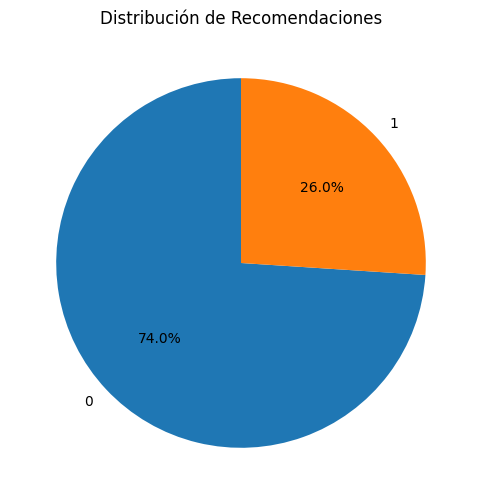

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df['recommended'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Recomendaciones')
plt.ylabel('')
plt.show()

 Se observa una desproporción en la distribución de la variable target, con un 74% de casos en la categoría '0' y solo un 26% en la categoría '1'. Esta desigualdad puede sesgar el aprendizaje del modelo, llevándolo a ser más efectivo en predecir la clase mayoritaria a expensas de la minoritaria, lo cual podría resultar en un rendimiento deficiente del modelo al enfrentarse a datos reales más equilibrados.

Para abordar este problema, se utilizara la tecnica de creacion de datos sinteticos. Al generar observaciones artificiales para la clase minoritaria, se puede equilibrar el dataset, mejorando la capacidad del modelo para aprender las características de ambas clases. Esto es crucial para aumentar la precisión y la generalización del modelo en situaciones diversas, contribuyendo a decisiones más equilibradas y justas, especialmente en aplicaciones críticas donde cada clase tiene una importancia significativa.

## Descarga de archivo

In [ ]:
df.to_csv('airline_reviews_clean.csv', index=False)